# Homework 1

In [709]:
import pandas as pd 
import requests
import seaborn
import json
import sqlite3
import datetime

## JSON

I will first read in a JSON Of Nobel prize winners

In [696]:
request_get = requests.get("http://api.nobelprize.org/v1/prize.json")
data_dict = json.loads(request_get.text)

In [697]:
data_dict.keys()

dict_keys(['prizes'])

Since the data has been read in, my next step is to turn the json into a dataset to determine if it was read in correctly and if there are any errors

In [698]:
Nobel = pd.DataFrame(data_dict['prizes'])

In [699]:
Nobel.head()

,category,laureates,overallMotivation,year
0,physics,"[{'id': '960', 'firstname': 'Arthur', 'surname...",“for groundbreaking inventions in the field of...,2018
1,chemistry,"[{'id': '963', 'firstname': 'Frances H.', 'sur...",NaN,2018
2,medicine,"[{'id': '958', 'firstname': 'James P.', 'surna...",NaN,2018
3,peace,"[{'id': '966', 'firstname': 'Denis', 'surname'...",NaN,2018
4,economics,"[{'id': '968', 'firstname': 'William D.', 'sur...",NaN,2018


Another way that I can read I can asses my data is by using .text to get the raw text and analyze it that way

In [700]:
request_get.text

'{"prizes":[{"year":"2018","category":"physics","overallMotivation":"\\u201cfor groundbreaking inventions in the field of laser physics\\u201d","laureates":[{"id":"960","firstname":"Arthur","surname":"Ashkin","motivation":"\\"for the optical tweezers and their application to biological systems\\"","share":"2"},{"id":"961","firstname":"G\\u00e9rard","surname":"Mourou","motivation":"\\"for their method of generating high-intensity, ultra-short optical pulses\\"","share":"4"},{"id":"962","firstname":"Donna","surname":"Strickland","motivation":"\\"for their method of generating high-intensity, ultra-short optical pulses\\"","share":"4"}]},{"year":"2018","category":"chemistry","laureates":[{"id":"963","firstname":"Frances H.","surname":"Arnold","motivation":"\\"for the directed evolution of enzymes\\"","share":"2"},{"id":"964","firstname":"George P.","surname":"Smith","motivation":"\\"for the phage display of peptides and antibodies\\"","share":"4"},{"id":"965","firstname":"Sir Gregory P.",

In [701]:
series = pd.Series(data_dict['prizes'])

In [702]:
series.head()

0    {'year': '2018', 'category': 'physics', 'overa...
1    {'year': '2018', 'category': 'chemistry', 'lau...
2    {'year': '2018', 'category': 'medicine', 'laur...
3    {'year': '2018', 'category': 'peace', 'laureat...
4    {'year': '2018', 'category': 'economics', 'lau...
dtype: object

Unfortunately I chose data that is mainly made up of text for my first json, however I can still do a number of things to analyze it. 

In [703]:
series.describe()

count                                                   590
unique                                                  590
top       {'year': '1954', 'category': 'medicine', 'laur...
freq                                                      1
dtype: object

This next section is an analysis of an CSV file of historic plane crashes 

In [704]:
names=['date','time','location','operator','flight_no','route','ac_type','registration','cn_ln','aboard','ground','summary']
plane_df = pd.read_csv("file:///Users/moirafacer/Downloads/planecrashinfo_20181121001952.csv",
                      header=0, names=None)

In [705]:
plane_df.head()

,date,time,location,operator,flight_no,route,ac_type,registration,cn_ln,aboard,fatalities,ground,summary
0,"September 17, 1908",17:18,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2 (passengers:1 crew:1),1 (passengers:1 crew:0),0,"During a demonstration flight, a U.S. Army fly..."
1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1 (passengers:0 crew:1),1 (passengers:0 crew:0),0,Eugene Lefebvre was the first pilot to ever be...
2,"July 12, 1912",06:30,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5 (passengers:0 crew:5),5 (passengers:0 crew:5),0,First U.S. dirigible Akron exploded just offsh...
3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1 (passengers:0 crew:1),1 (passengers:0 crew:1),0,The first fatal airplane accident in Canada oc...
4,"September 09, 1913",c 18:30,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20 (passengers:? crew:?),14 (passengers:? crew:?),0,The airship flew into a thunderstorm and encou...


## Describing the Data

The data I have gathered is missing data in a number of places. Things such as time of flight, flight no, registration and cn_ln are missing in a large section of the data. It is likely that this data is missing "at random", due to to the era in which many of the flights were recorded the data was likely lost or simply not recorded

In [706]:
plane_df.describe()

,date,time,location,operator,flight_no,route,ac_type,registration,cn_ln,aboard,fatalities,ground,summary
count,5783,5783,5783,5783,5783,5783,5783,5783,5783,5783,5783,5783,5783
unique,5213,1346,4715,2821,890,3875,2742,5394,4149,1042,917,54,5368
top,"August 28, 1976",?,"Moscow, Russia",Aeroflot,?,?,Douglas DC-3,?,?,2 (passengers:0 crew:2),1 (passengers:0 crew:1),0,?
freq,4,2108,18,260,4436,1494,341,352,1207,236,288,5474,231


I am first going to focus on the time of the flights,to see if there is a correlation between the time the flights occured and the number of fatalities.

In [707]:
plane_df['time'].value_counts()

?          2108
19:30        27
16:00        26
14:00        26
15:00        25
14:30        23
12:00        23
11:00        22
10:30        21
09:30        21
08:00        21
13:30        21
13:00        20
19:00        19
17:30        19
17:00        19
08:30        18
20:30        16
20:00        16
09:00        16
10:15        15
07:30        15
09:45        15
12:30        15
16:30        15
c 11:00      14
09:50        14
09:40        14
15:30        13
21:30        13
           ... 
17:12         1
c 12:20       1
17:36         1
05:54         1
00:52         1
c 03:50       1
c 02:35       1
03:40         1
17:47         1
04:05         1
13:19Z        1
06:39         1
12:53         1
22:23Z        1
1216          1
0610          1
0019          1
02:11         1
17:26         1
0020          1
02:09Z        1
0653          1
18:24         1
c 18:05       1
14:06         1
06:20         1
c 03:55       1
16:37         1
19:41         1
04:43         1
Name: time, Length: 1346

In [708]:
plane_df['aboard'].mean()

TypeError: Could not convert 2   (passengers:1  crew:1)1   (passengers:0  crew:1)5   (passengers:0  crew:5)1   (passengers:0  crew:1)20   (passengers:?  crew:?)30   (passengers:?  crew:?)41   (passengers:?  crew:?)19   (passengers:?  crew:?)20   (passengers:?  crew:?)22   (passengers:?  crew:?)19   (passengers:0  crew:19)28   (passengers:?  crew:?)20   (passengers:?  crew:?)20   (passengers:?  crew:?)23   (passengers:?  crew:?)21   (passengers:?  crew:?)24   (passengers:?  crew:?)16   (passengers:?  crew:?)18   (passengers:?  crew:?)18   (passengers:?  crew:?)23   (passengers:?  crew:?)22   (passengers:?  crew:?)19   (passengers:?  crew:?)1   (passengers:0  crew:1)1   (passengers:0  crew:1)1   (passengers:0  crew:1)14   (passengers:12  crew:2)1   (passengers:0  crew:1)1   (passengers:0  crew:1)0   (passengers:?  crew:?)1   (passengers:0  crew:1)1   (passengers:1  crew:1)1   (passengers:0  crew:1)1   (passengers:0  crew:1)2   (passengers:1  crew:1)2   (passengers:1  crew:1)2   (passengers:1  crew:1)1   (passengers:0  crew:1)1   (passengers:1  crew:1)1   (passengers:0  crew:1)1   (passengers:0  crew:1)2   (passengers:0  crew:2)2   (passengers:?  crew:?)1   (passengers:0  crew:1)2   (passengers:1  crew:1)2   (passengers:1  crew:1)1   (passengers:0  crew:1)1   (passengers:0  crew:1)8   (passengers:6  crew:2)1   (passengers:0  crew:1)1   (passengers:0  crew:1)3   (passengers:0  crew:3)2   (passengers:0  crew:2)1   (passengers:0  crew:1)2   (passengers:0  crew:0)1   (passengers:0  crew:1)1   (passengers:0  crew:1)1   (passengers:0  crew:1)2   (passengers:?  crew:?)46   (passengers:0  crew:46)5   (passengers:4  crew:1)2   (passengers:0  crew:2)5   (passengers:4  crew:1)45   (passengers:?  crew:?)6   (passengers:5  crew:1)7   (passengers:5  crew:2)17   (passengers:0  crew:17)3   (passengers:2  crew:1)3   (passengers:2  crew:1)5   (passengers:4  crew:1)3   (passengers:2  crew:1)1   (passengers:0  crew:1)4   (passengers:3  crew:1)2   (passengers:1  crew:1)1   (passengers:0  crew:1)4   (passengers:2  crew:2)1   (passengers:0  crew:1)1   (passengers:0  crew:1)1   (passengers:0  crew:1)6   (passengers:4  crew:2)2   (passengers:1  crew:1)1   (passengers:0  crew:1)5   (passengers:3  crew:2)5   (passengers:2  crew:3)1   (passengers:0  crew:1)52   (passengers:?  crew:?)1   (passengers:0  crew:1)1   (passengers:0  crew:1)3   (passengers:2  crew:1)5   (passengers:3  crew:2)1   (passengers:0  crew:1)1   (passengers:0  crew:1)1   (passengers:0  crew:1)8   (passengers:7  crew:1)5   (passengers:3  crew:2)3   (passengers:1  crew:2)4   (passengers:3  crew:1)2   (passengers:0  crew:2)1   (passengers:0  crew:1)1   (passengers:0  crew:1)43   (passengers:?  crew:?)?   (passengers:?  crew:?)1   (passengers:0  crew:1)1   (passengers:0  crew:1)2   (passengers:?  crew:?)1   (passengers:0  crew:1)1   (passengers:0  crew:1)1   (passengers:0  crew:1)6   (passengers:4  crew:2)2   (passengers:1  crew:1)5   (passengers:4  crew:1)4   (passengers:3  crew:1)5   (passengers:4  crew:1)7   (passengers:5  crew:2)4   (passengers:3  crew:1)12   (passengers:10  crew:2)3   (passengers:3  crew:0)1   (passengers:0  crew:1)0   (passengers:0  crew:2)1   (passengers:0  crew:1)3   (passengers:2  crew:1)1   (passengers:0  crew:1)2   (passengers:1  crew:1)1   (passengers:0  crew:1)3   (passengers:0  crew:3)5   (passengers:3  crew:2)11   (passengers:9  crew:2)1   (passengers:0  crew:1)12   (passengers:11  crew:1)3   (passengers:1  crew:2)6   (passengers:4  crew:2)2   (passengers:0  crew:2)4   (passengers:3  crew:1)1   (passengers:0  crew:1)6   (passengers:4  crew:2)1   (passengers:0  crew:1)1   (passengers:0  crew:1)5   (passengers:0  crew:5)3   (passengers:1  crew:2)2   (passengers:0  crew:2)1   (passengers:0  crew:1)2   (passengers:0  crew:2)1   (passengers:0  crew:1)2   (passengers:1  crew:1)2   (passengers:0  crew:2)2   (passengers:1  crew:1)9   (passengers:7  crew:2)5   (passengers:3  crew:2)2   (passengers:0  crew:2)5   (passengers:4  crew:1)5   (passengers:4  crew:1)1   (passengers:0  crew:1)6   (passengers:4  crew:2)6   (passengers:5  crew:1)6   (passengers:5  crew:1)7   (passengers:5  crew:2)5   (passengers:2  crew:3)2   (passengers:0  crew:2)7   (passengers:6  crew:1)3   (passengers:2  crew:1)3   (passengers:2  crew:1)1   (passengers:0  crew:1)2   (passengers:1  crew:1)3   (passengers:?  crew:3)3   (passengers:2  crew:1)1   (passengers:0  crew:1)1   (passengers:0  crew:1)5   (passengers:4  crew:1)14   (passengers:9  crew:5)5   (passengers:3  crew:2)4   (passengers:1  crew:3)1   (passengers:0  crew:1)4   (passengers:3  crew:1)3   (passengers:2  crew:1)1   (passengers:0  crew:1)1   (passengers:0  crew:1)9   (passengers:7  crew:2)1   (passengers:0  crew:1)2   (passengers:0  crew:2)15   (passengers:13  crew:2)4   (passengers:3  crew:1)6   (passengers:3  crew:3)5   (passengers:4  crew:1)2   (passengers:0  crew:2)6   (passengers:3  crew:3)5   (passengers:1  crew:4)2   (passengers:0  crew:2)13   (passengers:11  crew:2)8   (passengers:6  crew:2)5   (passengers:4  crew:1)1   (passengers:0  crew:1)4   (passengers:2  crew:2)5   (passengers:4  crew:1)1   (passengers:0  crew:1)2   (passengers:0  crew:2)8   (passengers:5  crew:3)5   (passengers:2  crew:3)6   (passengers:4  crew:2)6   (passengers:5  crew:1)1   (passengers:0  crew:1)2   (passengers:0  crew:2)5   (passengers:3  crew:2)7   (passengers:5  crew:2)1   (passengers:0  crew:1)2   (passengers:0  crew:2)4   (passengers:3  crew:1)8   (passengers:4  crew:4)3   (passengers:0  crew:3)12   (passengers:9  crew:3)1   (passengers:0  crew:1)1   (passengers:0  crew:1)3   (passengers:0  crew:2)5   (passengers:3  crew:2)1   (passengers:0  crew:1)3   (passengers:0  crew:3)16   (passengers:14  crew:2)2   (passengers:0  crew:2)5   (passengers:4  crew:1)1   (passengers:0  crew:1)6   (passengers:3  crew:3)4   (passengers:3  crew:1)4   (passengers:2  crew:2)15   (passengers:13  crew:2)8   (passengers:5  crew:3)5   (passengers:4  crew:1)6   (passengers:4  crew:2)11   (passengers:10  crew:1)2   (passengers:0  crew:2)3   (passengers:2  crew:1)54   (passengers:?  crew:?)8   (passengers:6  crew:2)4   (passengers:3  crew:1)3   (passengers:2  crew:1)3   (passengers:?  crew:?)6   (passengers:3  crew:3)1   (passengers:0  crew:1)9   (passengers:8  crew:1)3   (passengers:0  crew:3)6   (passengers:4  crew:2)2   (passengers:0  crew:2)1   (passengers:0  crew:1)3   (passengers:2  crew:1)3   (passengers:2  crew:1)3   (passengers:0  crew:3)8   (passengers:6  crew:2)8   (passengers:6  crew:2)10   (passengers:7  crew:3)2   (passengers:0  crew:2)1   (passengers:0  crew:1)1   (passengers:0  crew:1)4   (passengers:0  crew:4)3   (passengers:1  crew:2)4   (passengers:2  crew:2)2   (passengers:0  crew:2)2   (passengers:0  crew:2)1   (passengers:0  crew:1)7   (passengers:5  crew:2)6   (passengers:4  crew:2)1   (passengers:0  crew:1)6   (passengers:4  crew:2)4   (passengers:3  crew:1)3   (passengers:0  crew:3)3   (passengers:0  crew:3)5   (passengers:4  crew:1)3   (passengers:2  crew:1)1   (passengers:0  crew:1)3   (passengers:1  crew:2)1   (passengers:0  crew:1)6   (passengers:5  crew:1)7   (passengers:3  crew:4)2   (passengers:0  crew:2)5   (passengers:4  crew:1)1   (passengers:0  crew:1)8   (passengers:7  crew:1)5   (passengers:4  crew:1)1   (passengers:0  crew:1)2   (passengers:0  crew:2)3   (passengers:?  crew:?)5   (passengers:0  crew:5)7   (passengers:5  crew:2)1   (passengers:0  crew:1)3   (passengers:?  crew:?)1   (passengers:0  crew:1)1   (passengers:0  crew:1)2   (passengers:?  crew:?)3   (passengers:0  crew:3)9   (passengers:6  crew:3)7   (passengers:?  crew:?)2   (passengers:?  crew:?)4   (passengers:2  crew:2)2   (passengers:?  crew:?)3   (passengers:?  crew:?)1   (passengers:0  crew:1)2   (passengers:0  crew:2)2   (passengers:0  crew:2)5   (passengers:3  crew:2)2   (passengers:1  crew:1)1   (passengers:0  crew:1)2   (passengers:0  crew:2)2   (passengers:?  crew:?)1   (passengers:0  crew:1)2   (passengers:0  crew:2)1   (passengers:0  crew:1)1   (passengers:0  crew:1)3   (passengers:0  crew:3)2   (passengers:0  crew:2)3   (passengers:2  crew:1)15   (passengers:12  crew:3)2   (passengers:?  crew:?)76   (passengers:?  crew:?)8   (passengers:5  crew:3)4   (passengers:2  crew:2)6   (passengers:3  crew:3)1   (passengers:0  crew:1)9   (passengers:7  crew:2)6   (passengers:2  crew:4)5   (passengers:3  crew:2)8   (passengers:6  crew:2)10   (passengers:7  crew:3)2   (passengers:?  crew:?)9   (passengers:6  crew:3)1   (passengers:0  crew:1)8   (passengers:7  crew:1)20   (passengers:?  crew:?)2   (passengers:?  crew:?)10   (passengers:8  crew:2)6   (passengers:?  crew:?)10   (passengers:8  crew:2)14   (passengers:10  crew:4)2   (passengers:?  crew:?)8   (passengers:5  crew:3)6   (passengers:?  crew:?)4   (passengers:3  crew:1)6   (passengers:4  crew:2)15   (passengers:12  crew:3)3   (passengers:1  crew:2)6   (passengers:3  crew:3)2   (passengers:0  crew:2)7   (passengers:4  crew:3)10   (passengers:7  crew:3)7   (passengers:5  crew:2)1   (passengers:0  crew:1)4   (passengers:3  crew:1)12   (passengers:9  crew:3)2   (passengers:?  crew:?)?   (passengers:?  crew:?)5   (passengers:4  crew:1)7   (passengers:6  crew:1)3   (passengers:2  crew:1)11   (passengers:10  crew:1)4   (passengers:?  crew:?)2   (passengers:0  crew:2)4   (passengers:3  crew:1)3   (passengers:0  crew:3)1   (passengers:0  crew:1)8   (passengers:5  crew:3)7   (passengers:3  crew:4)1   (passengers:0  crew:1)2   (passengers:0  crew:2)1   (passengers:0  crew:1)11   (passengers:8  crew:3)?   (passengers:?  crew:?)6   (passengers:5  crew:1)5   (passengers:?  crew:?)3   (passengers:?  crew:?)7   (passengers:3  crew:4)1   (passengers:0  crew:1)14   (passengers:12  crew:2)12   (passengers:11  crew:1)50   (passengers:37  crew:13)1   (passengers:0  crew:1)2   (passengers:1  crew:1)9   (passengers:?  crew:?)20   (passengers:18  crew:2)20   (passengers:15  crew:5)2   (passengers:1  crew:1)13   (passengers:9  crew:4)?   (passengers:?  crew:?)4   (passengers:3  crew:1)3   (passengers:2  crew:1)2   (passengers:1  crew:1)3   (passengers:0  crew:3)8   (passengers:7  crew:1)5   (passengers:3  crew:2)12   (passengers:9  crew:3)6   (passengers:?  crew:?)6   (passengers:4  crew:2)4   (passengers:0  crew:4)4   (passengers:?  crew:?)1   (passengers:0  crew:1)14   (passengers:?  crew:?)3   (passengers:?  crew:?)2   (passengers:?  crew:?)11   (passengers:7  crew:4)3   (passengers:2  crew:1)13   (passengers:9  crew:4)17   (passengers:14  crew:3)13   (passengers:10  crew:3)6   (passengers:3  crew:3)6   (passengers:5  crew:1)6   (passengers:1  crew:5)4   (passengers:0  crew:4)6   (passengers:3  crew:3)14   (passengers:12  crew:2)2   (passengers:0  crew:2)15   (passengers:14  crew:1)25   (passengers:18  crew:7)7   (passengers:4  crew:3)5   (passengers:?  crew:?)2   (passengers:?  crew:?)2   (passengers:?  crew:?)2   (passengers:?  crew:?)15   (passengers:11  crew:4)6   (passengers:4  crew:2)7   (passengers:3  crew:4)7   (passengers:6  crew:1)3   (passengers:0  crew:3)1   (passengers:0  crew:1)8   (passengers:6  crew:2)2   (passengers:?  crew:?)2   (passengers:?  crew:?)11   (passengers:?  crew:?)11   (passengers:10  crew:1)2   (passengers:?  crew:?)10   (passengers:?  crew:?)3   (passengers:1  crew:2)4   (passengers:3  crew:1)1   (passengers:0  crew:1)1   (passengers:0  crew:1)15   (passengers:11  crew:4)16   (passengers:13  crew:3)4   (passengers:?  crew:?)6   (passengers:3  crew:3)14   (passengers:12  crew:2)5   (passengers:1  crew:4)17   (passengers:13  crew:4)7   (passengers:4  crew:3)2   (passengers:0  crew:2)14   (passengers:11  crew:3)6   (passengers:4  crew:2)?   (passengers:?  crew:?)12   (passengers:10  crew:2)9   (passengers:6  crew:3)13   (passengers:11  crew:2)12   (passengers:8  crew:4)11   (passengers:9  crew:2)7   (passengers:5  crew:2)4   (passengers:1  crew:3)6   (passengers:1  crew:5)13   (passengers:10  crew:3)6   (passengers:4  crew:2)97   (passengers:36  crew:61)4   (passengers:2  crew:2)9   (passengers:?  crew:?)2   (passengers:0  crew:2)15   (passengers:10  crew:5)9   (passengers:5  crew:4)14   (passengers:11  crew:3)11   (passengers:8  crew:3)9   (passengers:7  crew:2)3   (passengers:0  crew:3)2   (passengers:?  crew:?)14   (passengers:9  crew:5)11   (passengers:7  crew:4)19   (passengers:16  crew:3)6   (passengers:3  crew:3)12   (passengers:9  crew:3)11   (passengers:8  crew:3)3   (passengers:?  crew:?)19   (passengers:13  crew:6)7   (passengers:6  crew:1)3   (passengers:1  crew:2)6   (passengers:3  crew:3)10   (passengers:8  crew:2)7   (passengers:0  crew:7)1   (passengers:0  crew:1)14   (passengers:0  crew:14)19   (passengers:0  crew:19)12   (passengers:7  crew:5)2   (passengers:0  crew:0)14   (passengers:10  crew:4)3   (passengers:0  crew:0)9   (passengers:6  crew:3)7   (passengers:3  crew:4)1   (passengers:0  crew:1)8   (passengers:5  crew:3)19   (passengers:14  crew:5)6   (passengers:5  crew:1)2   (passengers:?  crew:?)9   (passengers:7  crew:2)17   (passengers:13  crew:4)10   (passengers:7  crew:3)1   (passengers:0  crew:1)3   (passengers:?  crew:?)3   (passengers:?  crew:?)4   (passengers:?  crew:?)10   (passengers:8  crew:2)20   (passengers:16  crew:4)14   (passengers:10  crew:4)1   (passengers:0  crew:1)4   (passengers:0  crew:4)15   (passengers:6  crew:9)12   (passengers:10  crew:2)6   (passengers:?  crew:?)11   (passengers:8  crew:3)17   (passengers:14  crew:3)9   (passengers:5  crew:4)7   (passengers:?  crew:?)15   (passengers:13  crew:2)5   (passengers:?  crew:?)17   (passengers:13  crew:4)9   (passengers:?  crew:?)5   (passengers:3  crew:2)13   (passengers:10  crew:3)4   (passengers:?  crew:?)20   (passengers:16  crew:4)18   (passengers:14  crew:4)2   (passengers:?  crew:?)14   (passengers:13  crew:1)19   (passengers:14  crew:5)2   (passengers:0  crew:2)15   (passengers:10  crew:5)6   (passengers:0  crew:6)7   (passengers:4  crew:3)8   (passengers:5  crew:3)15   (passengers:12  crew:3)12   (passengers:8  crew:4)4   (passengers:0  crew:4)13   (passengers:?  crew:?)9   (passengers:6  crew:3)4   (passengers:2  crew:2)9   (passengers:5  crew:4)4   (passengers:1  crew:3)13   (passengers:8  crew:5)6   (passengers:5  crew:1)10   (passengers:6  crew:4)3   (passengers:?  crew:?)8   (passengers:6  crew:2)10   (passengers:8  crew:2)12   (passengers:9  crew:3)9   (passengers:?  crew:?)6   (passengers:?  crew:?)9   (passengers:6  crew:3)1   (passengers:0  crew:1)4   (passengers:0  crew:4)3   (passengers:1  crew:2)6   (passengers:4  crew:2)7   (passengers:4  crew:3)16   (passengers:12  crew:4)6   (passengers:4  crew:2)2   (passengers:?  crew:?)7   (passengers:4  crew:3)20   (passengers:15  crew:5)2   (passengers:?  crew:?)10   (passengers:7  crew:3)11   (passengers:8  crew:3)7   (passengers:3  crew:4)9   (passengers:5  crew:4)10   (passengers:4  crew:6)11   (passengers:9  crew:2)8   (passengers:4  crew:4)5   (passengers:?  crew:5)3   (passengers:0  crew:3)5   (passengers:0  crew:5)9   (passengers:7  crew:2)1   (passengers:?  crew:?)?   (passengers:?  crew:?)13   (passengers:10  crew:3)10   (passengers:6  crew:4)15   (passengers:12  crew:3)25   (passengers:21  crew:4)14   (passengers:10  crew:4)15   (passengers:12  crew:3)17   (passengers:?  crew:?)10   (passengers:8  crew:2)18   (passengers:15  crew:3)29   (passengers:23  crew:6)6   (passengers:?  crew:?)16   (passengers:13  crew:3)16   (passengers:12  crew:4)10   (passengers:?  crew:?)16   (passengers:13  crew:3)6   (passengers:1  crew:5)13   (passengers:10  crew:3)12   (passengers:9  crew:3)16   (passengers:13  crew:3)12   (passengers:9  crew:3)10   (passengers:6  crew:4)6   (passengers:5  crew:1)15   (passengers:?  crew:?)18   (passengers:?  crew:?)22   (passengers:17  crew:5)22   (passengers:?  crew:?)12   (passengers:?  crew:?)16   (passengers:13  crew:3)10   (passengers:?  crew:?)15   (passengers:9  crew:6)13   (passengers:10  crew:3)15   (passengers:13  crew:2)20   (passengers:17  crew:3)3   (passengers:?  crew:?)22   (passengers:19  crew:3)11   (passengers:?  crew:?)5   (passengers:2  crew:3)18   (passengers:13  crew:5)?   (passengers:?  crew:?)9   (passengers:4  crew:5)9   (passengers:7  crew:2)20   (passengers:16  crew:4)12   (passengers:8  crew:4)33   (passengers:?  crew:?)17   (passengers:14  crew:3)12   (passengers:10  crew:2)17   (passengers:14  crew:3)14   (passengers:10  crew:4)20   (passengers:?  crew:?)21   (passengers:19  crew:2)10   (passengers:?  crew:?)13   (passengers:?  crew:?)?   (passengers:?  crew:?)4   (passengers:2  crew:2)13   (passengers:10  crew:3)14   (passengers:?  crew:?)14   (passengers:?  crew:?)18   (passengers:13  crew:5)25   (passengers:21  crew:4)15   (passengers:11  crew:4)22   (passengers:17  crew:5)?   (passengers:?  crew:?)37   (passengers:26  crew:11)17   (passengers:14  crew:3)13   (passengers:10  crew:3)10   (passengers:?  crew:?)20   (passengers:16  crew:4)36   (passengers:30  crew:6)19   (passengers:15  crew:4)18   (passengers:16  crew:2)13   (passengers:10  crew:3)15   (passengers:11  crew:4)35   (passengers:26  crew:9)26   (passengers:20  crew:6)19   (passengers:10  crew:9)15   (passengers:11  crew:4)21   (passengers:?  crew:?)10   (passengers:0  crew:10)39   (passengers:33  crew:6)3   (passengers:0  crew:3)3   (passengers:0  crew:3)24   (passengers:20  crew:4)7   (passengers:4  crew:3)31   (passengers:27  crew:4)17   (passengers:13  crew:4)20   (passengers:16  crew:4)41   (passengers:?  crew:?)17   (passengers:?  crew:?)16   (passengers:?  crew:?)13   (passengers:?  crew:?)25   (passengers:18  crew:7)22   (passengers:18  crew:4)10   (passengers:0  crew:10)27   (passengers:23  crew:4)3   (passengers:0  crew:3)21   (passengers:18  crew:3)7   (passengers:3  crew:4)22   (passengers:0  crew:22)25   (passengers:21  crew:4)20   (passengers:15  crew:5)15   (passengers:11  crew:4)24   (passengers:?  crew:?)20   (passengers:15  crew:5)15   (passengers:?  crew:?)19   (passengers:?  crew:?)1   (passengers:?  crew:?)3   (passengers:0  crew:3)3   (passengers:0  crew:3)15   (passengers:11  crew:4)10   (passengers:7  crew:3)3   (passengers:0  crew:3)31   (passengers:27  crew:4)25   (passengers:0  crew:25)5   (passengers:3  crew:2)24   (passengers:21  crew:3)14   (passengers:10  crew:4)2   (passengers:0  crew:2)16   (passengers:13  crew:3)21   (passengers:?  crew:?)6   (passengers:3  crew:3)7   (passengers:4  crew:3)20   (passengers:17  crew:3)16   (passengers:11  crew:5)12   (passengers:9  crew:3)14   (passengers:?  crew:?)22   (passengers:18  crew:4)22   (passengers:18  crew:4)22   (passengers:17  crew:5)6   (passengers:0  crew:6)4   (passengers:1  crew:3)10   (passengers:8  crew:2)2   (passengers:0  crew:2)17   (passengers:?  crew:?)26   (passengers:20  crew:6)22   (passengers:17  crew:5)24   (passengers:17  crew:7)28   (passengers:24  crew:4)31   (passengers:26  crew:5)2   (passengers:?  crew:?)3   (passengers:0  crew:3)20   (passengers:14  crew:6)15   (passengers:12  crew:3)18   (passengers:14  crew:4)5   (passengers:2  crew:3)20   (passengers:16  crew:4)13   (passengers:0  crew:13)19   (passengers:16  crew:3)17   (passengers:13  crew:4)9   (passengers:5  crew:4)3   (passengers:0  crew:3)7   (passengers:4  crew:3)30   (passengers:?  crew:?)15   (passengers:12  crew:3)9   (passengers:6  crew:3)24   (passengers:?  crew:?)24   (passengers:21  crew:3)13   (passengers:?  crew:?)?   (passengers:?  crew:?)20   (passengers:17  crew:3)30   (passengers:25  crew:5)11   (passengers:7  crew:4)10   (passengers:6  crew:4)16   (passengers:14  crew:2)3   (passengers:0  crew:3)17   (passengers:14  crew:3)5   (passengers:?  crew:?)3   (passengers:2  crew:1)4   (passengers:0  crew:4)30   (passengers:?  crew:?)24   (passengers:21  crew:3)6   (passengers:0  crew:6)3   (passengers:0  crew:3)11   (passengers:?  crew:?)10   (passengers:8  crew:2)26   (passengers:22  crew:4)23   (passengers:19  crew:4)24   (passengers:21  crew:3)11   (passengers:7  crew:4)30   (passengers:?  crew:?)28   (passengers:?  crew:?)22   (passengers:19  crew:3)24   (passengers:20  crew:4)3   (passengers:0  crew:3)20   (passengers:17  crew:3)13   (passengers:11  crew:2)25   (passengers:20  crew:5)20   (passengers:17  crew:3)21   (passengers:16  crew:5)31   (passengers:26  crew:5)13   (passengers:11  crew:2)21   (passengers:15  crew:6)30   (passengers:25  crew:5)31   (passengers:25  crew:6)23   (passengers:?  crew:?)21   (passengers:18  crew:3)3   (passengers:0  crew:3)11   (passengers:9  crew:2)27   (passengers:?  crew:?)2   (passengers:?  crew:?)12   (passengers:?  crew:?)15   (passengers:?  crew:?)28   (passengers:24  crew:4)10   (passengers:4  crew:6)3   (passengers:1  crew:2)12   (passengers:9  crew:3)14   (passengers:10  crew:4)16   (passengers:12  crew:4)22   (passengers:19  crew:3)11   (passengers:7  crew:4)24   (passengers:21  crew:3)29   (passengers:26  crew:3)20   (passengers:?  crew:?)23   (passengers:18  crew:5)15   (passengers:12  crew:3)26   (passengers:20  crew:6)31   (passengers:25  crew:6)59   (passengers:55  crew:4)31   (passengers:28  crew:3)25   (passengers:21  crew:4)14   (passengers:?  crew:?)5   (passengers:?  crew:?)50   (passengers:46  crew:4)30   (passengers:26  crew:4)44   (passengers:40  crew:4)3   (passengers:0  crew:3)27   (passengers:?  crew:?)24   (passengers:20  crew:4)44   (passengers:?  crew:?)29   (passengers:22  crew:7)20   (passengers:16  crew:4)17   (passengers:14  crew:3)28   (passengers:25  crew:3)27   (passengers:22  crew:5)28   (passengers:23  crew:5)14   (passengers:0  crew:14)21   (passengers:19  crew:2)17   (passengers:13  crew:4)8   (passengers:?  crew:?)10   (passengers:6  crew:4)12   (passengers:9  crew:3)11   (passengers:7  crew:4)18   (passengers:?  crew:?)22   (passengers:17  crew:5)25   (passengers:21  crew:4)17   (passengers:14  crew:3)7   (passengers:0  crew:7)11   (passengers:?  crew:?)21   (passengers:18  crew:3)20   (passengers:16  crew:4)14   (passengers:?  crew:?)27   (passengers:24  crew:3)15   (passengers:11  crew:4)25   (passengers:21  crew:4)20   (passengers:?  crew:?)?   (passengers:?  crew:?)26   (passengers:23  crew:3)10   (passengers:5  crew:5)6   (passengers:4  crew:2)4   (passengers:0  crew:4)14   (passengers:11  crew:3)21   (passengers:18  crew:3)12   (passengers:?  crew:?)28   (passengers:?  crew:?)27   (passengers:25  crew:2)14   (passengers:11  crew:3)38   (passengers:30  crew:8)23   (passengers:17  crew:6)18   (passengers:12  crew:6)18   (passengers:?  crew:?)3   (passengers:0  crew:3)25   (passengers:21  crew:4)6   (passengers:0  crew:6)49   (passengers:47  crew:2)30   (passengers:27  crew:3)13   (passengers:10  crew:3)20   (passengers:?  crew:?)22   (passengers:18  crew:4)9   (passengers:?  crew:?)16   (passengers:11  crew:5)6   (passengers:4  crew:2)5   (passengers:0  crew:5)9   (passengers:0  crew:9)25   (passengers:22  crew:3)9   (passengers:?  crew:?)7   (passengers:3  crew:4)22   (passengers:17  crew:5)26   (passengers:21  crew:5)22   (passengers:19  crew:3)24   (passengers:20  crew:4)4   (passengers:2  crew:2)21   (passengers:?  crew:?)7   (passengers:4  crew:3)44   (passengers:37  crew:7)25   (passengers:19  crew:6)28   (passengers:25  crew:3)19   (passengers:14  crew:5)7   (passengers:5  crew:2)25   (passengers:22  crew:3)39   (passengers:31  crew:8)21   (passengers:15  crew:6)1   (passengers:0  crew:1)41   (passengers:37  crew:4)16   (passengers:11  crew:5)13   (passengers:10  crew:3)11   (passengers:?  crew:?)24   (passengers:22  crew:2)27   (passengers:24  crew:3)26   (passengers:?  crew:?)20   (passengers:17  crew:3)11   (passengers:8  crew:3)15   (passengers:12  crew:3)26   (passengers:21  crew:5)23   (passengers:15  crew:8)22   (passengers:20  crew:2)18   (passengers:15  crew:3)24   (passengers:?  crew:?)24   (passengers:19  crew:5)32   (passengers:29  crew:3)14   (passengers:10  crew:4)7   (passengers:5  crew:2)21   (passengers:15  crew:6)12   (passengers:9  crew:3)34   (passengers:31  crew:3)30   (passengers:27  crew:3)11   (passengers:7  crew:4)2   (passengers:0  crew:2)23   (passengers:14  crew:9)21   (passengers:18  crew:3)14   (passengers:?  crew:?)38   (passengers:33  crew:5)23   (passengers:20  crew:3)16   (passengers:11  crew:5)42   (passengers:37  crew:5)19   (passengers:16  crew:3)21   (passengers:17  crew:4)17   (passengers:13  crew:4)23   (passengers:18  crew:5)19   (passengers:16  crew:3)4   (passengers:0  crew:4)22   (passengers:18  crew:4)26   (passengers:24  crew:2)16   (passengers:11  crew:5)3   (passengers:0  crew:3)12   (passengers:7  crew:5)2   (passengers:0  crew:2)53   (passengers:49  crew:4)16   (passengers:10  crew:6)21   (passengers:?  crew:?)12   (passengers:?  crew:?)23   (passengers:19  crew:4)13   (passengers:?  crew:?)9   (passengers:5  crew:4)23   (passengers:18  crew:5)8   (passengers:5  crew:3)15   (passengers:9  crew:6)27   (passengers:24  crew:3)15   (passengers:9  crew:6)10   (passengers:8  crew:2)15   (passengers:12  crew:3)11   (passengers:9  crew:2)4   (passengers:0  crew:4)22   (passengers:17  crew:5)48   (passengers:44  crew:4)40   (passengers:33  crew:7)25   (passengers:21  crew:4)53   (passengers:49  crew:4)2   (passengers:0  crew:2)18   (passengers:13  crew:5)50   (passengers:47  crew:3)36   (passengers:27  crew:9)29   (passengers:25  crew:4)13   (passengers:10  crew:3)36   (passengers:33  crew:3)19   (passengers:?  crew:?)6   (passengers:0  crew:6)6   (passengers:0  crew:6)26   (passengers:?  crew:?)11   (passengers:6  crew:5)20   (passengers:?  crew:?)5   (passengers:3  crew:2)5   (passengers:0  crew:5)3   (passengers:?  crew:?)3   (passengers:1  crew:2)26   (passengers:18  crew:8)35   (passengers:27  crew:8)54   (passengers:49  crew:5)69   (passengers:62  crew:7)43   (passengers:39  crew:4)3   (passengers:1  crew:2)53   (passengers:48  crew:5)44   (passengers:36  crew:8)18   (passengers:13  crew:5)25   (passengers:?  crew:?)5   (passengers:3  crew:2)25   (passengers:21  crew:4)2   (passengers:0  crew:2)5   (passengers:0  crew:5)25   (passengers:21  crew:4)26   (passengers:21  crew:5)3   (passengers:0  crew:3)22   (passengers:19  crew:3)13   (passengers:11  crew:2)20   (passengers:?  crew:?)28   (passengers:25  crew:3)29   (passengers:25  crew:4)20   (passengers:16  crew:4)25   (passengers:20  crew:5)30   (passengers:?  crew:?)23   (passengers:19  crew:4)9   (passengers:?  crew:?)18   (passengers:14  crew:4)16   (passengers:11  crew:5)27   (passengers:25  crew:2)9   (passengers:7  crew:2)32   (passengers:29  crew:3)9   (passengers:6  crew:3)54   (passengers:51  crew:3)32   (passengers:29  crew:3)31   (passengers:25  crew:6)69   (passengers:63  crew:6)19   (passengers:15  crew:4)21   (passengers:17  crew:4)10   (passengers:7  crew:3)14   (passengers:7  crew:7)12   (passengers:9  crew:3)2   (passengers:0  crew:2)26   (passengers:20  crew:6)4   (passengers:0  crew:4)22   (passengers:19  crew:3)5   (passengers:?  crew:?)13   (passengers:9  crew:4)30   (passengers:24  crew:6)6   (passengers:3  crew:3)14   (passengers:10  crew:4)19   (passengers:15  crew:4)15   (passengers:10  crew:5)31   (passengers:21  crew:10)37   (passengers:33  crew:4)29   (passengers:25  crew:4)10   (passengers:?  crew:?)32   (passengers:25  crew:7)13   (passengers:8  crew:5)2   (passengers:0  crew:2)4   (passengers:0  crew:4)9   (passengers:5  crew:4)4   (passengers:?  crew:?)8   (passengers:7  crew:1)43   (passengers:39  crew:4)26   (passengers:23  crew:3)17   (passengers:14  crew:3)12   (passengers:7  crew:5)39   (passengers:26  crew:13)16   (passengers:13  crew:3)5   (passengers:2  crew:3)26   (passengers:23  crew:3)26   (passengers:23  crew:3)19   (passengers:16  crew:3)24   (passengers:18  crew:6)52   (passengers:40  crew:12)4   (passengers:0  crew:4)2   (passengers:0  crew:2)3   (passengers:0  crew:3)37   (passengers:33  crew:4)13   (passengers:10  crew:3)13   (passengers:10  crew:3)45   (passengers:?  crew:?)10   (passengers:4  crew:6)40   (passengers:30  crew:10)13   (passengers:?  crew:?)18   (passengers:14  crew:4)5   (passengers:0  crew:5)13   (passengers:?  crew:?)17   (passengers:15  crew:2)23   (passengers:19  crew:4)8   (passengers:6  crew:2)26   (passengers:21  crew:5)21   (passengers:16  crew:5)40   (passengers:37  crew:3)7   (passengers:6  crew:1)10   (passengers:8  crew:2)30   (passengers:27  crew:3)24   (passengers:19  crew:5)33   (passengers:29  crew:4)27   (passengers:24  crew:3)32   (passengers:29  crew:3)13   (passengers:8  crew:5)30   (passengers:27  crew:3)17   (passengers:11  crew:6)2   (passengers:0  crew:2)12   (passengers:8  crew:4)30   (passengers:?  crew:?)13   (passengers:4  crew:9)20   (passengers:13  crew:7)20   (passengers:16  crew:4)6   (passengers:3  crew:3)35   (passengers:23  crew:12)10   (passengers:?  crew:?)53   (passengers:44  crew:9)14   (passengers:10  crew:4)27   (passengers:23  crew:4)16   (passengers:13  crew:3)14   (passengers:6  crew:8)26   (passengers:22  crew:4)23   (passengers:19  crew:4)22   (passengers:19  crew:3)3   (passengers:0  crew:3)15   (passengers:13  crew:2)24   (passengers:18  crew:6)31   (passengers:27  crew:4)7   (passengers:0  crew:7)13   (passengers:10  crew:3)25   (passengers:20  crew:5)22   (passengers:18  crew:4)27   (passengers:21  crew:6)81   (passengers:75  crew:6)33   (passengers:23  crew:10)18   (passengers:14  crew:4)48   (passengers:44  crew:4)45   (passengers:34  crew:11)0   (passengers:1  crew:1)32   (passengers:28  crew:4)14   (passengers:8  crew:6)16   (passengers:12  crew:4)36   (passengers:30  crew:6)30   (passengers:?  crew:?)34   (passengers:31  crew:3)12   (passengers:?  crew:?)32   (passengers:29  crew:3)58   (passengers:49  crew:9)32   (passengers:29  crew:3)21   (passengers:14  crew:7)20   (passengers:17  crew:3)23   (passengers:19  crew:4)24   (passengers:21  crew:3)27   (passengers:20  crew:7)4   (passengers:2  crew:2)48   (passengers:37  crew:11)55   (passengers:51  crew:4)3   (passengers:0  crew:3)2   (passengers:0  crew:2)35   (passengers:31  crew:4)12   (passengers:9  crew:3)46   (passengers:41  crew:5)38   (passengers:33  crew:5)22   (passengers:18  crew:4)9   (passengers:6  crew:3)38   (passengers:36  crew:2)40   (passengers:?  crew:?)23   (passengers:20  crew:3)26   (passengers:22  crew:4)17   (passengers:13  crew:4)8   (passengers:4  crew:4)7   (passengers:6  crew:1)19   (passengers:?  crew:?)16   (passengers:?  crew:?)32   (passengers:28  crew:4)14   (passengers:11  crew:3)4   (passengers:1  crew:3)44   (passengers:36  crew:8)7   (passengers:0  crew:7)5   (passengers:3  crew:2)13   (passengers:10  crew:3)4   (passengers:1  crew:3)83   (passengers:78  crew:5)15   (passengers:11  crew:4)12   (passengers:0  crew:12)3   (passengers:0  crew:3)32   (passengers:28  crew:4)25   (passengers:23  crew:2)35   (passengers:27  crew:8)15   (passengers:12  crew:3)16   (passengers:5  crew:11)39   (passengers:35  crew:4)26   (passengers:23  crew:3)2   (passengers:0  crew:2)15   (passengers:11  crew:4)65   (passengers:62  crew:3)15   (passengers:12  crew:3)52   (passengers:44  crew:8)53   (passengers:45  crew:8)58   (passengers:55  crew:3)29   (passengers:24  crew:5)23   (passengers:?  crew:?)29   (passengers:25  crew:4)22   (passengers:18  crew:4)9   (passengers:6  crew:3)26   (passengers:23  crew:3)50   (passengers:43  crew:7)26   (passengers:22  crew:4)?   (passengers:?  crew:?)25   (passengers:19  crew:6)20   (passengers:?  crew:?)59   (passengers:54  crew:5)12   (passengers:?  crew:12)55   (passengers:48  crew:7)23   (passengers:20  crew:3)8   (passengers:5  crew:3)26   (passengers:19  crew:7)11   (passengers:7  crew:4)10   (passengers:9  crew:1)51   (passengers:43  crew:8)6   (passengers:3  crew:3)7   (passengers:4  crew:3)29   (passengers:24  crew:5)30   (passengers:26  crew:4)48   (passengers:40  crew:8)21   (passengers:17  crew:4)52   (passengers:45  crew:7)23   (passengers:20  crew:3)21   (passengers:18  crew:3)9   (passengers:5  crew:4)3   (passengers:0  crew:3)8   (passengers:7  crew:1)7   (passengers:4  crew:3)56   (passengers:50  crew:6)21   (passengers:17  crew:4)9   (passengers:?  crew:?)1   (passengers:0  crew:1)31   (passengers:28  crew:3)38   (passengers:31  crew:7)18   (passengers:15  crew:3)18   (passengers:13  crew:5)12   (passengers:10  crew:2)10   (passengers:7  crew:3)28   (passengers:25  crew:3)10   (passengers:7  crew:3)?   (passengers:?  crew:?)17   (passengers:12  crew:5)16   (passengers:11  crew:5)20   (passengers:17  crew:3)14   (passengers:?  crew:?)29   (passengers:23  crew:6)2   (passengers:0  crew:2)25   (passengers:21  crew:4)24   (passengers:20  crew:4)27   (passengers:24  crew:3)14   (passengers:10  crew:4)53   (passengers:48  crew:5)20   (passengers:16  crew:4)3   (passengers:0  crew:3)26   (passengers:24  crew:2)22   (passengers:19  crew:3)21   (passengers:18  crew:3)16   (passengers:11  crew:5)43   (passengers:34  crew:9)11   (passengers:8  crew:3)25   (passengers:0  crew:25)32   (passengers:27  crew:5)6   (passengers:3  crew:3)10   (passengers:0  crew:10)19   (passengers:16  crew:3)3   (passengers:0  crew:3)40   (passengers:31  crew:9)14   (passengers:11  crew:3)50   (passengers:45  crew:5)10   (passengers:0  crew:10)3   (passengers:0  crew:3)33   (passengers:28  crew:5)7   (passengers:5  crew:2)3   (passengers:0  crew:3)37   (passengers:31  crew:6)3   (passengers:0  crew:3)7   (passengers:4  crew:3)2   (passengers:0  crew:2)5   (passengers:0  crew:5)10   (passengers:?  crew:?)50   (passengers:44  crew:6)13   (passengers:9  crew:4)39   (passengers:36  crew:3)3   (passengers:0  crew:3)28   (passengers:24  crew:4)14   (passengers:?  crew:?)27   (passengers:?  crew:?)8   (passengers:5  crew:3)17   (passengers:13  crew:4)12   (passengers:?  crew:?)23   (passengers:20  crew:3)12   (passengers:9  crew:3)29   (passengers:25  crew:4)29   (passengers:26  crew:3)36   (passengers:?  crew:?)18   (passengers:14  crew:4)23   (passengers:19  crew:4)5   (passengers:4  crew:1)17   (passengers:13  crew:4)7   (passengers:0  crew:7)21   (passengers:?  crew:?)3   (passengers:0  crew:3)3   (passengers:?  crew:?)56   (passengers:52  crew:4)22   (passengers:17  crew:5)20   (passengers:14  crew:6)40   (passengers:36  crew:4)28   (passengers:24  crew:4)4   (passengers:2  crew:2)3   (passengers:0  crew:3)11   (passengers:8  crew:3)23   (passengers:20  crew:3)43   (passengers:40  crew:3)23   (passengers:20  crew:3)15   (passengers:11  crew:4)13   (passengers:?  crew:13)63   (passengers:59  crew:4)31   (passengers:26  crew:5)16   (passengers:12  crew:4)9   (passengers:5  crew:4)8   (passengers:6  crew:2)38   (passengers:34  crew:4)3   (passengers:0  crew:3)15   (passengers:0  crew:15)4   (passengers:3  crew:1)47   (passengers:37  crew:10)21   (passengers:18  crew:3)70   (passengers:?  crew:?)12   (passengers:9  crew:3)29   (passengers:26  crew:3)2   (passengers:0  crew:2)37   (passengers:33  crew:4)4   (passengers:0  crew:4)69   (passengers:64  crew:5)29   (passengers:26  crew:3)50   (passengers:41  crew:9)9   (passengers:5  crew:4)29   (passengers:26  crew:3)17   (passengers:?  crew:?)22   (passengers:19  crew:3)6   (passengers:0  crew:6)18   (passengers:10  crew:8)8   (passengers:5  crew:3)8   (passengers:7  crew:1)11   (passengers:?  crew:?)13   (passengers:11  crew:2)46   (passengers:40  crew:6)27   (passengers:19  crew:8)24   (passengers:20  crew:4)57   (passengers:51  crew:6)18   (passengers:?  crew:?)4   (passengers:0  crew:4)1   (passengers:0  crew:1)46   (passengers:?  crew:?)3   (passengers:0  crew:3)21   (passengers:19  crew:5)14   (passengers:2  crew:12)28   (passengers:?  crew:?)25   (passengers:21  crew:4)16   (passengers:?  crew:?)6   (passengers:1  crew:5)19   (passengers:14  crew:5)44   (passengers:37  crew:7)20   (passengers:15  crew:5)16   (passengers:?  crew:?)52   (passengers:41  crew:11)38   (passengers:31  crew:7)18   (passengers:?  crew:?)41   (passengers:33  crew:8)115   (passengers:105  crew:10)3   (passengers:0  crew:3)?   (passengers:?  crew:?)5   (passengers:?  crew:?)29   (passengers:25  crew:4)10   (passengers:7  crew:3)35   (passengers:31  crew:4)7   (passengers:3  crew:4)40   (passengers:37  crew:3)26   (passengers:16  crew:10)19   (passengers:15  crew:4)39   (passengers:33  crew:6)18   (passengers:?  crew:?)21   (passengers:14  crew:7)35   (passengers:?  crew:?)46   (passengers:41  crew:5)11   (passengers:6  crew:5)2   (passengers:0  crew:2)16   (passengers:11  crew:5)8   (passengers:?  crew:?)23   (passengers:?  crew:?)35   (passengers:30  crew:5)14   (passengers:?  crew:?)13   (passengers:8  crew:5)?   (passengers:?  crew:?)13   (passengers:10  crew:3)5   (passengers:1  crew:4)25   (passengers:22  crew:3)3   (passengers:0  crew:3)30   (passengers:27  crew:3)10   (passengers:5  crew:5)43   (passengers:37  crew:6)10   (passengers:0  crew:10)18   (passengers:13  crew:5)19   (passengers:16  crew:3)20   (passengers:17  crew:3)7   (passengers:?  crew:?)34   (passengers:28  crew:6)20   (passengers:16  crew:11)18   (passengers:12  crew:6)7   (passengers:5  crew:2)17   (passengers:14  crew:3)34   (passengers:31  crew:3)17   (passengers:10  crew:7)129   (passengers:122  crew:7)58   (passengers:50  crew:8)46   (passengers:40  crew:6)21   (passengers:15  crew:6)42   (passengers:34  crew:8)25   (passengers:21  crew:4)23   (passengers:?  crew:?)2   (passengers:0  crew:2)42   (passengers:33  crew:9)21   (passengers:19  crew:2)3   (passengers:0  crew:3)2   (passengers:0  crew:2)28   (passengers:25  crew:3)21   (passengers:16  crew:5)41   (passengers:38  crew:3)44   (passengers:40  crew:4)7   (passengers:0  crew:7)27   (passengers:22  crew:5)21   (passengers:18  crew:3)32   (passengers:27  crew:5)19   (passengers:11  crew:8)16   (passengers:11  crew:5)28   (passengers:25  crew:3)10   (passengers:0  crew:10)33   (passengers:28  crew:5)14   (passengers:10  crew:4)6   (passengers:?  crew:?)2   (passengers:0  crew:2)16   (passengers:6  crew:10)44   (passengers:41  crew:3)15   (passengers:?  crew:?)21   (passengers:?  crew:?)10   (passengers:5  crew:5)17   (passengers:13  crew:4)35   (passengers:29  crew:6)21   (passengers:18  crew:3)1   (passengers:0  crew:1)16   (passengers:9  crew:7)15   (passengers:11  crew:4)3   (passengers:0  crew:3)35   (passengers:30  crew:5)16   (passengers:0  crew:16)10   (passengers:0  crew:10)3   (passengers:0  crew:3)9   (passengers:6  crew:3)20   (passengers:18  crew:2)40   (passengers:31  crew:9)?   (passengers:?  crew:?)2   (passengers:0  crew:2)18   (passengers:12  crew:6)18   (passengers:15  crew:3)25   (passengers:20  crew:5)4   (passengers:0  crew:4)21   (passengers:14  crew:7)36   (passengers:31  crew:5)14   (passengers:9  crew:5)23   (passengers:20  crew:3)25   (passengers:21  crew:4)11   (passengers:8  crew:3)28   (passengers:26  crew:2)19   (passengers:16  crew:3)4   (passengers:0  crew:4)3   (passengers:0  crew:3)4   (passengers:2  crew:2)9   (passengers:5  crew:4)24   (passengers:20  crew:4)18   (passengers:12  crew:6)2   (passengers:0  crew:2)30   (passengers:21  crew:9)3   (passengers:0  crew:3)55   (passengers:51  crew:4)19   (passengers:16  crew:3)21   (passengers:12  crew:9)27   (passengers:22  crew:5)27   (passengers:?  crew:?)56   (passengers:46  crew:10)26   (passengers:22  crew:4)4   (passengers:0  crew:4)29   (passengers:24  crew:5)21   (passengers:18  crew:3)16   (passengers:13  crew:3)42   (passengers:?  crew:?)8   (passengers:0  crew:8)24   (passengers:21  crew:3)7   (passengers:3  crew:4)28   (passengers:25  crew:3)4   (passengers:?  crew:?)2   (passengers:0  crew:2)32   (passengers:22  crew:10)28   (passengers:23  crew:5)36   (passengers:25  crew:11)45   (passengers:?  crew:?)17   (passengers:?  crew:?)12   (passengers:?  crew:?)18   (passengers:?  crew:?)15   (passengers:10  crew:5)5   (passengers:3  crew:2)39   (passengers:36  crew:3)5   (passengers:4  crew:1)10   (passengers:6  crew:4)13   (passengers:9  crew:4)29   (passengers:21  crew:8)16   (passengers:13  crew:3)26   (passengers:21  crew:5)?   (passengers:?  crew:?)21   (passengers:18  crew:3)?   (passengers:?  crew:?)26   (passengers:23  crew:3)8   (passengers:5  crew:3)35   (passengers:32  crew:3)66   (passengers:57  crew:9)23   (passengers:15  crew:8)2   (passengers:0  crew:2)3   (passengers:0  crew:3)19   (passengers:11  crew:8)14   (passengers:10  crew:4)20   (passengers:16  crew:4)16   (passengers:13  crew:3)2   (passengers:0  crew:2)3   (passengers:0  crew:3)24   (passengers:14  crew:10)39   (passengers:38  crew:1)22   (passengers:19  crew:3)43   (passengers:40  crew:3)58   (passengers:51  crew:7)30   (passengers:27  crew:3)25   (passengers:20  crew:5)66   (passengers:?  crew:?)13   (passengers:9  crew:4)3   (passengers:0  crew:3)9   (passengers:6  crew:3)33   (passengers:30  crew:3)16   (passengers:8  crew:8)6   (passengers:4  crew:2)47   (passengers:40  crew:7)5   (passengers:0  crew:5)2   (passengers:0  crew:2)35   (passengers:31  crew:4)66   (passengers:63  crew:3)29   (passengers:25  crew:4)44   (passengers:39  crew:5)74   (passengers:70  crew:4)14   (passengers:10  crew:4)11   (passengers:2  crew:9)10   (passengers:0  crew:10)6   (passengers:4  crew:2)21   (passengers:16  crew:5)2   (passengers:0  crew:2)26   (passengers:?  crew:?)17   (passengers:12  crew:5)2   (passengers:0  crew:2)18   (passengers:15  crew:3)26   (passengers:23  crew:3)3   (passengers:0  crew:3)2   (passengers:0  crew:2)3   (passengers:0  crew:3)40   (passengers:35  crew:5)50   (passengers:45  crew:5)64   (passengers:55  crew:9)19   (passengers:16  crew:3)3   (passengers:0  crew:3)21   (passengers:18  crew:3)3   (passengers:0  crew:3)19   (passengers:?  crew:?)3   (passengers:0  crew:3)36   (passengers:33  crew:3)38   (passengers:32  crew:6)6   (passengers:5  crew:1)12   (passengers:7  crew:5)54   (passengers:49  crew:5)2   (passengers:0  crew:2)31   (passengers:28  crew:3)31   (passengers:28  crew:3)?   (passengers:?  crew:?)74   (passengers:64  crew:10)45   (passengers:38  crew:7)128   (passengers:117  crew:11)35   (passengers:31  crew:4)66   (passengers:56  crew:10)4   (passengers:0  crew:4)18   (passengers:14  crew:4)22   (passengers:18  crew:4)22   (passengers:14  crew:8)57   (passengers:53  crew:4)18   (passengers:14  crew:4)5   (passengers:4  crew:1)59   (passengers:50  crew:9)31   (passengers:24  crew:7)3   (passengers:0  crew:3)23   (passengers:?  crew:?)80   (passengers:74  crew:6)12   (passengers:10  crew:2)25   (passengers:20  crew:5)36   (passengers:33  crew:3)23   (passengers:18  crew:5)35   (passengers:25  crew:10)25   (passengers:18  crew:7)16   (passengers:11  crew:5)62   (passengers:59  crew:3)5   (passengers:0  crew:5)30   (passengers:27  crew:3)21   (passengers:17  crew:4)41   (passengers:29  crew:12)10   (passengers:7  crew:3)33   (passengers:29  crew:4)16   (passengers:13  crew:3)70   (passengers:60  crew:10)6   (passengers:0  crew:6)101   (passengers:95  crew:6)159   (passengers:149  crew:10)5   (passengers:2  crew:3)17   (passengers:?  crew:?)22   (passengers:17  crew:5)15   (passengers:12  crew:3)20   (passengers:15  crew:5)25   (passengers:22  crew:3)19   (passengers:16  crew:3)67   (passengers:57  crew:10)40   (passengers:35  crew:5)34   (passengers:30  crew:4)30   (passengers:26  crew:4)3   (passengers:0  crew:3)24   (passengers:21  crew:3)?   (passengers:?  crew:?)35   (passengers:30  crew:5)3   (passengers:0  crew:3)37   (passengers:32  crew:5)3   (passengers:0  crew:3)16   (passengers:11  crew:5)2   (passengers:0  crew:2)13   (passengers:8  crew:5)9   (passengers:0  crew:9)3   (passengers:0  crew:3)18   (passengers:15  crew:3)?   (passengers:?  crew:?)24   (passengers:20  crew:4)?   (passengers:?  crew:?)16   (passengers:9  crew:7)68   (passengers:59  crew:9)16   (passengers:13  crew:3)79   (passengers:73  crew:6)23   (passengers:18  crew:5)8   (passengers:0  crew:8)12   (passengers:9  crew:3)8   (passengers:5  crew:3)24   (passengers:21  crew:3)35   (passengers:30  crew:5)3   (passengers:0  crew:3)3   (passengers:0  crew:3)27   (passengers:22  crew:5)27   (passengers:23  crew:4)2   (passengers:0  crew:2)7   (passengers:5  crew:2)21   (passengers:17  crew:4)3   (passengers:0  crew:3)7   (passengers:1  crew:6)?   (passengers:?  crew:?)15   (passengers:0  crew:15)44   (passengers:36  crew:8)4   (passengers:2  crew:2)58   (passengers:50  crew:8)4   (passengers:2  crew:2)61   (passengers:55  crew:6)10   (passengers:7  crew:3)12   (passengers:11  crew:1)27   (passengers:22  crew:5)23   (passengers:19  crew:4)4   (passengers:0  crew:4)51   (passengers:44  crew:7)3   (passengers:0  crew:3)11   (passengers:7  crew:4)67   (passengers:62  crew:5)49   (passengers:35  crew:14)44   (passengers:38  crew:6)16   (passengers:10  crew:6)21   (passengers:13  crew:8)15   (passengers:12  crew:3)22   (passengers:0  crew:22)42   (passengers:39  crew:3)26   (passengers:19  crew:7)26   (passengers:22  crew:4)4   (passengers:2  crew:2)20   (passengers:16  crew:4)24   (passengers:19  crew:5)18   (passengers:?  crew:?)14   (passengers:12  crew:2)47   (passengers:44  crew:3)32   (passengers:29  crew:3)16   (passengers:14  crew:2)49   (passengers:42  crew:7)38   (passengers:32  crew:6)3   (passengers:0  crew:3)65   (passengers:56  crew:9)13   (passengers:7  crew:6)5   (passengers:0  crew:5)15   (passengers:12  crew:3)4   (passengers:0  crew:4)57   (passengers:49  crew:8)45   (passengers:38  crew:7)3   (passengers:0  crew:3)24   (passengers:20  crew:4)26   (passengers:21  crew:5)7   (passengers:4  crew:3)15   (passengers:8  crew:7)3   (passengers:0  crew:3)54   (passengers:47  crew:7)11   (passengers:5  crew:6)33   (passengers:30  crew:3)99   (passengers:91  crew:8)34   (passengers:31  crew:3)64   (passengers:54  crew:10)3   (passengers:0  crew:3)19   (passengers:12  crew:7)17   (passengers:0  crew:17)44   (passengers:40  crew:4)27   (passengers:22  crew:5)16   (passengers:0  crew:16)8   (passengers:2  crew:6)15   (passengers:0  crew:15)28   (passengers:24  crew:4)5   (passengers:0  crew:5)19   (passengers:14  crew:5)23   (passengers:17  crew:6)20   (passengers:17  crew:3)80   (passengers:71  crew:9)29   (passengers:?  crew:?)31   (passengers:26  crew:5)20   (passengers:16  crew:4)8   (passengers:4  crew:4)3   (passengers:0  crew:3)42   (passengers:36  crew:6)2   (passengers:0  crew:2)21   (passengers:16  crew:5)21   (passengers:15  crew:6)12   (passengers:7  crew:5)70   (passengers:63  crew:7)37   (passengers:33  crew:4)5   (passengers:2  crew:3)10   (passengers:7  crew:3)39   (passengers:29  crew:10)39   (passengers:29  crew:10)2   (passengers:0  crew:2)52   (passengers:47  crew:5)25   (passengers:20  crew:5)4   (passengers:2  crew:2)15   (passengers:11  crew:4)6   (passengers:0  crew:6)28   (passengers:30  crew:2)73   (passengers:68  crew:5)4   (passengers:3  crew:1)24   (passengers:16  crew:8)5   (passengers:0  crew:5)19   (passengers:15  crew:4)7   (passengers:4  crew:3)18   (passengers:15  crew:3)9   (passengers:5  crew:4)24   (passengers:20  crew:4)2   (passengers:0  crew:2)26   (passengers:21  crew:5)12   (passengers:0  crew:12)28   (passengers:25  crew:3)5   (passengers:2  crew:3)44   (passengers:38  crew:6)31   (passengers:27  crew:4)12   (passengers:10  crew:2)10   (passengers:6  crew:4)8   (passengers:4  crew:4)60   (passengers:?  crew:?)19   (passengers:?  crew:?)8   (passengers:7  crew:1)14   (passengers:10  crew:4)68   (passengers:59  crew:9)1   (passengers:0  crew:1)6   (passengers:3  crew:3)3   (passengers:0  crew:3)5   (passengers:0  crew:5)32   (passengers:29  crew:3)50   (passengers:44  crew:6)2   (passengers:0  crew:2)16   (passengers:13  crew:3)3   (passengers:0  crew:3)20   (passengers:16  crew:4)16   (passengers:11  crew:5)65   (passengers:56  crew:9)34   (passengers:28  crew:6)2   (passengers:0  crew:2)28   (passengers:23  crew:5)19   (passengers:17  crew:2)18   (passengers:15  crew:3)27   (passengers:24  crew:3)5   (passengers:0  crew:5)40   (passengers:32  crew:8)42   (passengers:36  crew:6)27   (passengers:22  crew:5)3   (passengers:0  crew:3)26   (passengers:22  crew:4)45   (passengers:42  crew:3)29   (passengers:24  crew:5)3   (passengers:0  crew:3)2   (passengers:0  crew:2)32   (passengers:26  crew:6)2   (passengers:0  crew:2)11   (passengers:?  crew:?)9   (passengers:5  crew:4)34   (passengers:29  crew:5)10   (passengers:9  crew:1)50   (passengers:46  crew:4)42   (passengers:35  crew:7)46   (passengers:39  crew:7)9   (passengers:7  crew:2)59   (passengers:55  crew:4)64   (passengers:53  crew:11)32   (passengers:?  crew:?)52   (passengers:40  crew:12)33   (passengers:25  crew:8)13   (passengers:10  crew:3)33   (passengers:30  crew:3)63   (passengers:57  crew:6)46   (passengers:42  crew:4)18   (passengers:14  crew:4)22   (passengers:19  crew:3)18   (passengers:?  crew:?)9   (passengers:?  crew:9)51   (passengers:44  crew:7)44   (passengers:39  crew:5)35   (passengers:28  crew:7)13   (passengers:9  crew:4)12   (passengers:5  crew:7)10   (passengers:8  crew:2)4   (passengers:0  crew:4)31   (passengers:24  crew:7)29   (passengers:25  crew:4)14   (passengers:9  crew:5)54   (passengers:49  crew:5)21   (passengers:?  crew:?)16   (passengers:13  crew:3)18   (passengers:14  crew:4)58   (passengers:51  crew:7)11   (passengers:8  crew:3)41   (passengers:37  crew:4)23   (passengers:19  crew:4)13   (passengers:11  crew:2)34   (passengers:30  crew:4)6   (passengers:4  crew:2)34   (passengers:27  crew:7)20   (passengers:?  crew:?)35   (passengers:27  crew:8)3   (passengers:0  crew:3)63   (passengers:55  crew:8)18   (passengers:13  crew:5)31   (passengers:25  crew:6)94   (passengers:86  crew:8)29   (passengers:26  crew:3)4   (passengers:3  crew:1)37   (passengers:31  crew:6)18   (passengers:15  crew:3)21   (passengers:17  crew:4)72   (passengers:67  crew:5)11   (passengers:7  crew:4)2   (passengers:0  crew:2)3   (passengers:0  crew:3)12   (passengers:8  crew:4)48   (passengers:45  crew:3)37   (passengers:34  crew:3)4   (passengers:0  crew:4)37   (passengers:34  crew:3)33   (passengers:29  crew:4)14   (passengers:9  crew:5)15   (passengers:13  crew:2)31   (passengers:23  crew:8)128   (passengers:116  crew:12)20   (passengers:?  crew:?)37   (passengers:34  crew:3)17   (passengers:13  crew:4)10   (passengers:5  crew:5)25   (passengers:22  crew:3)106   (passengers:97  crew:9)22   (passengers:0  crew:22)21   (passengers:16  crew:5)23   (passengers:13  crew:10)6   (passengers:0  crew:6)26   (passengers:21  crew:5)72   (passengers:61  crew:11)12   (passengers:8  crew:4)28   (passengers:?  crew:?)52   (passengers:44  crew:8)24   (passengers:20  crew:4)15   (passengers:?  crew:?)78   (passengers:69  crew:9)22   (passengers:?  crew:?)13   (passengers:?  crew:?)61   (passengers:47  crew:14)36   (passengers:29  crew:7)5   (passengers:3  crew:2)7   (passengers:5  crew:2)35   (passengers:30  crew:5)26   (passengers:21  crew:5)85   (passengers:76  crew:9)122   (passengers:115  crew:7)72   (passengers:64  crew:8)67   (passengers:60  crew:7)6   (passengers:0  crew:6)27   (passengers:23  crew:4)39   (passengers:36  crew:3)6   (passengers:1  crew:5)6   (passengers:4  crew:2)78   (passengers:73  crew:5)19   (passengers:16  crew:3)2   (passengers:0  crew:2)4   (passengers:0  crew:4)83   (passengers:77  crew:6)77   (passengers:71  crew:6)37   (passengers:32  crew:5)16   (passengers:11  crew:5)29   (passengers:25  crew:4)34   (passengers:31  crew:3)37   (passengers:?  crew:?)10   (passengers:7  crew:3)88   (passengers:79  crew:9)79   (passengers:74  crew:5)3   (passengers:0  crew:3)6   (passengers:5  crew:1)35   (passengers:?  crew:?)52   (passengers:40  crew:12)15   (passengers:11  crew:4)3   (passengers:0  crew:3)13   (passengers:0  crew:13)2   (passengers:0  crew:2)59   (passengers:50  crew:9)34   (passengers:27  crew:7)5   (passengers:4  crew:1)14   (passengers:?  crew:?)119   (passengers:110  crew:9)18   (passengers:15  crew:3)6   (passengers:2  crew:4)14   (passengers:0  crew:14)18   (passengers:15  crew:3)23   (passengers:20  crew:3)2   (passengers:0  crew:2)95   (passengers:87  crew:8)111   (passengers:101  crew:10)7   (passengers:3  crew:4)11   (passengers:8  crew:3)5   (passengers:0  crew:5)15   (passengers:13  crew:2)107   (passengers:96  crew:11)7   (passengers:0  crew:7)11   (passengers:?  crew:?)22   (passengers:18  crew:4)31   (passengers:26  crew:5)16   (passengers:10  crew:6)40   (passengers:36  crew:4)18   (passengers:15  crew:3)32   (passengers:28  crew:4)25   (passengers:22  crew:3)21   (passengers:18  crew:3)3   (passengers:0  crew:3)13   (passengers:7  crew:6)45   (passengers:37  crew:8)26   (passengers:?  crew:?)21   (passengers:17  crew:4)132   (passengers:122  crew:10)5   (passengers:0  crew:5)112   (passengers:102  crew:10)81   (passengers:74  crew:7)84   (passengers:76  crew:8)38   (passengers:33  crew:5)94   (passengers:85  crew:9)6   (passengers:0  crew:6)3   (passengers:0  crew:3)9   (passengers:6  crew:3)26   (passengers:18  crew:8)40   (passengers:29  crew:11)81   (passengers:74  crew:7)8   (passengers:0  crew:8)10   (passengers:6  crew:4)105   (passengers:94  crew:11)32   (passengers:29  crew:3)9   (passengers:6  crew:3)86   (passengers:79  crew:7)12   (passengers:0  crew:12)13   (passengers:11  crew:2)4   (passengers:2  crew:2)44   (passengers:40  crew:4)34   (passengers:31  crew:3)32   (passengers:27  crew:5)8   (passengers:5  crew:3)76   (passengers:68  crew:8)?   (passengers:?  crew:?)19   (passengers:15  crew:4)18   (passengers:14  crew:4)3   (passengers:0  crew:3)52   (passengers:48  crew:4)11   (passengers:6  crew:5)27   (passengers:24  crew:3)4   (passengers:0  crew:4)18   (passengers:14  crew:4)21   (passengers:13  crew:8)37   (passengers:?  crew:?)26   (passengers:21  crew:5)97   (passengers:80  crew:17)51   (passengers:45  crew:6)26   (passengers:23  crew:3)50   (passengers:43  crew:7)5   (passengers:3  crew:2)33   (passengers:28  crew:5)12   (passengers:?  crew:?)40   (passengers:35  crew:5)18   (passengers:14  crew:4)25   (passengers:22  crew:3)6   (passengers:5  crew:1)45   (passengers:40  crew:5)3   (passengers:0  crew:3)2   (passengers:0  crew:2)8   (passengers:5  crew:3)14   (passengers:0  crew:14)17   (passengers:11  crew:6)8   (passengers:5  crew:3)7   (passengers:0  crew:7)43   (passengers:35  crew:8)26   (passengers:21  crew:5)27   (passengers:24  crew:3)54   (passengers:43  crew:11)4   (passengers:3  crew:1)39   (passengers:36  crew:3)4   (passengers:0  crew:4)18   (passengers:9  crew:9)10   (passengers:0  crew:10)11   (passengers:8  crew:3)67   (passengers:59  crew:8)12   (passengers:7  crew:5)50   (passengers:45  crew:5)55   (passengers:48  crew:7)34   (passengers:30  crew:4)101   (passengers:95  crew:6)29   (passengers:26  crew:3)20   (passengers:15  crew:5)20   (passengers:?  crew:?)31   (passengers:27  crew:4)47   (passengers:42  crew:5)18   (passengers:15  crew:3)43   (passengers:40  crew:3)23   (passengers:20  crew:3)32   (passengers:24  crew:8)12   (passengers:8  crew:4)6   (passengers:0  crew:6)63   (passengers:55  crew:8)13   (passengers:11  crew:2)20   (passengers:16  crew:4)2   (passengers:0  crew:2)19   (passengers:16  crew:3)52   (passengers:45  crew:7)32   (passengers:27  crew:5)11   (passengers:0  crew:11)?   (passengers:?  crew:?)80   (passengers:74  crew:6)40   (passengers:36  crew:4)18   (passengers:13  crew:5)10   (passengers:0  crew:10)?   (passengers:?  crew:?)6   (passengers:0  crew:6)6   (passengers:3  crew:3)31   (passengers:?  crew:?)5   (passengers:?  crew:?)7   (passengers:0  crew:7)24   (passengers:21  crew:3)118   (passengers:111  crew:7)3   (passengers:1  crew:2)81   (passengers:73  crew:8)3   (passengers:0  crew:3)6   (passengers:1  crew:5)46   (passengers:40  crew:6)30   (passengers:27  crew:3)2   (passengers:1  crew:1)10   (passengers:9  crew:1)3   (passengers:0  crew:3)29   (passengers:26  crew:3)4   (passengers:3  crew:1)4   (passengers:3  crew:1)13   (passengers:8  crew:5)32   (passengers:29  crew:3)2   (passengers:1  crew:1)58   (passengers:51  crew:7)42   (passengers:37  crew:5)83   (passengers:75  crew:8)85   (passengers:81  crew:4)22   (passengers:17  crew:5)30   (passengers:28  crew:2)28   (passengers:25  crew:3)3   (passengers:0  crew:3)2   (passengers:1  crew:1)5   (passengers:2  crew:3)3   (passengers:2  crew:1)9   (passengers:6  crew:3)45   (passengers:40  crew:5)15   (passengers:?  crew:?)49   (passengers:42  crew:7)2   (passengers:1  crew:1)44   (passengers:41  crew:3)49   (passengers:42  crew:7)10   (passengers:0  crew:10)84   (passengers:74  crew:10)11   (passengers:10  crew:1)3   (passengers:0  crew:3)3   (passengers:1  crew:2)2   (passengers:0  crew:2)5   (passengers:4  crew:1)57   (passengers:52  crew:5)28   (passengers:25  crew:3)5   (passengers:4  crew:1)53   (passengers:48  crew:5)39   (passengers:35  crew:4)3   (passengers:2  crew:1)76   (passengers:71  crew:5)2   (passengers:1  crew:1)3   (passengers:2  crew:1)2   (passengers:1  crew:1)4   (passengers:2  crew:2)87   (passengers:78  crew:9)39   (passengers:34  crew:5)34   (passengers:?  crew:?)2   (passengers:0  crew:2)7   (passengers:0  crew:7)80   (passengers:73  crew:7)32   (passengers:?  crew:?)2   (passengers:1  crew:1)33   (passengers:29  crew:4)5   (passengers:4  crew:1)29   (passengers:26  crew:3)10   (passengers:0  crew:10)43   (passengers:39  crew:4)73   (passengers:62  crew:11)14   (passengers:11  crew:3)5   (passengers:3  crew:2)17   (passengers:13  crew:4)38   (passengers:32  crew:6)39   (passengers:36  crew:3)3   (passengers:0  crew:3)23   (passengers:22  crew:1)5   (passengers:0  crew:5)4   (passengers:2  crew:2)24   (passengers:22  crew:2)103   (passengers:95  crew:8)3   (passengers:2  crew:1)2   (passengers:1  crew:1)7   (passengers:0  crew:7)10   (passengers:7  crew:3)10   (passengers:0  crew:10)4   (passengers:1  crew:3)87   (passengers:80  crew:7)84   (passengers:79  crew:5)2   (passengers:0  crew:2)23   (passengers:19  crew:4)2   (passengers:0  crew:2)2   (passengers:1  crew:1)31   (passengers:27  crew:4)12   (passengers:9  crew:3)30   (passengers:21  crew:9)8   (passengers:5  crew:3)47   (passengers:42  crew:5)28   (passengers:26  crew:2)16   (passengers:?  crew:?)26   (passengers:22  crew:4)53   (passengers:48  crew:5)2   (passengers:1  crew:1)54   (passengers:50  crew:4)27   (passengers:23  crew:4)2   (passengers:1  crew:1)5   (passengers:0  crew:5)49   (passengers:40  crew:9)127   (passengers:114  crew:13)18   (passengers:?  crew:?)85   (passengers:73  crew:12)153   (passengers:143  crew:10)66   (passengers:60  crew:6)41   (passengers:35  crew:6)31   (passengers:22  crew:9)52   (passengers:46  crew:6)19   (passengers:?  crew:?)12   (passengers:11  crew:1)11   (passengers:0  crew:11)37   (passengers:30  crew:7)7   (passengers:4  crew:3)13   (passengers:10  crew:3)30   (passengers:24  crew:6)4   (passengers:0  crew:4)72   (passengers:66  crew:6)5   (passengers:4  crew:1)11   (passengers:8  crew:3)17   (passengers:14  crew:3)39   (passengers:36  crew:3)11   (passengers:8  crew:3)30   (passengers:21  crew:9)3   (passengers:1  crew:2)4   (passengers:0  crew:4)19   (passengers:15  crew:4)8   (passengers:5  crew:3)13   (passengers:?  crew:?)37   (passengers:34  crew:3)36   (passengers:30  crew:6)30   (passengers:25  crew:5)68   (passengers:59  crew:9)?   (passengers:?  crew:?)30   (passengers:25  crew:5)62   (passengers:56  crew:6)64   (passengers:57  crew:7)91   (passengers:85  crew:6)2   (passengers:1  crew:1)8   (passengers:6  crew:2)13   (passengers:9  crew:4)112   (passengers:100  crew:12)32   (passengers:28  crew:4)85   (passengers:81  crew:4)2   (passengers:1  crew:1)21   (passengers:18  crew:3)3   (passengers:2  crew:1)34   (passengers:26  crew:8)23   (passengers:18  crew:5)11   (passengers:11  crew:2)64   (passengers:60  crew:4)35   (passengers:28  crew:7)117   (passengers:106  crew:11)46   (passengers:42  crew:4)3   (passengers:2  crew:1)46   (passengers:42  crew:4)133   (passengers:126  crew:7)37   (passengers:33  crew:4)2   (passengers:1  crew:1)80   (passengers:73  crew:7)35   (passengers:28  crew:7)66   (passengers:47  crew:19)21   (passengers:?  crew:?)4   (passengers:1  crew:3)72   (passengers:62  crew:10)124   (passengers:113  crew:11)6   (passengers:5  crew:1)7   (passengers:6  crew:1)5   (passengers:0  crew:5)30   (passengers:25  crew:5)2   (passengers:0  crew:2)2   (passengers:1  crew:1)11   (passengers:0  crew:11)2   (passengers:0  crew:2)98   (passengers:93  crew:5)33   (passengers:28  crew:5)49   (passengers:43  crew:6)20   (passengers:17  crew:3)2   (passengers:1  crew:1)11   (passengers:0  crew:11)3   (passengers:0  crew:3)2   (passengers:0  crew:2)4   (passengers:1  crew:3)12   (passengers:10  crew:2)26   (passengers:24  crew:2)5   (passengers:0  crew:5)8   (passengers:0  crew:8)3   (passengers:2  crew:1)10   (passengers:?  crew:?)4   (passengers:3  crew:1)3   (passengers:0  crew:3)42   (passengers:38  crew:4)24   (passengers:20  crew:4)6   (passengers:0  crew:6)4   (passengers:3  crew:1)6   (passengers:5  crew:1)16   (passengers:12  crew:4)1   (passengers:0  crew:1)9   (passengers:8  crew:1)117   (passengers:110  crew:7)4   (passengers:0  crew:4)27   (passengers:24  crew:3)24   (passengers:20  crew:4)2   (passengers:0  crew:2)18   (passengers:13  crew:5)32   (passengers:28  crew:4)11   (passengers:10  crew:1)6   (passengers:5  crew:1)2   (passengers:1  crew:1)3   (passengers:2  crew:1)19   (passengers:?  crew:?)50   (passengers:45  crew:5)3   (passengers:0  crew:3)3   (passengers:0  crew:3)30   (passengers:27  crew:3)82   (passengers:74  crew:8)?   (passengers:?  crew:?)25   (passengers:?  crew:?)11   (passengers:?  crew:?)21   (passengers:13  crew:8)59   (passengers:52  crew:7)4   (passengers:0  crew:4)29   (passengers:26  crew:3)9   (passengers:8  crew:1)3   (passengers:0  crew:3)3   (passengers:2  crew:1)10   (passengers:0  crew:10)2   (passengers:0  crew:2)19   (passengers:?  crew:?)30   (passengers:?  crew:?)2   (passengers:1  crew:1)10   (passengers:6  crew:4)4   (passengers:0  crew:4)2   (passengers:1  crew:1)63   (passengers:55  crew:8)55   (passengers:50  crew:5)20   (passengers:16  crew:4)90   (passengers:71  crew:19)38   (passengers:35  crew:3)6   (passengers:0  crew:6)26   (passengers:21  crew:5)4   (passengers:1  crew:3)25   (passengers:?  crew:?)5   (passengers:3  crew:2)19   (passengers:15  crew:4)25   (passengers:20  crew:5)2   (passengers:1  crew:1)2   (passengers:1  crew:1)6   (passengers:0  crew:6)2   (passengers:1  crew:1)5   (passengers:2  crew:3)9   (passengers:8  crew:1)15   (passengers:12  crew:3)39   (passengers:33  crew:6)23   (passengers:?  crew:?)23   (passengers:?  crew:?)130   (passengers:120  crew:10)15   (passengers:?  crew:?)21   (passengers:18  crew:3)18   (passengers:16  crew:2)12   (passengers:0  crew:12)14   (passengers:11  crew:3)4   (passengers:3  crew:1)16   (passengers:?  crew:?)4   (passengers:2  crew:2)3   (passengers:0  crew:3)88   (passengers:83  crew:5)84   (passengers:79  crew:5)10   (passengers:4  crew:6)18   (passengers:15  crew:3)4   (passengers:0  crew:4)2   (passengers:0  crew:2)25   (passengers:20  crew:5)56   (passengers:?  crew:?)3   (passengers:0  crew:3)7   (passengers:3  crew:4)35   (passengers:?  crew:?)34   (passengers:30  crew:4)17   (passengers:14  crew:3)80   (passengers:73  crew:7)21   (passengers:17  crew:4)82   (passengers:77  crew:5)42   (passengers:39  crew:3)18   (passengers:15  crew:3)16   (passengers:13  crew:3)7   (passengers:6  crew:1)?   (passengers:?  crew:?)?   (passengers:?  crew:?)11   (passengers:0  crew:11)11   (passengers:0  crew:11)69   (passengers:61  crew:8)8   (passengers:7  crew:1)23   (passengers:18  crew:5)3   (passengers:2  crew:1)?   (passengers:?  crew:?)66   (passengers:59  crew:7)4   (passengers:3  crew:1)16   (passengers:13  crew:3)25   (passengers:20  crew:5)2   (passengers:0  crew:2)37   (passengers:30  crew:7)127   (passengers:116  crew:11)36   (passengers:29  crew:7)107   (passengers:99  crew:8)82   (passengers:75  crew:7)5   (passengers:4  crew:1)3   (passengers:1  crew:2)26   (passengers:22  crew:4)12   (passengers:2  crew:10)72   (passengers:66  crew:6)8   (passengers:7  crew:1)3   (passengers:2  crew:1)6   (passengers:5  crew:1)13   (passengers:0  crew:13)2   (passengers:0  crew:2)31   (passengers:28  crew:3)11   (passengers:0  crew:11)51   (passengers:46  crew:5)6   (passengers:5  crew:1)46   (passengers:39  crew:6)42   (passengers:37  crew:5)5   (passengers:4  crew:1)4   (passengers:3  crew:1)19   (passengers:12  crew:7)13   (passengers:?  crew:?)4   (passengers:0  crew:4)12   (passengers:0  crew:12)13   (passengers:0  crew:13)16   (passengers:15  crew:1)12   (passengers:0  crew:12)61   (passengers:52  crew:9)98   (passengers:92  crew:6)63   (passengers:52  crew:11)3   (passengers:2  crew:1)37   (passengers:34  crew:3)84   (passengers:75  crew:9)82   (passengers:73  crew:9)49   (passengers:45  crew:4)63   (passengers:52  crew:11)14   (passengers:10  crew:4)20   (passengers:?  crew:?)2   (passengers:1  crew:1)5   (passengers:4  crew:1)61   (passengers:57  crew:4)51   (passengers:45  crew:6)2   (passengers:0  crew:2)12   (passengers:0  crew:12)127   (passengers:116  crew:11)36   (passengers:33  crew:3)4   (passengers:3  crew:1)18   (passengers:14  crew:4)26   (passengers:?  crew:?)11   (passengers:0  crew:11)128   (passengers:116  crew:12)5   (passengers:0  crew:5)5   (passengers:4  crew:1)22   (passengers:?  crew:?)85   (passengers:80  crew:5)11   (passengers:6  crew:5)155   (passengers:149  crew:6)4   (passengers:3  crew:1)23   (passengers:20  crew:3)29   (passengers:15  crew:14)4   (passengers:3  crew:1)63   (passengers:53  crew:10)6   (passengers:5  crew:1)29   (passengers:?  crew:?)27   (passengers:23  crew:4)8   (passengers:0  crew:8)4   (passengers:2  crew:2)11   (passengers:8  crew:3)7   (passengers:2  crew:5)3   (passengers:0  crew:3)5   (passengers:0  crew:5)10   (passengers:0  crew:10)3   (passengers:2  crew:1)95   (passengers:85  crew:10)15   (passengers:10  crew:5)48   (passengers:44  crew:4)37   (passengers:34  crew:3)21   (passengers:18  crew:3)40   (passengers:33  crew:7)7   (passengers:4  crew:3)2   (passengers:1  crew:1)6   (passengers:?  crew:?)89   (passengers:82  crew:7)9   (passengers:7  crew:2)95   (passengers:89  crew:6)52   (passengers:?  crew:?)57   (passengers:55  crew:2)3   (passengers:1  crew:2)25   (passengers:?  crew:?)10   (passengers:9  crew:1)4   (passengers:2  crew:2)3   (passengers:2  crew:1)40   (passengers:37  crew:3)10   (passengers:?  crew:?)19   (passengers:?  crew:?)23   (passengers:?  crew:?)42   (passengers:39  crew:3)8   (passengers:7  crew:1)107   (passengers:96  crew:11)9   (passengers:7  crew:2)28   (passengers:25  crew:3)5   (passengers:4  crew:1)39   (passengers:36  crew:3)11   (passengers:10  crew:1)3   (passengers:2  crew:1)51   (passengers:42  crew:9)47   (passengers:41  crew:6)4   (passengers:0  crew:4)12   (passengers:10  crew:2)3   (passengers:0  crew:3)45   (passengers:41  crew:4)26   (passengers:22  crew:4)26   (passengers:21  crew:5)24   (passengers:19  crew:5)2   (passengers:1  crew:1)62   (passengers:54  crew:8)28   (passengers:25  crew:3)24   (passengers:19  crew:5)45   (passengers:36  crew:9)18   (passengers:?  crew:?)12   (passengers:9  crew:3)38   (passengers:32  crew:6)13   (passengers:0  crew:13)10   (passengers:8  crew:2)14   (passengers:?  crew:?)35   (passengers:32  crew:3)36   (passengers:32  crew:4)19   (passengers:17  crew:2)3   (passengers:0  crew:3)12   (passengers:0  crew:12)5   (passengers:4  crew:1)84   (passengers:74  crew:10)3   (passengers:1  crew:2)27   (passengers:24  crew:3)105   (passengers:98  crew:7)2   (passengers:0  crew:2)78   (passengers:73  crew:5)53   (passengers:48  crew:5)21   (passengers:17  crew:4)31   (passengers:?  crew:?)45   (passengers:42  crew:3)9   (passengers:8  crew:1)44   (passengers:40  crew:4)33   (passengers:30  crew:3)18   (passengers:0  crew:18)11   (passengers:?  crew:?)11   (passengers:?  crew:?)74   (passengers:69  crew:5)2   (passengers:0  crew:2)6   (passengers:4  crew:2)36   (passengers:31  crew:5)79   (passengers:72  crew:7)19   (passengers:0  crew:19)3   (passengers:2  crew:1)2   (passengers:0  crew:2)120   (passengers:110  crew:10)40   (passengers:35  crew:5)14   (passengers:?  crew:?)14   (passengers:12  crew:2)35   (passengers:31  crew:4)2   (passengers:1  crew:1)14   (passengers:11  crew:3)4   (passengers:2  crew:2)13   (passengers:11  crew:2)37   (passengers:30  crew:7)5   (passengers:0  crew:5)3   (passengers:2  crew:1)55   (passengers:51  crew:4)4   (passengers:0  crew:4)3   (passengers:2  crew:1)13   (passengers:12  crew:1)1   (passengers:?  crew:?)102   (passengers:94  crew:8)3   (passengers:2  crew:1)27   (passengers:22  crew:5)35   (passengers:?  crew:?)16   (passengers:?  crew:?)16   (passengers:0  crew:16)32   (passengers:29  crew:3)83   (passengers:79  crew:4)47   (passengers:42  crew:5)21   (passengers:15  crew:6)15   (passengers:11  crew:4)76   (passengers:71  crew:5)118   (passengers:111  crew:7)74   (passengers:69  crew:5)5   (passengers:0  crew:5)26   (passengers:?  crew:?)5   (passengers:3  crew:2)56   (passengers:52  crew:4)4   (passengers:2  crew:2)2   (passengers:1  crew:1)12   (passengers:9  crew:3)14   (passengers:11  crew:3)87   (passengers:76  crew:11)62   (passengers:41  crew:21)9   (passengers:9  crew:2)8   (passengers:2  crew:6)90   (passengers:85  crew:5)17   (passengers:12  crew:5)3   (passengers:2  crew:1)77   (passengers:70  crew:7)1   (passengers:0  crew:1)6   (passengers:4  crew:2)4   (passengers:3  crew:1)10   (passengers:7  crew:3)27   (passengers:22  crew:5)32   (passengers:29  crew:3)28   (passengers:24  crew:4)2   (passengers:0  crew:2)19   (passengers:14  crew:5)23   (passengers:18  crew:5)34   (passengers:28  crew:6)9   (passengers:7  crew:2)11   (passengers:32  crew:6)37   (passengers:33  crew:4)22   (passengers:18  crew:4)106   (passengers:98  crew:8)5   (passengers:3  crew:2)12   (passengers:8  crew:4)10   (passengers:?  crew:?)102   (passengers:97  crew:5)4   (passengers:3  crew:1)17   (passengers:?  crew:?)47   (passengers:38  crew:9)11   (passengers:9  crew:2)40   (passengers:35  crew:5)31   (passengers:0  crew:31)11   (passengers:9  crew:2)6   (passengers:5  crew:1)82   (passengers:76  crew:6)45   (passengers:40  crew:5)3   (passengers:1  crew:2)35   (passengers:30  crew:5)14   (passengers:12  crew:2)10   (passengers:0  crew:10)36   (passengers:32  crew:4)19   (passengers:12  crew:7)11   (passengers:9  crew:2)17   (passengers:13  crew:4)63   (passengers:57  crew:6)14   (passengers:0  crew:14)30   (passengers:26  crew:4)6   (passengers:4  crew:2)33   (passengers:29  crew:4)11   (passengers:?  crew:?)6   (passengers:4  crew:2)6   (passengers:?  crew:?)33   (passengers:29  crew:4)13   (passengers:10  crew:3)44   (passengers:40  crew:4)8   (passengers:?  crew:?)112   (passengers:105  crew:7)27   (passengers:25  crew:2)109   (passengers:100  crew:9)23   (passengers:15  crew:8)7   (passengers:6  crew:1)4   (passengers:0  crew:4)37   (passengers:?  crew:?)10   (passengers:0  crew:10)30   (passengers:26  crew:4)100   (passengers:91  crew:9)31   (passengers:26  crew:5)32   (passengers:?  crew:?)39   (passengers:34  crew:5)10   (passengers:9  crew:1)37   (passengers:?  crew:?)37   (passengers:32  crew:5)22   (passengers:18  crew:4)11   (passengers:0  crew:11)1   (passengers:0  crew:1)4   (passengers:3  crew:1)34   (passengers:30  crew:4)38   (passengers:35  crew:3)8   (passengers:7  crew:1)43   (passengers:37  crew:6)40   (passengers:37  crew:3)2   (passengers:1  crew:1)11   (passengers:10  crew:1)3   (passengers:0  crew:3)2   (passengers:1  crew:1)4   (passengers:1  crew:3)75   (passengers:71  crew:4)18   (passengers:?  crew:?)79   (passengers:73  crew:6)229   (passengers:219  crew:10)44   (passengers:39  crew:5)4   (passengers:0  crew:4)16   (passengers:12  crew:4)27   (passengers:20  crew:7)17   (passengers:?  crew:?)55   (passengers:48  crew:7)35   (passengers:31  crew:4)93   (passengers:90  crew:3)31   (passengers:28  crew:3)16   (passengers:8  crew:8)21   (passengers:14  crew:7)47   (passengers:39  crew:8)35   (passengers:30  crew:5)21   (passengers:17  crew:4)14   (passengers:12  crew:2)60   (passengers:55  crew:5)48   (passengers:44  crew:4)7   (passengers:?  crew:?)3   (passengers:2  crew:1)12   (passengers:8  crew:4)15   (passengers:11  crew:4)5   (passengers:0  crew:5)65   (passengers:57  crew:8)40   (passengers:36  crew:4)2   (passengers:1  crew:1)8   (passengers:7  crew:1)4   (passengers:3  crew:1)12   (passengers:10  crew:2)35   (passengers:32  crew:3)4   (passengers:3  crew:1)83   (passengers:76  crew:7)4   (passengers:2  crew:2)11   (passengers:?  crew:?)6   (passengers:5  crew:1)51   (passengers:44  crew:7)31   (passengers:28  crew:3)24   (passengers:?  crew:?)6   (passengers:4  crew:2)24   (passengers:21  crew:3)68   (passengers:64  crew:4)3   (passengers:2  crew:1)6   (passengers:4  crew:2)126   (passengers:118  crew:8)4   (passengers:0  crew:4)218   (passengers:197  crew:21)164   (passengers:155  crew:9)39   (passengers:36  crew:3)100   (passengers:?  crew:?)2   (passengers:1  crew:1)37   (passengers:32  crew:5)8   (passengers:7  crew:1)34   (passengers:25  crew:9)111   (passengers:104  crew:7)121   (passengers:115  crew:6)5   (passengers:4  crew:1)49   (passengers:41  crew:8)5   (passengers:3  crew:2)9   (passengers:?  crew:?)32   (passengers:28  crew:4)63   (passengers:55  crew:8)25   (passengers:18  crew:7)10   (passengers:9  crew:1)6   (passengers:4  crew:2)21   (passengers:17  crew:4)16   (passengers:14  crew:2)31   (passengers:?  crew:?)8   (passengers:6  crew:2)52   (passengers:46  crew:6)69   (passengers:62  crew:7)48   (passengers:43  crew:5)25   (passengers:17  crew:8)34   (passengers:29  crew:5)57   (passengers:53  crew:4)29   (passengers:24  crew:5)42   (passengers:37  crew:5)31   (passengers:27  crew:4)73   (passengers:62  crew:11)92   (passengers:86  crew:6)23   (passengers:18  crew:5)104   (passengers:98  crew:6)3   (passengers:2  crew:1)8   (passengers:5  crew:3)39   (passengers:36  crew:3)20   (passengers:15  crew:5)28   (passengers:23  crew:5)9   (passengers:6  crew:3)38   (passengers:34  crew:4)2   (passengers:1  crew:1)19   (passengers:15  crew:4)23   (passengers:17  crew:6)2   (passengers:1  crew:1)7   (passengers:0  crew:7)4   (passengers:3  crew:1)8   (passengers:7  crew:1)48   (passengers:45  crew:3)5   (passengers:0  crew:5)112   (passengers:106  crew:6)22   (passengers:13  crew:9)14   (passengers:0  crew:14)2   (passengers:0  crew:2)25   (passengers:21  crew:4)18   (passengers:15  crew:3)3   (passengers:2  crew:1)107   (passengers:96  crew:11)6   (passengers:2  crew:4)10   (passengers:9  crew:1)6   (passengers:0  crew:6)18   (passengers:?  crew:?)115   (passengers:108  crew:7)7   (passengers:5  crew:2)34   (passengers:32  crew:2)9   (passengers:0  crew:9)122   (passengers:115  crew:7)9   (passengers:8  crew:1)25   (passengers:19  crew:6)13   (passengers:10  crew:3)11   (passengers:10  crew:1)18   (passengers:15  crew:3)4   (passengers:0  crew:4)2   (passengers:1  crew:1)2   (passengers:1  crew:1)14   (passengers:0  crew:14)32   (passengers:29  crew:3)3   (passengers:0  crew:3)47   (passengers:?  crew:?)87   (passengers:76  crew:11)81   (passengers:71  crew:10)5   (passengers:4  crew:1)118   (passengers:112  crew:6)15   (passengers:0  crew:15)20   (passengers:18  crew:2)3   (passengers:2  crew:1)13   (passengers:8  crew:5)8   (passengers:6  crew:2)5   (passengers:4  crew:1)86   (passengers:79  crew:7)10   (passengers:0  crew:10)67   (passengers:60  crew:7)19   (passengers:17  crew:2)84   (passengers:?  crew:?)38   (passengers:32  crew:6)18   (passengers:14  crew:4)44   (passengers:?  crew:?)156   (passengers:148  crew:8)31   (passengers:27  crew:4)34   (passengers:31  crew:3)29   (passengers:26  crew:3)102   (passengers:93  crew:9)4   (passengers:3  crew:1)8   (passengers:6  crew:2)11   (passengers:8  crew:3)31   (passengers:27  crew:4)1   (passengers:0  crew:1)13   (passengers:8  crew:5)6   (passengers:0  crew:6)108   (passengers:108  crew:8)9   (passengers:7  crew:2)2   (passengers:1  crew:1)174   (passengers:164  crew:10)45   (passengers:40  crew:5)4   (passengers:3  crew:1)53   (passengers:49  crew:4)8   (passengers:7  crew:1)68   (passengers:63  crew:5)27   (passengers:24  crew:3)22   (passengers:?  crew:?)35   (passengers:31  crew:4)11   (passengers:10  crew:1)76   (passengers:61  crew:15)2   (passengers:1  crew:1)155   (passengers:148  crew:7)6   (passengers:0  crew:6)12   (passengers:0  crew:12)3   (passengers:0  crew:3)26   (passengers:22  crew:4)61   (passengers:55  crew:6)2   (passengers:0  crew:2)133   (passengers:122  crew:11)16   (passengers:0  crew:16)13   (passengers:11  crew:2)45   (passengers:42  crew:3)176   (passengers:163  crew:13)5   (passengers:2  crew:3)5   (passengers:0  crew:5)4   (passengers:2  crew:2)39   (passengers:34  crew:5)202   (passengers:193  crew:9)3   (passengers:0  crew:3)4   (passengers:3  crew:1)37   (passengers:30  crew:7)2   (passengers:1  crew:1)4   (passengers:3  crew:1)100   (passengers:87  crew:13)5   (passengers:4  crew:1)113   (passengers:108  crew:5)28   (passengers:?  crew:?)2   (passengers:1  crew:1)79   (passengers:71  crew:8)15   (passengers:12  crew:3)32   (passengers:29  crew:3)18   (passengers:15  crew:3)13   (passengers:10  crew:3)25   (passengers:17  crew:8)3   (passengers:0  crew:3)182   (passengers:166  crew:16)4   (passengers:0  crew:4)3   (passengers:0  crew:3)5   (passengers:0  crew:5)62   (passengers:57  crew:5)145   (passengers:139  crew:6)17   (passengers:0  crew:17)19   (passengers:16  crew:3)6   (passengers:5  crew:1)6   (passengers:4  crew:2)61   (passengers:55  crew:8)5   (passengers:4  crew:1)81   (passengers:72  crew:9)11   (passengers:9  crew:2)?   (passengers:?  crew:?)4   (passengers:1  crew:3)65   (passengers:58  crew:7)23   (passengers:16  crew:7)6   (passengers:0  crew:6)4   (passengers:0  crew:4)27   (passengers:22  crew:5)85   (passengers:78  crew:8)18   (passengers:13  crew:5)61   (passengers:54  crew:7)134   (passengers:117  crew:17)79   (passengers:69  crew:10)44   (passengers:41  crew:3)5   (passengers:4  crew:1)89   (passengers:83  crew:6)5   (passengers:4  crew:1)85   (passengers:79  crew:6)10   (passengers:9  crew:1)64   (passengers:60  crew:4)17   (passengers:14  crew:3)42   (passengers:36  crew:6)149   (passengers:141  crew:8)25   (passengers:17  crew:8)5   (passengers:3  crew:2)6   (passengers:3  crew:3)4   (passengers:3  crew:1)41   (passengers:35  crew:6)6   (passengers:5  crew:1)2   (passengers:1  crew:1)3   (passengers:1  crew:2)11   (passengers:8  crew:3)9   (passengers:5  crew:4)108   (passengers:100  crew:8)10   (passengers:8  crew:2)8   (passengers:?  crew:?)8   (passengers:6  crew:2)122   (passengers:114  crew:8)7   (passengers:0  crew:7)65   (passengers:60  crew:5)4   (passengers:3  crew:1)7   (passengers:5  crew:2)16   (passengers:12  crew:4)3   (passengers:0  crew:3)128   (passengers:116  crew:12)27   (passengers:24  crew:3)75   (passengers:68  crew:7)8   (passengers:6  crew:2)10   (passengers:0  crew:10)51   (passengers:45  crew:6)177   (passengers:167  crew:10)2   (passengers:1  crew:1)9   (passengers:?  crew:?)20   (passengers:?  crew:?)106   (passengers:99  crew:7)17   (passengers:11  crew:6)25   (passengers:22  crew:3)42   (passengers:38  crew:4)4   (passengers:1  crew:3)17   (passengers:15  crew:2)24   (passengers:18  crew:6)31   (passengers:28  crew:3)24   (passengers:21  crew:3)14   (passengers:11  crew:3)2   (passengers:1  crew:1)4   (passengers:0  crew:4)73   (passengers:68  crew:5)3   (passengers:2  crew:1)4   (passengers:3  crew:1)101   (passengers:91  crew:10)298   (passengers:279  crew:19)40   (passengers:35  crew:5)2   (passengers:1  crew:1)15   (passengers:10  crew:5)7   (passengers:4  crew:3)10   (passengers:0  crew:10)346   (passengers:335  crew:11)18   (passengers:15  crew:3)4   (passengers:3  crew:1)36   (passengers:32  crew:4)96   (passengers:92  crew:4)84   (passengers:80  crew:4)11   (passengers:10  crew:1)107   (passengers:96  crew:11)115   (passengers:?  crew:?)109   (passengers:102  crew:7)12   (passengers:10  crew:2)24   (passengers:21  crew:3)3   (passengers:0  crew:3)3   (passengers:1  crew:2)29   (passengers:25  crew:4)2   (passengers:0  crew:2)44   (passengers:38  crew:6)39   (passengers:33  crew:6)5   (passengers:4  crew:1)3   (passengers:0  crew:3)5   (passengers:1  crew:4)11   (passengers:8  crew:3)9   (passengers:2  crew:7)60   (passengers:50  crew:10)27   (passengers:24  crew:3)4   (passengers:3  crew:1)49   (passengers:45  crew:4)31   (passengers:24  crew:7)7   (passengers:0  crew:7)39   (passengers:36  crew:3)88   (passengers:79  crew:9)82   (passengers:78  crew:4)75   (passengers:67  crew:8)5   (passengers:4  crew:1)2   (passengers:1  crew:1)6   (passengers:4  crew:2)2   (passengers:1  crew:1)?   (passengers:?  crew:?)3   (passengers:2  crew:1)6   (passengers:0  crew:6)6   (passengers:0  crew:6)8   (passengers:7  crew:1)8   (passengers:4  crew:4)2   (passengers:1  crew:1)4   (passengers:3  crew:1)3   (passengers:2  crew:1)4   (passengers:0  crew:4)2   (passengers:1  crew:1)34   (passengers:30  crew:4)38   (passengers:32  crew:6)3   (passengers:2  crew:1)4   (passengers:3  crew:1)8   (passengers:5  crew:3)24   (passengers:21  crew:3)157   (passengers:144  crew:13)4   (passengers:0  crew:4)92   (passengers:85  crew:7)3   (passengers:0  crew:3)18   (passengers:11  crew:7)191   (passengers:182  crew:9)5   (passengers:4  crew:1)54   (passengers:?  crew:?)19   (passengers:15  crew:4)77   (passengers:71  crew:6)6   (passengers:5  crew:1)?   (passengers:?  crew:?)33   (passengers:28  crew:5)61   (passengers:?  crew:?)9   (passengers:6  crew:3)4   (passengers:2  crew:2)12   (passengers:9  crew:3)21   (passengers:17  crew:4)14   (passengers:10  crew:4)5   (passengers:4  crew:1)9   (passengers:0  crew:9)16   (passengers:?  crew:?)42   (passengers:38  crew:4)30   (passengers:27  crew:3)2   (passengers:1  crew:1)16   (passengers:14  crew:2)33   (passengers:29  crew:4)40   (passengers:35  crew:5)3   (passengers:0  crew:3)5   (passengers:0  crew:5)15   (passengers:13  crew:2)4   (passengers:3  crew:1)26   (passengers:20  crew:6)55   (passengers:50  crew:5)6   (passengers:4  crew:2)12   (passengers:10  crew:2)16   (passengers:?  crew:?)330   (passengers:314  crew:16)3   (passengers:2  crew:1)4   (passengers:3  crew:1)6   (passengers:3  crew:3)2   (passengers:0  crew:2)6   (passengers:5  crew:1)23   (passengers:19  crew:4)64   (passengers:59  crew:5)15   (passengers:11  crew:4)124   (passengers:116  crew:8)2   (passengers:1  crew:1)3   (passengers:0  crew:3)8   (passengers:6  crew:2)10   (passengers:8  crew:2)2   (passengers:1  crew:1)4   (passengers:0  crew:4)4   (passengers:3  crew:1)40   (passengers:35  crew:5)6   (passengers:0  crew:6)76   (passengers:70  crew:5)10   (passengers:?  crew:?)20   (passengers:17  crew:3)188   (passengers:181  crew:7)131   (passengers:124  crew:7)11   (passengers:6  crew:5)38   (passengers:34  crew:4)128   (passengers:117  crew:11)4   (passengers:3  crew:1)32   (passengers:28  crew:4)20   (passengers:?  crew:?)34   (passengers:28  crew:6)9   (passengers:6  crew:3)61   (passengers:57  crew:4)60   (passengers:50  crew:10)7   (passengers:5  crew:2)4   (passengers:0  crew:4)6   (passengers:2  crew:4)11   (passengers:8  crew:3)2   (passengers:1  crew:1)67   (passengers:63  crew:4)120   (passengers:115  crew:5)9   (passengers:8  crew:1)4   (passengers:3  crew:1)3   (passengers:2  crew:1)38   (passengers:33  crew:5)22   (passengers:18  crew:4)50   (passengers:46  crew:4)6   (passengers:?  crew:?)48   (passengers:45  crew:3)20   (passengers:11  crew:9)6   (passengers:5  crew:1)2   (passengers:1  crew:1)9   (passengers:8  crew:1)9   (passengers:8  crew:1)82   (passengers:67  crew:15)61   (passengers:56  crew:5)6   (passengers:4  crew:2)4   (passengers:3  crew:1)7   (passengers:6  crew:1)3   (passengers:2  crew:1)13   (passengers:10  crew:3)10   (passengers:7  crew:3)42   (passengers:36  crew:6)40   (passengers:?  crew:?)11   (passengers:9  crew:2)6   (passengers:0  crew:6)2   (passengers:1  crew:1)3   (passengers:0  crew:3)7   (passengers:0  crew:7)6   (passengers:1  crew:5)124   (passengers:104  crew:10)11   (passengers:10  crew:1)9   (passengers:?  crew:?)22   (passengers:?  crew:?)111   (passengers:100  crew:11)4   (passengers:3  crew:1)2   (passengers:1  crew:1)5   (passengers:0  crew:5)16   (passengers:14  crew:2)50   (passengers:45  crew:5)7   (passengers:6  crew:1)2   (passengers:1  crew:1)34   (passengers:31  crew:3)6   (passengers:5  crew:1)12   (passengers:11  crew:1)88   (passengers:81  crew:7)5   (passengers:4  crew:1)11   (passengers:10  crew:1)10   (passengers:?  crew:?)17   (passengers:7  crew:10)52   (passengers:46  crew:6)6   (passengers:5  crew:1)87   (passengers:77  crew:10)45   (passengers:35  crew:10)45   (passengers:33  crew:12)12   (passengers:?  crew:?)2   (passengers:1  crew:1)258   (passengers:?  crew:?)17   (passengers:?  crew:?)5   (passengers:3  crew:2)3   (passengers:2  crew:1)79   (passengers:73  crew:6)4   (passengers:3  crew:1)5   (passengers:0  crew:5)33   (passengers:?  crew:?)59   (passengers:55  crew:4)3   (passengers:2  crew:1)6   (passengers:0  crew:6)18   (passengers:4  crew:14)27   (passengers:19  crew:8)20   (passengers:?  crew:?)4   (passengers:3  crew:1)68   (passengers:58  crew:10)10   (passengers:8  crew:2)64   (passengers:55  crew:9)176   (passengers:162  crew:14)154   (passengers:146  crew:8)4   (passengers:1  crew:3)19   (passengers:17  crew:2)20   (passengers:?  crew:?)4   (passengers:0  crew:4)73   (passengers:48  crew:25)4   (passengers:3  crew:1)3   (passengers:0  crew:3)95   (passengers:89  crew:6)4   (passengers:2  crew:2)32   (passengers:27  crew:5)6   (passengers:?  crew:?)38   (passengers:33  crew:5)2   (passengers:0  crew:2)5   (passengers:4  crew:1)50   (passengers:46  crew:4)6   (passengers:?  crew:?)73   (passengers:67  crew:6)2   (passengers:1  crew:1)10   (passengers:8  crew:2)7   (passengers:4  crew:3)55   (passengers:50  crew:5)8   (passengers:3  crew:5)53   (passengers:44  crew:9)6   (passengers:5  crew:1)19   (passengers:14  crew:5)4   (passengers:2  crew:2)5   (passengers:0  crew:5)96   (passengers:90  crew:6)12   (passengers:9  crew:3)22   (passengers:19  crew:3)2   (passengers:0  crew:2)6   (passengers:?  crew:?)5   (passengers:2  crew:3)98   (passengers:92  crew:6)10   (passengers:7  crew:3)21   (passengers:18  crew:3)44   (passengers:38  crew:6)4   (passengers:0  crew:4)5   (passengers:4  crew:1)644   (passengers:614  crew:30)23   (passengers:20  crew:3)27   (passengers:23  crew:4)?   (passengers:?  crew:?)85   (passengers:81  crew:4)35   (passengers:31  crew:4)21   (passengers:15  crew:6)28   (passengers:22  crew:6)54   (passengers:50  crew:4)9   (passengers:0  crew:9)6   (passengers:1  crew:5)25   (passengers:22  crew:3)69   (passengers:59  crew:10)3   (passengers:2  crew:1)18   (passengers:?  crew:?)15   (passengers:13  crew:2)16   (passengers:0  crew:16)3   (passengers:0  crew:3)7   (passengers:?  crew:?)30   (passengers:?  crew:?)5   (passengers:2  crew:3)40   (passengers:34  crew:6)4   (passengers:3  crew:1)82   (passengers:75  crew:7)40   (passengers:?  crew:?)5   (passengers:4  crew:1)2   (passengers:1  crew:1)6   (passengers:3  crew:3)4   (passengers:3  crew:1)4   (passengers:2  crew:2)3   (passengers:2  crew:1)3   (passengers:0  crew:3)2   (passengers:0  crew:2)3   (passengers:2  crew:1)4   (passengers:0  crew:4)33   (passengers:29  crew:4)13   (passengers:11  crew:2)19   (passengers:16  crew:3)4   (passengers:0  crew:4)20   (passengers:0  crew:20)53   (passengers:45  crew:8)6   (passengers:5  crew:1)79   (passengers:69  crew:10)7   (passengers:6  crew:1)2   (passengers:1  crew:1)26   (passengers:24  crew:2)37   (passengers:33  crew:4)?   (passengers:?  crew:?)13   (passengers:12  crew:1)164   (passengers:156  crew:8)5   (passengers:2  crew:3)79   (passengers:74  crew:5)2   (passengers:1  crew:1)34   (passengers:31  crew:3)2   (passengers:1  crew:1)165   (passengers:159  crew:6)100   (passengers:93  crew:7)19   (passengers:18  crew:1)23   (passengers:18  crew:5)13   (passengers:0  crew:13)29   (passengers:26  crew:3)2   (passengers:1  crew:1)57   (passengers:52  crew:5)3   (passengers:0  crew:3)10   (passengers:9  crew:1)8   (passengers:6  crew:2)2   (passengers:1  crew:1)10   (passengers:?  crew:?)24   (passengers:20  crew:4)213   (passengers:190  crew:23)2   (passengers:1  crew:1)2   (passengers:1  crew:1)14   (passengers:10  crew:4)14   (passengers:12  crew:2)44   (passengers:40  crew:4)17   (passengers:15  crew:2)49   (passengers:44  crew:5)4   (passengers:3  crew:1)3   (passengers:2  crew:1)7   (passengers:4  crew:3)6   (passengers:4  crew:2)200   (passengers:186  crew:14)18   (passengers:11  crew:7)47   (passengers:43  crew:4)2   (passengers:1  crew:1)2   (passengers:1  crew:1)73   (passengers:66  crew:7)6   (passengers:5  crew:1)48   (passengers:44  crew:4)4   (passengers:3  crew:1)6   (passengers:4  crew:2)9   (passengers:7  crew:2)109   (passengers:97  crew:12)9   (passengers:8  crew:1)10   (passengers:9  crew:1)12   (passengers:9  crew:3)58   (passengers:52  crew:6)13   (passengers:0  crew:13)134   (passengers:126  crew:8)10   (passengers:8  crew:2)18   (passengers:16  crew:2)107   (passengers:102  crew:5)11   (passengers:10  crew:1)18   (passengers:15  crew:3)12   (passengers:11  crew:1)6   (passengers:5  crew:1)14   (passengers:11  crew:3)10   (passengers:9  crew:1)11   (passengers:10  crew:1)56   (passengers:52  crew:4)13   (passengers:11  crew:2)17   (passengers:9  crew:8)21   (passengers:19  crew:2)6   (passengers:5  crew:1)3   (passengers:2  crew:1)6   (passengers:5  crew:1)28   (passengers:24  crew:4)3   (passengers:2  crew:1)137   (passengers:128  crew:9)3   (passengers:2  crew:1)6   (passengers:5  crew:1)15   (passengers:12  crew:3)44   (passengers:40  crew:4)18   (passengers:?  crew:?)38   (passengers:34  crew:4)7   (passengers:6  crew:1)11   (passengers:?  crew:?)26   (passengers:21  crew:5)4   (passengers:3  crew:1)9   (passengers:?  crew:?)18   (passengers:?  crew:?)2   (passengers:1  crew:1)262   (passengers:249  crew:13)2   (passengers:1  crew:1)20   (passengers:19  crew:1)77   (passengers:70  crew:7)27   (passengers:24  crew:3)5   (passengers:4  crew:1)3   (passengers:2  crew:1)22   (passengers:20  crew:2)10   (passengers:?  crew:?)132   (passengers:126  crew:6)2   (passengers:1  crew:1)7   (passengers:6  crew:1)129   (passengers:124  crew:5)10   (passengers:?  crew:?)189   (passengers:181  crew:8)5   (passengers:3  crew:2)13   (passengers:9  crew:5)3   (passengers:0  crew:3)6   (passengers:5  crew:1)23   (passengers:20  crew:3)6   (passengers:4  crew:2)6   (passengers:0  crew:6)3   (passengers:0  crew:3)18   (passengers:16  crew:2)25   (passengers:22  crew:3)59   (passengers:54  crew:5)4   (passengers:2  crew:2)5   (passengers:?  crew:?)3   (passengers:1  crew:2)3   (passengers:0  crew:3)8   (passengers:7  crew:1)4   (passengers:3  crew:1)4   (passengers:0  crew:4)7   (passengers:4  crew:3)64   (passengers:49  crew:15)12   (passengers:0  crew:12)119   (passengers:113  crew:6)29   (passengers:?  crew:?)5   (passengers:0  crew:5)7   (passengers:6  crew:1)10   (passengers:6  crew:4)24   (passengers:21  crew:3)3   (passengers:1  crew:2)11   (passengers:10  crew:1)18   (passengers:15  crew:3)57   (passengers:52  crew:5)4   (passengers:0  crew:4)271   (passengers:258  crew:13)3   (passengers:0  crew:3)12   (passengers:7  crew:5)18   (passengers:16  crew:2)27   (passengers:0  crew:27)2   (passengers:1  crew:1)10   (passengers:8  crew:2)61   (passengers:57  crew:4)9   (passengers:8  crew:1)7   (passengers:6  crew:1)3   (passengers:0  crew:3)6   (passengers:0  crew:6)21   (passengers:19  crew:2)47   (passengers:44  crew:3)3   (passengers:2  crew:1)14   (passengers:12  crew:2)6   (passengers:5  crew:1)45   (passengers:40  crew:5)3   (passengers:2  crew:1)5   (passengers:3  crew:2)178   (passengers:155  crew:13)1   (passengers:0  crew:1)16   (passengers:10  crew:6)9   (passengers:7  crew:2)63   (passengers:58  crew:5)10   (passengers:8  crew:2)44   (passengers:37  crew:7)6   (passengers:0  crew:6)31   (passengers:27  crew:4)12   (passengers:10  crew:2)9   (passengers:?  crew:?)5   (passengers:0  crew:5)16   (passengers:14  crew:2)3   (passengers:2  crew:1)4   (passengers:3  crew:1)156   (passengers:145  crew:11)8   (passengers:7  crew:1)2   (passengers:1  crew:1)10   (passengers:8  crew:2)12   (passengers:10  crew:2)10   (passengers:8  crew:2)88   (passengers:77  crew:11)3   (passengers:1  crew:2)7   (passengers:6  crew:1)3   (passengers:2  crew:1)78   (passengers:72  crew:6)5   (passengers:0  crew:5)3   (passengers:0  crew:3)4   (passengers:?  crew:?)156   (passengers:145  crew:11)257   (passengers:237  crew:20)9   (passengers:?  crew:?)4   (passengers:2  crew:2)7   (passengers:2  crew:5)11   (passengers:?  crew:?)19   (passengers:15  crew:4)29   (passengers:24  crew:5)45   (passengers:41  crew:4)15   (passengers:13  crew:2)9   (passengers:8  crew:1)2   (passengers:1  crew:1)9   (passengers:8  crew:1)128   (passengers:120  crew:8)13   (passengers:10  crew:3)44   (passengers:?  crew:?)37   (passengers:33  crew:4)7   (passengers:6  crew:1)13   (passengers:12  crew:1)47   (passengers:?  crew:?)135   (passengers:124  crew:11)87   (passengers:77  crew:10)18   (passengers:12  crew:6)10   (passengers:8  crew:2)14   (passengers:?  crew:?)9   (passengers:?  crew:?)9   (passengers:8  crew:1)58   (passengers:50  crew:8)53   (passengers:49  crew:4)7   (passengers:0  crew:7)146   (passengers:138  crew:8)53   (passengers:49  crew:4)7   (passengers:6  crew:1)3   (passengers:0  crew:3)2   (passengers:0  crew:2)11   (passengers:?  crew:?)13   (passengers:10  crew:3)29   (passengers:25  crew:4)29   (passengers:25  crew:4)15   (passengers:13  crew:2)2   (passengers:1  crew:1)81   (passengers:77  crew:4)13   (passengers:?  crew:?)166   (passengers:156  crew:10)8   (passengers:7  crew:1)8   (passengers:7  crew:1)3   (passengers:1  crew:2)7   (passengers:0  crew:7)9   (passengers:8  crew:1)13   (passengers:12  crew:1)168   (passengers:152  crew:16)3   (passengers:2  crew:1)4   (passengers:2  crew:2)301   (passengers:287  crew:14)37   (passengers:31  crew:6)8   (passengers:0  crew:8)3   (passengers:0  crew:3)34   (passengers:30  crew:4)36   (passengers:?  crew:?)89   (passengers:81  crew:8)36   (passengers:?  crew:?)3   (passengers:1  crew:2)45   (passengers:?  crew:?)3   (passengers:2  crew:1)11   (passengers:0  crew:11)13   (passengers:7  crew:6)4   (passengers:?  crew:?)226   (passengers:212  crew:14)20   (passengers:3  crew:17)2   (passengers:0  crew:2)10   (passengers:9  crew:1)4   (passengers:3  crew:1)4   (passengers:3  crew:1)2   (passengers:1  crew:1)70   (passengers:63  crew:7)291   (passengers:271  crew:20)11   (passengers:0  crew:11)9   (passengers:7  crew:2)3   (passengers:2  crew:1)52   (passengers:?  crew:?)4   (passengers:3  crew:1)8   (passengers:6  crew:2)8   (passengers:7  crew:1)14   (passengers:12  crew:2)3   (passengers:2  crew:1)24   (passengers:15  crew:9)2   (passengers:1  crew:1)18   (passengers:0  crew:18)24   (passengers:?  crew:?)52   (passengers:47  crew:5)4   (passengers:3  crew:1)8   (passengers:7  crew:1)7   (passengers:4  crew:3)2   (passengers:0  crew:2)19   (passengers:15  crew:4)17   (passengers:13  crew:4)12   (passengers:10  crew:2)21   (passengers:3  crew:18)31   (passengers:26  crew:5)4   (passengers:0  crew:4)20   (passengers:17  crew:3)18   (passengers:15  crew:3)27   (passengers:?  crew:?)3   (passengers:2  crew:1)17   (passengers:?  crew:?)2   (passengers:1  crew:1)48   (passengers:44  crew:4)12   (passengers:8  crew:4)3   (passengers:0  crew:3)5   (passengers:4  crew:1)4   (passengers:1  crew:3)50   (passengers:44  crew:6)4   (passengers:3  crew:1)19   (passengers:17  crew:2)9   (passengers:5  crew:4)66   (passengers:60  crew:6)6   (passengers:5  crew:1)110   (passengers:104  crew:6)32   (passengers:27  crew:5)50   (passengers:44  crew:6)34   (passengers:29  crew:5)22   (passengers:19  crew:3)40   (passengers:29  crew:11)68   (passengers:61  crew:7)0   (passengers:0  crew:0)60   (passengers:?  crew:?)3   (passengers:1  crew:2)17   (passengers:13  crew:4)9   (passengers:?  crew:?)5   (passengers:2  crew:3)24   (passengers:22  crew:2)18   (passengers:12  crew:6)4   (passengers:3  crew:1)167   (passengers:160  crew:7)10   (passengers:?  crew:?)3   (passengers:0  crew:3)180   (passengers:173  crew:7)12   (passengers:11  crew:1)4   (passengers:3  crew:1)4   (passengers:3  crew:1)12   (passengers:?  crew:?)13   (passengers:11  crew:2)6   (passengers:5  crew:1)2   (passengers:1  crew:1)18   (passengers:16  crew:2)79   (passengers:74  crew:5)73   (passengers:?  crew:?)212   (passengers:200  crew:12)7   (passengers:0  crew:7)35   (passengers:30  crew:5)53   (passengers:47  crew:6)23   (passengers:?  crew:?)32   (passengers:29  crew:3)174   (passengers:166  crew:8)4   (passengers:0  crew:4)12   (passengers:10  crew:2)15   (passengers:13  crew:2)3   (passengers:2  crew:1)27   (passengers:23  crew:4)27   (passengers:23  crew:4)21   (passengers:15  crew:6)3   (passengers:2  crew:1)27   (passengers:19  crew:8)112   (passengers:104  crew:8)2   (passengers:1  crew:1)13   (passengers:?  crew:?)49   (passengers:45  crew:4)7   (passengers:0  crew:7)30   (passengers:?  crew:?)118   (passengers:112  crew:6)10   (passengers:?  crew:?)53   (passengers:49  crew:4)137   (passengers:128  crew:9)44   (passengers:40  crew:4)111   (passengers:99  crew:12)257   (passengers:247  crew:10)132   (passengers:124  crew:8)12   (passengers:?  crew:?)90   (passengers:80  crew:10)145   (passengers:138  crew:7)30   (passengers:25  crew:5)4   (passengers:3  crew:1)1   (passengers:?  crew:?)4   (passengers:3  crew:1)2   (passengers:1  crew:1)?   (passengers:?  crew:?)8   (passengers:5  crew:3)20   (passengers:?  crew:?)11   (passengers:9  crew:2)10   (passengers:9  crew:1)9   (passengers:0  crew:9)44   (passengers:41  crew:3)10   (passengers:8  crew:2)46   (passengers:42  crew:4)394   (passengers:381  crew:13)5   (passengers:4  crew:1)5   (passengers:?  crew:?)6   (passengers:5  crew:1)77   (passengers:66  crew:11)8   (passengers:7  crew:1)15   (passengers:?  crew:?)2   (passengers:1  crew:1)15   (passengers:9  crew:6)22   (passengers:20  crew:2)5   (passengers:4  crew:1)2   (passengers:0  crew:2)88   (passengers:84  crew:4)46   (passengers:42  crew:4)8   (passengers:6  crew:2)2   (passengers:1  crew:1)10   (passengers:?  crew:?)16   (passengers:0  crew:16)69   (passengers:58  crew:11)33   (passengers:30  crew:3)3   (passengers:0  crew:3)10   (passengers:?  crew:?)67   (passengers:60  crew:7)6   (passengers:0  crew:6)2   (passengers:1  crew:1)11   (passengers:?  crew:?)19   (passengers:17  crew:2)50   (passengers:45  crew:5)4   (passengers:3  crew:1)2   (passengers:0  crew:2)8   (passengers:?  crew:?)3   (passengers:2  crew:1)9   (passengers:6  crew:3)21   (passengers:17  crew:4)14   (passengers:?  crew:?)14   (passengers:0  crew:14)100   (passengers:94  crew:6)15   (passengers:9  crew:6)30   (passengers:24  crew:6)172   (passengers:162  crew:10)46   (passengers:41  crew:5)61   (passengers:57  crew:4)9   (passengers:8  crew:1)47   (passengers:39  crew:8)15   (passengers:10  crew:5)14   (passengers:0  crew:14)7   (passengers:5  crew:2)5   (passengers:4  crew:1)6   (passengers:1  crew:5)23   (passengers:?  crew:?)119   (passengers:111  crew:8)26   (passengers:23  crew:3)69   (passengers:61  crew:8)11   (passengers:?  crew:?)2   (passengers:?  crew:?)2   (passengers:1  crew:1)10   (passengers:9  crew:1)7   (passengers:3  crew:4)12   (passengers:?  crew:?)90   (passengers:84  crew:6)269   (passengers:246  crew:23)9   (passengers:?  crew:?)106   (passengers:100  crew:6)112   (passengers:107  crew:5)2   (passengers:1  crew:1)10   (passengers:9  crew:1)4   (passengers:3  crew:1)15   (passengers:13  crew:2)14   (passengers:11  crew:3)10   (passengers:7  crew:3)30   (passengers:27  crew:3)130   (passengers:126  crew:4)7   (passengers:5  crew:2)8   (passengers:7  crew:1)192   (passengers:169  crew:23)72   (passengers:66  crew:6)135   (passengers:120  crew:15)4   (passengers:3  crew:1)3   (passengers:0  crew:3)12   (passengers:10  crew:2)49   (passengers:44  crew:5)13   (passengers:?  crew:?)76   (passengers:71  crew:5)2   (passengers:0  crew:2)50   (passengers:45  crew:5)3   (passengers:0  crew:3)9   (passengers:7  crew:2)51   (passengers:47  crew:4)3   (passengers:1  crew:2)38   (passengers:?  crew:?)28   (passengers:?  crew:?)2   (passengers:0  crew:2)7   (passengers:?  crew:?)12   (passengers:?  crew:?)177   (passengers:163  crew:14)18   (passengers:9  crew:9)3   (passengers:2  crew:1)6   (passengers:2  crew:4)23   (passengers:20  crew:3)5   (passengers:2  crew:3)29   (passengers:?  crew:?)6   (passengers:5  crew:1)4   (passengers:0  crew:4)35   (passengers:31  crew:4)2   (passengers:0  crew:2)12   (passengers:10  crew:2)4   (passengers:1  crew:3)3   (passengers:1  crew:2)3   (passengers:1  crew:2)18   (passengers:16  crew:2)9   (passengers:8  crew:1)30   (passengers:?  crew:?)9   (passengers:1  crew:8)4   (passengers:3  crew:1)14   (passengers:11  crew:3)5   (passengers:4  crew:1)9   (passengers:8  crew:1)24   (passengers:15  crew:9)49   (passengers:45  crew:4)9   (passengers:8  crew:1)3   (passengers:1  crew:2)3   (passengers:1  crew:2)17   (passengers:13  crew:4)116   (passengers:109  crew:7)11   (passengers:9  crew:2)6   (passengers:5  crew:1)30   (passengers:?  crew:?)26   (passengers:?  crew:?)4   (passengers:0  crew:4)50   (passengers:?  crew:?)2   (passengers:0  crew:2)3   (passengers:2  crew:1)7   (passengers:6  crew:1)179   (passengers:170  crew:9)4   (passengers:2  crew:2)20   (passengers:?  crew:?)4   (passengers:0  crew:4)1   (passengers:0  crew:1)14   (passengers:12  crew:2)17   (passengers:15  crew:2)13   (passengers:11  crew:2)2   (passengers:1  crew:1)4   (passengers:3  crew:1)21   (passengers:18  crew:3)23   (passengers:20  crew:3)111   (passengers:104  crew:7)29   (passengers:19  crew:10)3   (passengers:0  crew:3)41   (passengers:34  crew:7)38   (passengers:33  crew:5)3   (passengers:2  crew:1)71   (passengers:65  crew:6)21   (passengers:16  crew:5)23   (passengers:21  crew:2)17   (passengers:15  crew:2)80   (passengers:74  crew:6)5   (passengers:4  crew:1)9   (passengers:8  crew:1)2   (passengers:1  crew:1)4   (passengers:2  crew:2)10   (passengers:9  crew:1)274   (passengers:251  crew:23)148   (passengers:141  crew:7)51   (passengers:49  crew:2)3   (passengers:0  crew:3)6   (passengers:0  crew:6)46   (passengers:40  crew:6)7   (passengers:5  crew:2)4   (passengers:3  crew:1)11   (passengers:4  crew:7)89   (passengers:81  crew:8)6   (passengers:5  crew:1)5   (passengers:0  crew:5)4   (passengers:1  crew:3)76   (passengers:73  crew:3)17   (passengers:15  crew:2)5   (passengers:4  crew:1)5   (passengers:4  crew:1)2   (passengers:0  crew:2)13   (passengers:8  crew:5)2   (passengers:0  crew:2)153   (passengers:145  crew:8)17   (passengers:15  crew:2)329   (passengers:307  crew:22)2   (passengers:1  crew:1)200   (passengers:191  crew:9)2   (passengers:1  crew:1)80   (passengers:76  crew:4)163   (passengers:152  crew:11)524   (passengers:509  crew:15)19   (passengers:16  crew:3)73   (passengers:65  crew:8)3   (passengers:1  crew:2)137   (passengers:131  crew:6)8   (passengers:6  crew:2)7   (passengers:0  crew:7)5   (passengers:4  crew:1)52   (passengers:47  crew:5)31   (passengers:27  crew:4)26   (passengers:?  crew:?)14   (passengers:12  crew:2)9   (passengers:4  crew:5)17   (passengers:16  crew:1)9   (passengers:8  crew:1)2   (passengers:0  crew:2)2   (passengers:0  crew:2)14   (passengers:10  crew:4)2   (passengers:0  crew:2)1   (passengers:0  crew:1)4   (passengers:2  crew:2)4   (passengers:0  crew:4)4   (passengers:3  crew:1)4   (passengers:0  crew:4)7   (passengers:6  crew:1)11   (passengers:0  crew:11)103   (passengers:97  crew:6)22   (passengers:?  crew:?)256   (passengers:248  crew:8)25   (passengers:?  crew:?)9   (passengers:7  crew:2)87   (passengers:81  crew:6)3   (passengers:2  crew:1)72   (passengers:67  crew:5)21   (passengers:18  crew:3)14   (passengers:10  crew:4)13   (passengers:6  crew:7)38   (passengers:34  crew:4)8   (passengers:7  crew:1)9   (passengers:7  crew:2)16   (passengers:14  crew:2)17   (passengers:?  crew:?)5   (passengers:4  crew:1)9   (passengers:3  crew:6)0   (passengers:0  crew:0)54   (passengers:51  crew:3)167   (passengers:159  crew:8)121   (passengers:?  crew:?)11   (passengers:0  crew:11)13   (passengers:11  crew:2)37   (passengers:33  crew:4)22   (passengers:?  crew:?)150   (passengers:?  crew:?)5   (passengers:0  crew:5)5   (passengers:4  crew:1)19   (passengers:14  crew:5)13   (passengers:0  crew:13)26   (passengers:21  crew:5)16   (passengers:14  crew:2)4   (passengers:0  crew:4)25   (passengers:22  crew:3)59   (passengers:53  crew:6)92   (passengers:86  crew:6)17   (passengers:?  crew:?)6   (passengers:5  crew:1)13   (passengers:11  crew:2)59   (passengers:53  crew:6)60   (passengers:57  crew:3)6   (passengers:5  crew:1)2   (passengers:0  crew:2)7   (passengers:6  crew:1)67   (passengers:58  crew:9)6   (passengers:5  crew:1)384   (passengers:364  crew:20)4   (passengers:0  crew:4)1   (passengers:0  crew:1)5   (passengers:3  crew:2)13   (passengers:10  crew:3)3   (passengers:0  crew:3)14   (passengers:12  crew:2)11   (passengers:0  crew:11)80   (passengers:?  crew:?)4   (passengers:3  crew:1)44   (passengers:35  crew:9)93   (passengers:85  crew:8)2   (passengers:1  crew:1)54   (passengers:49  crew:5)23   (passengers:20  crew:3)103   (passengers:96  crew:7)47   (passengers:45  crew:2)40   (passengers:?  crew:?)82   (passengers:73  crew:9)44   (passengers:37  crew:7)106   (passengers:91  crew:15)14   (passengers:12  crew:2)22   (passengers:19  crew:3)51   (passengers:39  crew:12)3   (passengers:2  crew:1)54   (passengers:?  crew:?)10   (passengers:8  crew:2)9   (passengers:5  crew:4)1   (passengers:0  crew:1)18   (passengers:?  crew:?)11   (passengers:9  crew:2)17   (passengers:15  crew:2)36   (passengers:30  crew:6)135   (passengers:?  crew:?)22   (passengers:20  crew:2)9   (passengers:4  crew:5)6   (passengers:0  crew:6)2   (passengers:0  crew:2)3   (passengers:1  crew:2)40   (passengers:?  crew:?)2   (passengers:1  crew:1)10   (passengers:?  crew:?)45   (passengers:37  crew:8)4   (passengers:1  crew:3)2   (passengers:0  crew:2)13   (passengers:11  crew:2)6   (passengers:4  crew:2)183   (passengers:172  crew:11)2   (passengers:0  crew:2)3   (passengers:2  crew:1)16   (passengers:13  crew:3)8   (passengers:6  crew:2)30   (passengers:29  crew:1)4   (passengers:2  crew:2)10   (passengers:9  crew:1)53   (passengers:?  crew:?)46   (passengers:40  crew:6)29   (passengers:24  crew:5)45   (passengers:41  crew:4)50   (passengers:46  crew:4)6   (passengers:0  crew:6)163   (passengers:?  crew:?)12   (passengers:10  crew:2)3   (passengers:0  crew:3)33   (passengers:30  crew:3)155   (passengers:149  crew:6)7   (passengers:6  crew:1)83   (passengers:74  crew:9)9   (passengers:?  crew:?)15   (passengers:?  crew:?)3   (passengers:2  crew:1)5   (passengers:0  crew:5)49   (passengers:45  crew:4)9   (passengers:7  crew:2)37   (passengers:34  crew:3)9   (passengers:2  crew:7)11   (passengers:0  crew:11)4   (passengers:3  crew:1)10   (passengers:8  crew:2)4   (passengers:2  crew:2)82   (passengers:77  crew:5)21   (passengers:19  crew:2)2   (passengers:1  crew:1)159   (passengers:140  crew:19)115   (passengers:104  crew:11)14   (passengers:13  crew:1)43   (passengers:38  crew:5)43   (passengers:37  crew:6)4   (passengers:?  crew:?)15   (passengers:11  crew:4)29   (passengers:23  crew:6)16   (passengers:13  crew:3)15   (passengers:13  crew:2)3   (passengers:2  crew:1)8   (passengers:7  crew:1)8   (passengers:7  crew:1)17   (passengers:14  crew:3)16   (passengers:11  crew:5)2   (passengers:0  crew:2)108   (passengers:98  crew:10)9   (passengers:6  crew:3)143   (passengers:137  crew:6)11   (passengers:10  crew:1)17   (passengers:15  crew:2)31   (passengers:27  crew:4)16   (passengers:?  crew:?)3   (passengers:2  crew:1)21   (passengers:19  crew:2)12   (passengers:10  crew:2)15   (passengers:9  crew:6)51   (passengers:45  crew:6)17   (passengers:15  crew:2)23   (passengers:20  crew:3)11   (passengers:?  crew:?)17   (passengers:?  crew:?)143   (passengers:136  crew:7)4   (passengers:0  crew:4)112   (passengers:?  crew:?)29   (passengers:26  crew:3)24   (passengers:21  crew:3)6   (passengers:5  crew:1)17   (passengers:15  crew:2)29   (passengers:26  crew:3)95   (passengers:90  crew:5)36   (passengers:33  crew:3)3   (passengers:2  crew:1)45   (passengers:38  crew:7)6   (passengers:0  crew:6)2   (passengers:0  crew:2)11   (passengers:?  crew:?)6   (passengers:0  crew:6)22   (passengers:16  crew:6)25   (passengers:?  crew:?)136   (passengers:130  crew:6)290   (passengers:278  crew:12)8   (passengers:0  crew:8)3   (passengers:0  crew:3)6   (passengers:0  crew:6)2   (passengers:0  crew:2)3   (passengers:2  crew:1)3   (passengers:0  crew:3)37   (passengers:33  crew:4)39   (passengers:?  crew:?)30   (passengers:?  crew:?)6   (passengers:5  crew:1)5   (passengers:0  crew:5)4   (passengers:2  crew:2)3   (passengers:0  crew:3)89   (passengers:78  crew:11)20   (passengers:18  crew:2)20   (passengers:?  crew:?)108   (passengers:101  crew:7)10   (passengers:9  crew:1)90   (passengers:84  crew:6)7   (passengers:1  crew:6)2   (passengers:0  crew:2)104   (passengers:98  crew:6)34   (passengers:?  crew:?)8   (passengers:7  crew:1)6   (passengers:0  crew:6)46   (passengers:42  crew:4)17   (passengers:0  crew:17)5   (passengers:4  crew:1)52   (passengers:45  crew:7)129   (passengers:124  crew:5)34   (passengers:31  crew:3)69   (passengers:65  crew:4)29   (passengers:25  crew:4)4   (passengers:3  crew:1)12   (passengers:10  crew:2)7   (passengers:6  crew:1)4   (passengers:2  crew:2)14   (passengers:12  crew:2)14   (passengers:12  crew:2)5   (passengers:0  crew:5)25   (passengers:?  crew:?)83   (passengers:74  crew:9)8   (passengers:5  crew:3)10   (passengers:9  crew:1)259   (passengers:243  crew:16)126   (passengers:118  crew:8)2   (passengers:0  crew:2)5   (passengers:3  crew:2)11   (passengers:7  crew:4)19   (passengers:12  crew:7)29   (passengers:25  crew:4)3   (passengers:0  crew:3)144   (passengers:137  crew:7)5   (passengers:0  crew:5)10   (passengers:9  crew:1)4   (passengers:0  crew:4)356   (passengers:338  crew:18)10   (passengers:7  crew:3)2   (passengers:0  crew:2)69   (passengers:65  crew:4)10   (passengers:9  crew:1)2   (passengers:0  crew:2)2   (passengers:0  crew:2)34   (passengers:30  crew:4)3   (passengers:0  crew:3)22   (passengers:19  crew:3)11   (passengers:10  crew:1)5   (passengers:2  crew:3)19   (passengers:17  crew:2)2   (passengers:0  crew:2)16   (passengers:14  crew:2)?   (passengers:?  crew:?)187   (passengers:178  crew:9)22   (passengers:20  crew:2)11   (passengers:10  crew:1)113   (passengers:103  crew:10)39   (passengers:35  crew:4)62   (passengers:57  crew:5)13   (passengers:?  crew:?)47   (passengers:45  crew:2)30   (passengers:24  crew:6)2   (passengers:0  crew:2)5   (passengers:4  crew:1)298   (passengers:287  crew:11)10   (passengers:6  crew:4)22   (passengers:20  crew:2)98   (passengers:91  crew:7)30   (passengers:?  crew:?)48   (passengers:?  crew:?)19   (passengers:?  crew:?)199   (passengers:181  crew:18)3   (passengers:0  crew:3)34   (passengers:31  crew:3)16   (passengers:13  crew:3)10   (passengers:9  crew:1)2   (passengers:1  crew:1)40   (passengers:34  crew:6)3   (passengers:2  crew:1)54   (passengers:49  crew:5)5   (passengers:4  crew:1)54   (passengers:48  crew:6)126   (passengers:115  crew:11)55   (passengers:50  crew:5)22   (passengers:19  crew:3)6   (passengers:5  crew:1)171   (passengers:156  crew:15)7   (passengers:?  crew:?)63   (passengers:57  crew:6)24   (passengers:?  crew:?)26   (passengers:?  crew:?)11   (passengers:8  crew:3)6   (passengers:?  crew:?)7   (passengers:5  crew:2)21   (passengers:19  crew:2)9   (passengers:4  crew:5)4   (passengers:0  crew:4)5   (passengers:3  crew:2)5   (passengers:4  crew:1)12   (passengers:?  crew:?)57   (passengers:50  crew:7)15   (passengers:10  crew:5)146   (passengers:138  crew:8)54   (passengers:47  crew:7)36   (passengers:30  crew:6)20   (passengers:18  crew:2)10   (passengers:9  crew:1)18   (passengers:16  crew:2)4   (passengers:2  crew:2)42   (passengers:36  crew:6)24   (passengers:?  crew:?)52   (passengers:46  crew:6)5   (passengers:0  crew:5)107   (passengers:101  crew:6)7   (passengers:5  crew:2)8   (passengers:7  crew:1)5   (passengers:0  crew:5)28   (passengers:?  crew:?)6   (passengers:4  crew:2)7   (passengers:1  crew:6)5   (passengers:4  crew:1)16   (passengers:13  crew:3)71   (passengers:65  crew:6)23   (passengers:20  crew:3)1   (passengers:0  crew:1)2   (passengers:0  crew:2)25   (passengers:22  crew:3)158   (passengers:149  crew:9)19   (passengers:16  crew:3)30   (passengers:?  crew:?)28   (passengers:23  crew:5)2   (passengers:1  crew:1)1   (passengers:0  crew:1)15   (passengers:11  crew:4)40   (passengers:36  crew:4)146   (passengers:139  crew:7)29   (passengers:24  crew:5)1   (passengers:0  crew:1)1   (passengers:0  crew:1)3   (passengers:2  crew:1)13   (passengers:?  crew:?)3   (passengers:0  crew:3)46   (passengers:41  crew:5)25   (passengers:20  crew:5)11   (passengers:2  crew:9)4   (passengers:2  crew:2)5   (passengers:3  crew:2)22   (passengers:19  crew:3)24   (passengers:?  crew:?)24   (passengers:22  crew:2)4   (passengers:2  crew:2)10   (passengers:0  crew:10)3   (passengers:0  crew:3)40   (passengers:35  crew:5)10   (passengers:0  crew:10)11   (passengers:10  crew:1)119   (passengers:113  crew:6)21   (passengers:19  crew:2)42   (passengers:39  crew:3)2   (passengers:0  crew:2)85   (passengers:?  crew:?)5   (passengers:4  crew:1)5   (passengers:4  crew:1)12   (passengers:11  crew:1)2   (passengers:0  crew:2)30   (passengers:25  crew:5)9   (passengers:?  crew:?)47   (passengers:43  crew:4)83   (passengers:78  crew:5)18   (passengers:15  crew:3)5   (passengers:4  crew:1)17   (passengers:9  crew:8)10   (passengers:9  crew:1)18   (passengers:15  crew:3)8   (passengers:6  crew:2)128   (passengers:122  crew:6)12   (passengers:10  crew:2)4   (passengers:2  crew:2)226   (passengers:205  crew:21)97   (passengers:91  crew:6)4   (passengers:2  crew:2)31   (passengers:24  crew:7)10   (passengers:6  crew:4)46   (passengers:40  crew:6)16   (passengers:12  crew:4)15   (passengers:13  crew:2)38   (passengers:33  crew:5)13   (passengers:12  crew:1)198   (passengers:186  crew:12)10   (passengers:7  crew:3)12   (passengers:?  crew:?)1   (passengers:0  crew:1)22   (passengers:19  crew:3)5   (passengers:3  crew:2)21   (passengers:18  crew:3)13   (passengers:0  crew:13)101   (passengers:93  crew:8)63   (passengers:59  crew:4)4   (passengers:3  crew:1)3   (passengers:1  crew:2)22   (passengers:19  crew:3)2   (passengers:0  crew:2)72   (passengers:65  crew:7)47   (passengers:43  crew:4)25   (passengers:20  crew:5)45   (passengers:40  crew:5)7   (passengers:6  crew:1)9   (passengers:6  crew:3)10   (passengers:8  crew:2)7   (passengers:5  crew:2)5   (passengers:4  crew:1)98   (passengers:92  crew:6)27   (passengers:?  crew:?)63   (passengers:59  crew:4)28   (passengers:25  crew:3)8   (passengers:7  crew:1)5   (passengers:4  crew:1)7   (passengers:4  crew:3)23   (passengers:20  crew:3)22   (passengers:19  crew:3)8   (passengers:7  crew:1)13   (passengers:8  crew:5)7   (passengers:6  crew:1)14   (passengers:11  crew:3)181   (passengers:174  crew:7)10   (passengers:0  crew:10)223   (passengers:213  crew:10)3   (passengers:2  crew:1)7   (passengers:4  crew:3)18   (passengers:15  crew:3)10   (passengers:?  crew:?)53   (passengers:48  crew:5)3   (passengers:1  crew:2)15   (passengers:13  crew:2)15   (passengers:13  crew:2)261   (passengers:247  crew:14)3   (passengers:1  crew:2)5   (passengers:4  crew:1)9   (passengers:8  crew:1)10   (passengers:8  crew:2)9   (passengers:4  crew:5)6   (passengers:5  crew:1)3   (passengers:0  crew:3)69   (passengers:63  crew:6)4   (passengers:3  crew:1)3   (passengers:2  crew:1)10   (passengers:8  crew:2)20   (passengers:18  crew:2)14   (passengers:11  crew:3)13   (passengers:7  crew:6)7   (passengers:5  crew:2)4   (passengers:0  crew:4)2   (passengers:0  crew:2)16   (passengers:9  crew:7)10   (passengers:7  crew:3)15   (passengers:13  crew:2)10   (passengers:6  crew:4)135   (passengers:130  crew:5)9   (passengers:?  crew:?)12   (passengers:9  crew:3)17   (passengers:16  crew:1)3   (passengers:2  crew:1)18   (passengers:13  crew:5)40   (passengers:?  crew:?)51   (passengers:47  crew:4)15   (passengers:12  crew:3)20   (passengers:14  crew:6)1   (passengers:0  crew:1)3   (passengers:2  crew:1)23   (passengers:20  crew:3)20   (passengers:?  crew:?)3   (passengers:0  crew:3)41   (passengers:37  crew:4)20   (passengers:17  crew:3)5   (passengers:4  crew:1)9   (passengers:7  crew:2)30   (passengers:27  crew:3)129   (passengers:123  crew:6)5   (passengers:?  crew:?)5   (passengers:0  crew:5)4   (passengers:2  crew:2)5   (passengers:4  crew:1)96   (passengers:90  crew:6)9   (passengers:8  crew:1)47   (passengers:?  crew:?)12   (passengers:10  crew:2)5   (passengers:0  crew:5)56   (passengers:50  crew:6)4   (passengers:0  crew:4)?   (passengers:?  crew:?)5   (passengers:2  crew:3)2   (passengers:0  crew:2)8   (passengers:5  crew:3)51   (passengers:47  crew:4)10   (passengers:5  crew:5)7   (passengers:4  crew:3)12   (passengers:10  crew:2)13   (passengers:10  crew:3)10   (passengers:8  crew:2)15   (passengers:13  crew:2)46   (passengers:42  crew:4)4   (passengers:3  crew:1)9   (passengers:8  crew:1)22   (passengers:20  crew:2)39   (passengers:35  crew:4)9   (passengers:0  crew:9)47   (passengers:40  crew:7)5   (passengers:3  crew:2)6   (passengers:4  crew:2)2   (passengers:0  crew:2)10   (passengers:9  crew:1)6   (passengers:5  crew:1)3   (passengers:1  crew:2)12   (passengers:7  crew:5)4   (passengers:3  crew:1)19   (passengers:13  crew:6)1   (passengers:0  crew:1)34   (passengers:27  crew:7)57   (passengers:50  crew:7)24   (passengers:16  crew:8)70   (passengers:63  crew:7)8   (passengers:2  crew:6)4   (passengers:2  crew:2)6   (passengers:4  crew:2)4   (passengers:3  crew:1)292   (passengers:280  crew:12)126   (passengers:116  crew:10)113   (passengers:99  crew:14)10   (passengers:7  crew:3)3   (passengers:0  crew:3)84   (passengers:77  crew:7)3   (passengers:0  crew:3)41   (passengers:38  crew:3)14   (passengers:?  crew:?)17   (passengers:14  crew:3)12   (passengers:11  crew:1)43   (passengers:36  crew:7)16   (passengers:13  crew:3)7   (passengers:6  crew:1)3   (passengers:0  crew:3)11   (passengers:9  crew:2)10   (passengers:7  crew:3)158   (passengers:154  crew:4)167   (passengers:155  crew:12)4   (passengers:1  crew:3)6   (passengers:0  crew:6)35   (passengers:28  crew:7)13   (passengers:7  crew:6)31   (passengers:27  crew:4)16   (passengers:14  crew:2)11   (passengers:8  crew:3)14   (passengers:9  crew:5)3   (passengers:2  crew:1)3   (passengers:2  crew:1)20   (passengers:?  crew:?)33   (passengers:26  crew:7)31   (passengers:25  crew:6)34   (passengers:28  crew:6)3   (passengers:2  crew:1)141   (passengers:133  crew:8)13   (passengers:0  crew:13)9   (passengers:8  crew:1)37   (passengers:31  crew:6)61   (passengers:?  crew:?)340   (passengers:327  crew:13)157   (passengers:147  crew:10)4   (passengers:3  crew:1)23   (passengers:19  crew:4)44   (passengers:39  crew:5)2   (passengers:0  crew:2)2   (passengers:0  crew:2)21   (passengers:18  crew:3)16   (passengers:11  crew:5)133   (passengers:119  crew:14)30   (passengers:?  crew:?)2   (passengers:0  crew:2)6   (passengers:4  crew:2)97   (passengers:92  crew:5)4   (passengers:3  crew:1)10   (passengers:8  crew:2)6   (passengers:4  crew:2)5   (passengers:2  crew:3)4   (passengers:3  crew:1)4   (passengers:3  crew:1)11   (passengers:8  crew:3)264   (passengers:248  crew:16)8   (passengers:6  crew:2)40   (passengers:34  crew:6)118   (passengers:112  crew:6)76   (passengers:71  crew:5)30   (passengers:25  crew:5)2   (passengers:0  crew:2)2   (passengers:0  crew:2)5   (passengers:0  crew:5)132   (passengers:125  crew:7)2   (passengers:0  crew:2)11   (passengers:9  crew:2)11   (passengers:10  crew:1)3   (passengers:0  crew:3)41   (passengers:36  crew:5)43   (passengers:39  crew:4)23   (passengers:?  crew:?)2   (passengers:1  crew:1)3   (passengers:2  crew:1)113   (passengers:108  crew:5)110   (passengers:104  crew:6)17   (passengers:15  crew:2)19   (passengers:16  crew:3)4   (passengers:3  crew:1)3   (passengers:0  crew:3)24   (passengers:22  crew:2)86   (passengers:81  crew:5)70   (passengers:64  crew:6)27   (passengers:22  crew:5)132   (passengers:120  crew:12)30   (passengers:25  crew:5)60   (passengers:?  crew:?)9   (passengers:6  crew:3)80   (passengers:71  crew:9)20   (passengers:17  crew:3)5   (passengers:4  crew:1)7   (passengers:4  crew:3)102   (passengers:92  crew:10)17   (passengers:14  crew:3)116   (passengers:108  crew:8)13   (passengers:12  crew:1)18   (passengers:16  crew:2)7   (passengers:6  crew:1)3   (passengers:2  crew:1)18   (passengers:16  crew:2)5   (passengers:4  crew:1)29   (passengers:23  crew:6)36   (passengers:31  crew:5)124   (passengers:115  crew:9)10   (passengers:9  crew:1)8   (passengers:3  crew:5)2   (passengers:0  crew:2)13   (passengers:7  crew:6)2   (passengers:0  crew:2)31   (passengers:26  crew:5)116   (passengers:110  crew:6)4   (passengers:0  crew:4)1   (passengers:0  crew:1)8   (passengers:0  crew:8)32   (passengers:19  crew:13)2   (passengers:0  crew:2)2   (passengers:0  crew:2)6   (passengers:5  crew:1)4   (passengers:2  crew:2)7   (passengers:0  crew:7)75   (passengers:63  crew:12)5   (passengers:4  crew:1)24   (passengers:21  crew:3)17   (passengers:14  crew:3)12   (passengers:9  crew:3)26   (passengers:?  crew:?)11   (passengers:10  crew:1)271   (passengers:256  crew:15)9   (passengers:8  crew:1)9   (passengers:8  crew:1)16   (passengers:14  crew:2)11   (passengers:9  crew:2)29   (passengers:26  crew:3)29   (passengers:25  crew:4)160   (passengers:146  crew:14)9   (passengers:7  crew:2)12   (passengers:10  crew:2)12   (passengers:7  crew:5)11   (passengers:10  crew:1)17   (passengers:14  crew:3)70   (passengers:?  crew:?)7   (passengers:4  crew:3)93   (passengers:89  crew:4)57   (passengers:52  crew:5)5   (passengers:4  crew:1)7   (passengers:6  crew:1)9   (passengers:5  crew:4)6   (passengers:5  crew:1)21   (passengers:18  crew:3)18   (passengers:16  crew:2)47   (passengers:41  crew:6)7   (passengers:6  crew:1)160   (passengers:152  crew:8)3   (passengers:2  crew:1)3   (passengers:2  crew:1)4   (passengers:3  crew:1)44   (passengers:40  crew:4)132   (passengers:127  crew:5)5   (passengers:3  crew:2)4   (passengers:2  crew:2)39   (passengers:32  crew:7)12   (passengers:6  crew:6)28   (passengers:24  crew:4)27   (passengers:25  crew:2)9   (passengers:7  crew:2)20   (passengers:13  crew:7)9   (passengers:8  crew:1)10   (passengers:?  crew:?)66   (passengers:59  crew:7)21   (passengers:15  crew:6)22   (passengers:?  crew:?)23   (passengers:16  crew:7)19   (passengers:17  crew:2)68   (passengers:64  crew:4)14   (passengers:13  crew:1)4   (passengers:2  crew:2)30   (passengers:26  crew:4)1   (passengers:0  crew:1)142   (passengers:132  crew:10)7   (passengers:6  crew:1)22   (passengers:?  crew:?)293   (passengers:273  crew:20)5   (passengers:4  crew:1)20   (passengers:18  crew:2)2   (passengers:0  crew:2)9   (passengers:6  crew:3)28   (passengers:26  crew:2)5   (passengers:0  crew:5)239   (passengers:227  crew:12)76   (passengers:69  crew:7)12   (passengers:6  crew:6)14   (passengers:10  crew:4)52   (passengers:47  crew:5)1   (passengers:0  crew:1)5   (passengers:3  crew:2)1   (passengers:0  crew:1)4   (passengers:3  crew:1)4   (passengers:3  crew:1)24   (passengers:21  crew:3)19   (passengers:17  crew:2)10   (passengers:7  crew:3)4   (passengers:0  crew:4)10   (passengers:9  crew:1)3   (passengers:0  crew:3)10   (passengers:4  crew:6)1   (passengers:0  crew:1)6   (passengers:4  crew:2)60   (passengers:50  crew:10)8   (passengers:6  crew:2)9   (passengers:7  crew:2)3   (passengers:1  crew:2)52   (passengers:49  crew:3)8   (passengers:5  crew:3)7   (passengers:5  crew:2)9   (passengers:5  crew:4)6   (passengers:0  crew:6)12   (passengers:9  crew:3)11   (passengers:9  crew:2)10   (passengers:8  crew:2)62   (passengers:57  crew:5)21   (passengers:18  crew:3)12   (passengers:?  crew:?)14   (passengers:12  crew:2)48   (passengers:45  crew:3)80   (passengers:74  crew:6)2   (passengers:0  crew:2)4   (passengers:3  crew:1)3   (passengers:1  crew:2)6   (passengers:5  crew:1)15   (passengers:13  crew:2)18   (passengers:16  crew:2)34   (passengers:29  crew:5)2   (passengers:1  crew:1)3   (passengers:0  crew:3)10   (passengers:6  crew:4)65   (passengers:58  crew:7)10   (passengers:8  crew:2)29   (passengers:26  crew:3)1   (passengers:0  crew:1)8   (passengers:7  crew:1)7   (passengers:0  crew:7)22   (passengers:18  crew:4)51   (passengers:44  crew:7)81   (passengers:76  crew:5)9   (passengers:8  crew:1)53   (passengers:49  crew:4)3   (passengers:0  crew:3)43   (passengers:37  crew:6)24   (passengers:20  crew:4)15   (passengers:10  crew:5)10   (passengers:9  crew:1)14   (passengers:12  crew:2)15   (passengers:12  crew:3)3   (passengers:2  crew:1)13   (passengers:?  crew:?)11   (passengers:10  crew:1)53   (passengers:48  crew:5)137   (passengers:129  crew:8)63   (passengers:57  crew:6)10   (passengers:8  crew:2)6   (passengers:0  crew:6)78   (passengers:72  crew:6)82   (passengers:76  crew:6)98   (passengers:90  crew:8)20   (passengers:18  crew:2)49   (passengers:41  crew:8)144   (passengers:139  crew:5)164   (passengers:156  crew:8)12   (passengers:11  crew:1)6   (passengers:0  crew:6)10   (passengers:9  crew:1)14   (passengers:?  crew:?)39   (passengers:?  crew:?)6   (passengers:5  crew:1)4   (passengers:1  crew:3)4   (passengers:2  crew:2)189   (passengers:176  crew:13)8   (passengers:6  crew:2)20   (passengers:?  crew:?)15   (passengers:13  crew:2)2   (passengers:0  crew:2)10   (passengers:8  crew:2)91   (passengers:85  crew:6)8   (passengers:3  crew:5)123   (passengers:117  crew:6)9   (passengers:7  crew:2)23   (passengers:?  crew:?)12   (passengers:9  crew:3)8   (passengers:7  crew:1)5   (passengers:1  crew:4)35   (passengers:29  crew:6)20   (passengers:11  crew:9)17   (passengers:15  crew:2)3   (passengers:2  crew:1)53   (passengers:48  crew:5)2   (passengers:0  crew:2)19   (passengers:17  crew:2)110   (passengers:105  crew:5)10   (passengers:9  crew:1)3   (passengers:2  crew:1)10   (passengers:2  crew:8)7   (passengers:0  crew:7)28   (passengers:?  crew:?)275   (passengers:260  crew:15)12   (passengers:9  crew:3)142   (passengers:137  crew:5)20   (passengers:19  crew:1)9   (passengers:6  crew:3)41   (passengers:37  crew:4)230   (passengers:212  crew:18)18   (passengers:16  crew:2)4   (passengers:1  crew:3)49   (passengers:44  crew:5)2   (passengers:0  crew:2)3   (passengers:0  crew:3)9   (passengers:1  crew:8)3   (passengers:2  crew:1)12   (passengers:2  crew:10)141   (passengers:129  crew:12)2   (passengers:0  crew:2)5   (passengers:4  crew:1)32   (passengers:26  crew:6)70   (passengers:61  crew:9)21   (passengers:19  crew:2)19   (passengers:13  crew:6)23   (passengers:0  crew:23)3   (passengers:2  crew:1)8   (passengers:7  crew:1)4   (passengers:0  crew:4)34   (passengers:30  crew:4)95   (passengers:89  crew:6)16   (passengers:14  crew:2)8   (passengers:7  crew:1)143   (passengers:134  crew:9)349   (passengers:316  crew:33)8   (passengers:?  crew:?)15   (passengers:13  crew:2)14   (passengers:10  crew:4)11   (passengers:0  crew:11)175   (passengers:163  crew:12)1   (passengers:0  crew:1)23   (passengers:19  crew:4)15   (passengers:13  crew:2)17   (passengers:15  crew:2)2   (passengers:0  crew:2)18   (passengers:11  crew:7)4   (passengers:1  crew:3)6   (passengers:3  crew:3)22   (passengers:17  crew:5)2   (passengers:0  crew:2)2   (passengers:1  crew:1)5   (passengers:3  crew:2)29   (passengers:26  crew:3)2   (passengers:0  crew:2)16   (passengers:13  crew:3)52   (passengers:49  crew:3)37   (passengers:33  crew:4)73   (passengers:?  crew:?)52   (passengers:46  crew:6)5   (passengers:4  crew:1)1   (passengers:0  crew:1)4   (passengers:2  crew:2)16   (passengers:12  crew:4)88   (passengers:80  crew:8)50   (passengers:44  crew:6)10   (passengers:?  crew:?)2   (passengers:0  crew:2)5   (passengers:4  crew:1)7   (passengers:4  crew:3)6   (passengers:0  crew:6)14   (passengers:?  crew:?)53   (passengers:48  crew:5)36   (passengers:?  crew:?)74   (passengers:65  crew:9)27   (passengers:20  crew:7)12   (passengers:10  crew:2)2   (passengers:0  crew:2)5   (passengers:4  crew:1)29   (passengers:25  crew:4)60   (passengers:55  crew:5)44   (passengers:39  crew:5)6   (passengers:5  crew:1)50   (passengers:45  crew:5)4   (passengers:3  crew:1)2   (passengers:0  crew:2)55   (passengers:49  crew:6)17   (passengers:14  crew:3)254   (passengers:231  crew:23)4   (passengers:1  crew:3)16   (passengers:14  crew:2)2   (passengers:1  crew:1)5   (passengers:4  crew:1)2   (passengers:0  crew:2)12   (passengers:10  crew:2)66   (passengers:60  crew:6)10   (passengers:8  crew:2)22   (passengers:21  crew:1)33   (passengers:23  crew:10)234   (passengers:222  crew:12)9   (passengers:8  crew:1)9   (passengers:7  crew:2)5   (passengers:0  crew:5)74   (passengers:69  crew:5)1   (passengers:0  crew:1)26   (passengers:20  crew:6)6   (passengers:5  crew:1)8   (passengers:7  crew:1)23   (passengers:17  crew:6)17   (passengers:15  crew:2)19   (passengers:17  crew:2)86   (passengers:77  crew:9)3   (passengers:2  crew:1)70   (passengers:62  crew:8)104   (passengers:97  crew:7)5   (passengers:0  crew:5)5   (passengers:0  crew:5)393   (passengers:374  crew:19)10   (passengers:9  crew:1)1   (passengers:0  crew:1)51   (passengers:45  crew:6)2   (passengers:0  crew:2)45   (passengers:41  crew:4)104   (passengers:99  crew:5)2   (passengers:0  crew:2)7   (passengers:0  crew:7)5   (passengers:0  crew:5)57   (passengers:50  crew:7)196   (passengers:182  crew:14)1   (passengers:0  crew:1)1   (passengers:0  crew:1)6   (passengers:0  crew:6)13   (passengers:8  crew:5)45   (passengers:32  crew:13)127   (passengers:121  crew:6)55   (passengers:50  crew:5)4   (passengers:0  crew:4)53   (passengers:43  crew:10)88   (passengers:81  crew:7)42   (passengers:35  crew:7)26   (passengers:20  crew:6)5   (passengers:4  crew:1)28   (passengers:26  crew:2)11   (passengers:9  crew:2)6   (passengers:4  crew:2)8   (passengers:0  crew:8)3   (passengers:1  crew:2)10   (passengers:1  crew:9)4   (passengers:0  crew:4)18   (passengers:14  crew:4)2   (passengers:0  crew:2)24   (passengers:22  crew:2)15   (passengers:12  crew:3)6   (passengers:3  crew:3)5   (passengers:4  crew:1)13   (passengers:6  crew:7)10   (passengers:9  crew:1)18   (passengers:15  crew:3)11   (passengers:10  crew:1)44   (passengers:40  crew:4)2   (passengers:0  crew:2)91   (passengers:77  crew:14)24   (passengers:20  crew:4)229   (passengers:215  crew:14)5   (passengers:4  crew:1)5   (passengers:0  crew:5)3   (passengers:2  crew:1)38   (passengers:34  crew:4)22   (passengers:20  crew:2)55   (passengers:48  crew:7)27   (passengers:24  crew:3)41   (passengers:38  crew:3)3   (passengers:1  crew:2)37   (passengers:33  crew:4)11   (passengers:10  crew:1)18   (passengers:16  crew:2)13   (passengers:7  crew:6)9   (passengers:7  crew:2)1   (passengers:0  crew:1)2   (passengers:0  crew:2)6   (passengers:5  crew:1)1   (passengers:0  crew:1)10   (passengers:8  crew:2)146   (passengers:132  crew:14)11   (passengers:6  crew:5)10   (passengers:?  crew:?)5   (passengers:2  crew:3)14   (passengers:10  crew:4)9   (passengers:5  crew:4)2   (passengers:0  crew:2)4   (passengers:0  crew:4)2   (passengers:0  crew:2)4   (passengers:3  crew:1)12   (passengers:10  crew:2)28   (passengers:21  crew:7)14   (passengers:10  crew:4)11   (passengers:10  crew:1)7   (passengers:0  crew:7)1   (passengers:0  crew:1)61   (passengers:50  crew:11)31   (passengers:27  crew:4)19   (passengers:15  crew:4)8   (passengers:5  crew:3)2   (passengers:0  crew:2)5   (passengers:0  crew:5)6   (passengers:0  crew:6)5   (passengers:3  crew:2)3   (passengers:0  crew:3)12   (passengers:11  crew:1)5   (passengers:0  crew:5)2   (passengers:0  crew:2)145   (passengers:139  crew:6)50   (passengers:?  crew:?)7   (passengers:6  crew:1)1   (passengers:0  crew:1)17   (passengers:15  crew:2)2   (passengers:0  crew:2)2   (passengers:0  crew:2)5   (passengers:0  crew:5)8   (passengers:4  crew:4)18   (passengers:12  crew:6)5   (passengers:0  crew:5)4   (passengers:2  crew:2)3   (passengers:2  crew:1)16   (passengers:14  crew:2)517   (passengers:503  crew:14)7   (passengers:0  crew:7)17   (passengers:15  crew:2)10   (passengers:9  crew:1)18   (passengers:16  crew:2)4   (passengers:2  crew:2)315   (passengers:300  crew:15)96   (passengers:90  crew:6)33   (passengers:29  crew:4)103   (passengers:98  crew:5)12   (passengers:11  crew:1)11   (passengers:9  crew:2)15   (passengers:10  crew:5)5   (passengers:4  crew:1)2   (passengers:0  crew:2)13   (passengers:10  crew:3)245   (passengers:236  crew:9)5   (passengers:0  crew:5)10   (passengers:9  crew:1)20   (passengers:18  crew:2)3   (passengers:1  crew:2)6   (passengers:3  crew:3)6   (passengers:4  crew:2)4   (passengers:3  crew:1)217   (passengers:202  crew:15)18   (passengers:13  crew:5)24   (passengers:21  crew:3)4   (passengers:1  crew:3)7   (passengers:0  crew:7)9   (passengers:8  crew:1)17   (passengers:15  crew:2)6   (passengers:5  crew:1)6   (passengers:4  crew:2)8   (passengers:7  crew:1)94   (passengers:86  crew:8)35   (passengers:31  crew:4)314   (passengers:296  crew:18)4   (passengers:0  crew:4)189   (passengers:174  crew:15)22   (passengers:12  crew:10)10   (passengers:7  crew:3)6   (passengers:0  crew:6)16   (passengers:13  crew:3)10   (passengers:7  crew:3)41   (passengers:38  crew:3)20   (passengers:17  crew:3)4   (passengers:1  crew:3)179   (passengers:169  crew:10)88   (passengers:83  crew:5)8   (passengers:?  crew:?)6   (passengers:5  crew:1)3   (passengers:0  crew:3)142   (passengers:137  crew:5)9   (passengers:4  crew:5)10   (passengers:8  crew:2)2   (passengers:0  crew:2)?   (passengers:?  crew:?)8   (passengers:0  crew:8)33   (passengers:29  crew:4)40   (passengers:36  crew:4)1   (passengers:0  crew:1)3   (passengers:0  crew:3)2   (passengers:1  crew:1)131   (passengers:124  crew:7)24   (passengers:20  crew:4)4   (passengers:1  crew:3)5   (passengers:3  crew:2)1   (passengers:0  crew:1)6   (passengers:4  crew:2)10   (passengers:8  crew:2)19   (passengers:17  crew:2)2   (passengers:0  crew:2)298   (passengers:284  crew:14)8   (passengers:1  crew:7)52   (passengers:48  crew:4)5   (passengers:4  crew:1)4   (passengers:3  crew:1)44   (passengers:40  crew:4)3   (passengers:1  crew:2)5   (passengers:0  crew:5)15   (passengers:11  crew:4)19   (passengers:17  crew:2)19   (passengers:15  crew:4)3   (passengers:2  crew:1)58   (passengers:52  crew:6)2   (passengers:0  crew:2)2   (passengers:0  crew:2)7   (passengers:6  crew:1)109   (passengers:100  crew:9)13   (passengers:?  crew:?)25   (passengers:22  crew:3)6   (passengers:5  crew:1)14   (passengers:10  crew:4)11   (passengers:8  crew:3)27   (passengers:21  crew:6)2   (passengers:1  crew:1)3   (passengers:2  crew:1)143   (passengers:135  crew:8)9   (passengers:8  crew:1)10   (passengers:8  crew:2)7   (passengers:0  crew:7)8   (passengers:7  crew:1)14   (passengers:12  crew:2)10   (passengers:9  crew:1)88   (passengers:83  crew:5)3   (passengers:1  crew:2)1   (passengers:0  crew:1)3   (passengers:0  crew:3)3   (passengers:2  crew:1)17   (passengers:15  crew:2)86   (passengers:75  crew:11)179   (passengers:159  crew:20)44   (passengers:39  crew:5)11   (passengers:5  crew:6)1   (passengers:0  crew:1)57   (passengers:52  crew:5)114   (passengers:105  crew:9)2   (passengers:0  crew:2)6   (passengers:5  crew:1)16   (passengers:0  crew:16)9   (passengers:0  crew:9)9   (passengers:8  crew:1)2   (passengers:0  crew:2)24   (passengers:20  crew:4)10   (passengers:8  crew:2)6   (passengers:3  crew:3)6   (passengers:4  crew:2)3   (passengers:1  crew:2)10   (passengers:9  crew:1)2   (passengers:0  crew:2)6   (passengers:5  crew:1)21   (passengers:18  crew:3)5   (passengers:0  crew:5)174   (passengers:162  crew:12)17   (passengers:15  crew:2)19   (passengers:17  crew:2)3   (passengers:0  crew:3)18   (passengers:15  crew:3)18   (passengers:15  crew:3)1   (passengers:0  crew:1)30   (passengers:?  crew:?)16   (passengers:13  crew:3)10   (passengers:8  crew:2)34   (passengers:28  crew:6)30   (passengers:25  crew:5)5   (passengers:0  crew:5)7   (passengers:0  crew:7)19   (passengers:16  crew:3)145   (passengers:136  crew:9)12   (passengers:9  crew:3)13   (passengers:10  crew:3)10   (passengers:0  crew:10)6   (passengers:5  crew:1)3   (passengers:1  crew:2)7   (passengers:6  crew:1)11   (passengers:9  crew:2)304   (passengers:291  crew:13)2   (passengers:0  crew:2)9   (passengers:8  crew:1)47   (passengers:44  crew:3)65   (passengers:56  crew:9)92   (passengers:81  crew:11)44   (passengers:37  crew:7)64   (passengers:58  crew:6)19   (passengers:17  crew:2)82   (passengers:77  crew:5)13   (passengers:11  crew:2)3   (passengers:2  crew:1)78   (passengers:66  crew:12)7   (passengers:6  crew:1)114   (passengers:106  crew:8)10   (passengers:8  crew:2)10   (passengers:9  crew:1)3   (passengers:1  crew:2)6   (passengers:5  crew:1)5   (passengers:4  crew:1)260   (passengers:251  crew:9)27   (passengers:18  crew:9)2   (passengers:0  crew:2)17   (passengers:14  crew:3)33   (passengers:28  crew:5)13   (passengers:0  crew:13)8   (passengers:6  crew:2)18   (passengers:9  crew:9)2   (passengers:0  crew:2)2   (passengers:0  crew:2)6   (passengers:4  crew:2)16   (passengers:14  crew:2)2   (passengers:0  crew:2)9   (passengers:8  crew:1)5   (passengers:4  crew:1)5   (passengers:3  crew:2)7   (passengers:0  crew:7)3   (passengers:0  crew:3)17   (passengers:15  crew:2)62   (passengers:54  crew:8)26   (passengers:21  crew:5)6   (passengers:5  crew:1)40   (passengers:34  crew:6)92   (passengers:83  crew:9)2   (passengers:0  crew:2)117   (passengers:108  crew:9)10   (passengers:3  crew:7)20   (passengers:12  crew:8)10   (passengers:4  crew:6)3   (passengers:1  crew:2)17   (passengers:15  crew:2)1   (passengers:0  crew:1)4   (passengers:0  crew:4)4   (passengers:3  crew:1)2   (passengers:0  crew:2)166   (passengers:155  crew:11)6   (passengers:5  crew:1)8   (passengers:5  crew:3)6   (passengers:5  crew:1)20   (passengers:17  crew:3)77   (passengers:69  crew:8)112   (passengers:103  crew:9)62   (passengers:56  crew:6)5   (passengers:0  crew:5)6   (passengers:2  crew:4)225   (passengers:206  crew:19)3   (passengers:1  crew:2)25   (passengers:23  crew:2)5   (passengers:4  crew:1)8   (passengers:7  crew:1)10   (passengers:2  crew:8)71   (passengers:57  crew:14)27   (passengers:19  crew:8)2   (passengers:1  crew:1)4   (passengers:3  crew:1)11   (passengers:9  crew:2)10   (passengers:8  crew:2)4   (passengers:2  crew:2)2   (passengers:0  crew:2)16   (passengers:0  crew:16)10   (passengers:3  crew:7)5   (passengers:0  crew:5)147   (passengers:142  crew:5)18   (passengers:15  crew:3)16   (passengers:14  crew:2)5   (passengers:2  crew:3)31   (passengers:28  crew:3)3   (passengers:0  crew:3)2   (passengers:1  crew:1)6   (passengers:5  crew:1)2   (passengers:0  crew:2)4   (passengers:3  crew:1)12   (passengers:0  crew:12)5   (passengers:2  crew:3)1   (passengers:0  crew:1)8   (passengers:6  crew:2)22   (passengers:19  crew:3)10   (passengers:9  crew:1)2   (passengers:0  crew:2)34   (passengers:29  crew:5)20   (passengers:18  crew:2)3   (passengers:2  crew:1)8   (passengers:7  crew:1)1   (passengers:0  crew:1)2   (passengers:0  crew:2)44   (passengers:38  crew:6)1   (passengers:0  crew:1)16   (passengers:13  crew:3)16   (passengers:14  crew:2)80   (passengers:75  crew:5)21   (passengers:19  crew:2)46   (passengers:42  crew:4)7   (passengers:5  crew:2)13   (passengers:11  crew:2)6   (passengers:2  crew:4)8   (passengers:0  crew:8)3   (passengers:0  crew:3)7   (passengers:6  crew:1)275   (passengers:257  crew:18)17   (passengers:9  crew:8)25   (passengers:23  crew:2)103   (passengers:97  crew:6)16   (passengers:14  crew:2)3   (passengers:2  crew:1)200   (passengers:?  crew:?)75   (passengers:62  crew:13)4   (passengers:3  crew:1)2   (passengers:0  crew:2)5   (passengers:4  crew:1)10   (passengers:9  crew:1)4   (passengers:2  crew:2)4   (passengers:3  crew:1)24   (passengers:21  crew:3)3   (passengers:2  crew:1)7   (passengers:0  crew:7)4   (passengers:3  crew:1)4   (passengers:0  crew:4)4   (passengers:2  crew:2)5   (passengers:3  crew:2)117   (passengers:106  crew:11)10   (passengers:8  crew:2)10   (passengers:9  crew:1)14   (passengers:12  crew:2)5   (passengers:4  crew:1)2   (passengers:0  crew:2)16   (passengers:14  crew:2)2   (passengers:1  crew:1)20   (passengers:19  crew:1)21   (passengers:19  crew:2)2   (passengers:0  crew:2)8   (passengers:7  crew:1)6   (passengers:0  crew:6)2   (passengers:0  crew:2)7   (passengers:6  crew:1)3   (passengers:2  crew:1)2   (passengers:0  crew:2)4   (passengers:3  crew:1)2   (passengers:0  crew:2)5   (passengers:0  crew:5)3   (passengers:0  crew:3)1   (passengers:0  crew:1)36   (passengers:34  crew:2)7   (passengers:4  crew:3)4   (passengers:3  crew:1)22   (passengers:18  crew:4)24   (passengers:18  crew:6)1   (passengers:0  crew:1)3   (passengers:2  crew:1)3   (passengers:0  crew:3)2   (passengers:0  crew:2)161   (passengers:151  crew:10)148   (passengers:135  crew:13)37   (passengers:32  crew:5)10   (passengers:9  crew:1)5   (passengers:2  crew:3)9   (passengers:7  crew:2)46   (passengers:40  crew:6)6   (passengers:4  crew:2)4   (passengers:3  crew:1)7   (passengers:0  crew:7)4   (passengers:2  crew:2)5   (passengers:4  crew:1)6   (passengers:5  crew:1)5   (passengers:4  crew:1)7   (passengers:5  crew:2)7   (passengers:5  crew:2)7   (passengers:5  crew:2)10   (passengers:8  crew:2)7   (passengers:0  crew:7)33   (passengers:30  crew:3)7   (passengers:0  crew:7)12   (passengers:10  crew:2)2   (passengers:0  crew:2)3   (passengers:0  crew:3)30   (passengers:26  crew:4)4   (passengers:2  crew:2)24   (passengers:21  crew:3)6   (passengers:4  crew:2)2   (passengers:1  crew:1)2   (passengers:0  crew:2)11   (passengers:9  crew:2)3   (passengers:0  crew:3)2   (passengers:0  crew:2)2   (passengers:0  crew:2)3   (passengers:2  crew:1)25   (passengers:22  crew:3)41   (passengers:34  crew:7)46   (passengers:38  crew:8)3   (passengers:2  crew:1)2   (passengers:0  crew:2)17   (passengers:13  crew:4)1   (passengers:0  crew:1)4   (passengers:0  crew:4)7   (passengers:0  crew:7)2   (passengers:0  crew:2)3   (passengers:0  crew:3)2   (passengers:0  crew:2)15   (passengers:13  crew:2)5   (passengers:4  crew:1)10   (passengers:8  crew:2)21   (passengers:19  crew:2)53   (passengers:47  crew:6)3   (passengers:0  crew:3)6   (passengers:3  crew:3)6   (passengers:3  crew:3)2   (passengers:0  crew:2)163   (passengers:156  crew:7)2   (passengers:1  crew:1)6   (passengers:5  crew:1)16   (passengers:13  crew:3)2   (passengers:0  crew:2)7   (passengers:0  crew:7)20   (passengers:18  crew:2)9   (passengers:7  crew:2)1   (passengers:0  crew:1)31   (passengers:29  crew:2)2   (passengers:0  crew:2)10   (passengers:8  crew:2)7   (passengers:0  crew:7)104   (passengers:96  crew:8)2   (passengers:1  crew:1)8   (passengers:6  crew:2)18   (passengers:14  crew:4)13   (passengers:10  crew:3)2   (passengers:0  crew:2)2   (passengers:1  crew:1)52   (passengers:45  crew:7)8   (passengers:0  crew:8)14   (passengers:12  crew:2)9   (passengers:0  crew:9)18   (passengers:15  crew:3)169   (passengers:157  crew:12)11   (passengers:?  crew:?)13   (passengers:11  crew:2)2   (passengers:0  crew:2)11   (passengers:7  crew:4)15   (passengers:13  crew:2)10   (passengers:9  crew:1)13   (passengers:8  crew:5)27   (passengers:22  crew:5)42   (passengers:36  crew:6)60   (passengers:54  crew:6)309   (passengers:297  crew:12)39   (passengers:35  crew:4)14   (passengers:12  crew:2)121   (passengers:115  crew:6)160   (passengers:152  crew:8)98   (passengers:92  crew:6)11   (passengers:7  crew:4)117   (passengers:112  crew:5)14   (passengers:11  crew:3)2   (passengers:0  crew:2)4   (passengers:3  crew:1)6   (passengers:5  crew:1)100   (passengers:?  crew:?)1   (passengers:0  crew:1)117   (passengers:111  crew:6)8   (passengers:6  crew:2)94   (passengers:84  crew:10)103   (passengers:98  crew:5)110   (passengers:103  crew:7)20   (passengers:18  crew:2)23   (passengers:18  crew:5)2   (passengers:0  crew:2)3   (passengers:0  crew:3)12   (passengers:?  crew:?)6   (passengers:0  crew:6)11   (passengers:?  crew:?)43   (passengers:35  crew:8)8   (passengers:7  crew:1)3   (passengers:1  crew:2)1   (passengers:0  crew:1)6   (passengers:4  crew:2)6   (passengers:?  crew:?)2   (passengers:0  crew:2)14   (passengers:12  crew:2)19   (passengers:17  crew:2)17   (passengers:13  crew:4)5   (passengers:4  crew:1)6   (passengers:0  crew:6)16   (passengers:12  crew:4)3   (passengers:1  crew:2)113   (passengers:105  crew:8)3   (passengers:0  crew:3)4   (passengers:2  crew:2)5   (passengers:3  crew:2)40   (passengers:?  crew:?)2   (passengers:1  crew:1)7   (passengers:0  crew:7)9   (passengers:6  crew:3)3   (passengers:1  crew:2)6   (passengers:5  crew:1)5   (passengers:2  crew:3)203   (passengers:195  crew:8)45   (passengers:41  crew:4)16   (passengers:?  crew:?)17   (passengers:14  crew:3)1   (passengers:0  crew:1)3   (passengers:0  crew:3)170   (passengers:160  crew:10)50   (passengers:47  crew:3)148   (passengers:137  crew:11)14   (passengers:12  crew:2)15   (passengers:12  crew:3)18   (passengers:15  crew:3)161   (passengers:153  crew:8)16   (passengers:12  crew:4)15   (passengers:13  crew:2)105   (passengers:100  crew:5)12   (passengers:9  crew:3)5   (passengers:2  crew:3)38   (passengers:32  crew:6)3   (passengers:0  crew:3)2   (passengers:1  crew:1)6   (passengers:5  crew:1)102   (passengers:96  crew:6)10   (passengers:9  crew:1)35   (passengers:30  crew:5)2   (passengers:0  crew:2)2   (passengers:0  crew:2)12   (passengers:10  crew:4)54   (passengers:50  crew:4)6   (passengers:5  crew:1)3   (passengers:2  crew:1)140   (passengers:133  crew:7)7   (passengers:6  crew:1)5   (passengers:4  crew:1)4   (passengers:2  crew:2)57   (passengers:50  crew:7)11   (passengers:5  crew:6)5   (passengers:4  crew:1)18   (passengers:15  crew:3)114   (passengers:105  crew:9)9   (passengers:5  crew:4)3   (passengers:1  crew:2)20   (passengers:17  crew:3)22   (passengers:20  crew:2)6   (passengers:4  crew:2)22   (passengers:19  crew:3)6   (passengers:5  crew:1)25   (passengers:22  crew:3)22   (passengers:16  crew:6)78   (passengers:69  crew:9)9   (passengers:8  crew:1)3   (passengers:0  crew:3)5   (passengers:3  crew:2)187   (passengers:181  crew:6)9   (passengers:3  crew:6)5   (passengers:4  crew:1)9   (passengers:0  crew:9)5   (passengers:4  crew:1)20   (passengers:19  crew:1)10   (passengers:9  crew:1)2   (passengers:0  crew:2)14   (passengers:12  crew:2)15   (passengers:12  crew:3)8   (passengers:6  crew:2)130   (passengers:123  crew:7)6   (passengers:5  crew:1)22   (passengers:17  crew:5)3   (passengers:2  crew:1)10   (passengers:9  crew:1)18   (passengers:15  crew:3)2   (passengers:0  crew:2)4   (passengers:0  crew:4)57   (passengers:50  crew:7)4   (passengers:3  crew:1)2   (passengers:1  crew:1)5   (passengers:3  crew:2)18   (passengers:16  crew:2)10   (passengers:9  crew:1)11   (passengers:10  crew:1)1   (passengers:0  crew:1)152   (passengers:136  crew:16)13   (passengers:12  crew:1)20   (passengers:16  crew:4)3   (passengers:0  crew:3)46   (passengers:43  crew:3)20   (passengers:17  crew:3)10   (passengers:7  crew:3)3   (passengers:0  crew:3)19   (passengers:17  crew:2)1   (passengers:0  crew:1)8   (passengers:0  crew:8)85   (passengers:79  crew:6)13   (passengers:8  crew:5)20   (passengers:18  crew:2)24   (passengers:21  crew:3)5   (passengers:4  crew:1)1   (passengers:0  crew:1)6   (passengers:5  crew:1)9   (passengers:0  crew:9)12   (passengers:9  crew:3)136   (passengers:131  crew:5)10   (passengers:9  crew:1)4   (passengers:1  crew:3)214   (passengers:203  crew:11)1   (passengers:0  crew:1)10   (passengers:8  crew:2)18   (passengers:13  crew:5)8   (passengers:6  crew:2)7   (passengers:5  crew:2)4   (passengers:0  crew:4)2   (passengers:0  crew:2)8   (passengers:0  crew:8)9   (passengers:8  crew:1)8   (passengers:6  crew:2)7   (passengers:6  crew:1)13   (passengers:11  crew:2)10   (passengers:8  crew:2)3   (passengers:0  crew:3)172   (passengers:166  crew:6)90   (passengers:83  crew:7)14   (passengers:12  crew:2)3   (passengers:0  crew:3)17   (passengers:15  crew:2)3   (passengers:0  crew:3)7   (passengers:5  crew:2)88   (passengers:82  crew:6)6   (passengers:4  crew:2)5   (passengers:4  crew:1)19   (passengers:16  crew:3)4   (passengers:1  crew:3)9   (passengers:6  crew:3)3   (passengers:2  crew:1)5   (passengers:4  crew:1)7   (passengers:0  crew:7)8   (passengers:7  crew:1)7   (passengers:0  crew:7)3   (passengers:2  crew:1)3   (passengers:3  crew:2)12   (passengers:11  crew:1)2   (passengers:0  crew:2)9   (passengers:7  crew:2)155   (passengers:150  crew:5)13   (passengers:?  crew:?)28   (passengers:26  crew:2)2   (passengers:0  crew:2)49   (passengers:44  crew:5)5   (passengers:0  crew:5)13   (passengers:12  crew:1)5   (passengers:0  crew:5)134   (passengers:127  crew:7)11   (passengers:7  crew:4)18   (passengers:16  crew:2)14   (passengers:13  crew:1)2   (passengers:0  crew:2)16   (passengers:14  crew:2)24   (passengers:18  crew:6)6   (passengers:0  crew:6)11   (passengers:9  crew:2)11   (passengers:9  crew:2)7   (passengers:5  crew:2)18   (passengers:16  crew:2)112   (passengers:98  crew:14)4   (passengers:0  crew:4)228   (passengers:216  crew:12)1   (passengers:0  crew:1)13   (passengers:6  crew:7)3   (passengers:0  crew:3)153   (passengers:142  crew:11)26   (passengers:24  crew:2)168   (passengers:153  crew:15)21   (passengers:?  crew:?)153   (passengers:138  crew:15)16   (passengers:13  crew:3)72   (passengers:68  crew:4)9   (passengers:7  crew:2)13   (passengers:11  crew:2)7   (passengers:2  crew:5)13   (passengers:?  crew:?)3   (passengers:0  crew:3)3   (passengers:2  crew:1)4   (passengers:0  crew:4)6   (passengers:0  crew:6)10   (passengers:9  crew:1)11   (passengers:0  crew:11)11   (passengers:0  crew:11)15   (passengers:12  crew:3)3   (passengers:0  crew:3)4   (passengers:3  crew:1)7   (passengers:0  crew:7)8   (passengers:7  crew:1)7   (passengers:6  crew:1)2   (passengers:0  crew:2)2   (passengers:0  crew:2)90   (passengers:82  crew:8)10   (passengers:8  crew:2)8   (passengers:6  crew:2)11   (passengers:9  crew:2)7   (passengers:6  crew:1)96   (passengers:88  crew:8)18   (passengers:15  crew:3)5   (passengers:0  crew:5)6   (passengers:0  crew:6)104   (passengers:93  crew:11)8   (passengers:6  crew:2)44   (passengers:38  crew:6)166   (passengers:160  crew:6)4   (passengers:3  crew:1)8   (passengers:6  crew:2)11   (passengers:9  crew:2)7   (passengers:5  crew:2)5   (passengers:4  crew:1)14   (passengers:10  crew:4)4   (passengers:0  crew:4)152   (passengers:146  crew:6)3   (passengers:0  crew:3)15   (passengers:12  crew:3)9   (passengers:8  crew:1)131   (passengers:125  crew:6)4   (passengers:3  crew:1)96   (passengers:91  crew:5)14   (passengers:11  crew:3)20   (passengers:17  crew:3)10   (passengers:?  crew:?)5   (passengers:3  crew:2)2   (passengers:0  crew:2)9   (passengers:8  crew:1)51   (passengers:47  crew:4)13   (passengers:?  crew:?)28   (passengers:?  crew:?)8   (passengers:?  crew:?)8   (passengers:0  crew:8)2   (passengers:0  crew:2)5   (passengers:?  crew:?)68   (passengers:61  crew:7)21   (passengers:17  crew:4)10   (passengers:?  crew:?)8   (passengers:0  crew:8)169   (passengers:160  crew:9)22   (passengers:19  crew:3)124   (passengers:116  crew:8)105   (passengers:93  crew:12)9   (passengers:7  crew:2)12   (passengers:10  crew:2)14   (passengers:12  crew:2)6   (passengers:5  crew:1)9   (passengers:5  crew:4)33   (passengers:29  crew:4)23   (passengers:?  crew:?)7   (passengers:6  crew:1)27   (passengers:21  crew:6)22   (passengers:19  crew:3)7   (passengers:5  crew:2)52   (passengers:43  crew:9)9   (passengers:0  crew:9)115   (passengers:108  crew:7)37   (passengers:33  crew:4)16   (passengers:14  crew:2)80   (passengers:71  crew:9)2   (passengers:0  crew:2)8   (passengers:6  crew:2)38   (passengers:?  crew:?)11   (passengers:2  crew:9)6   (passengers:5  crew:1)15   (passengers:11  crew:4)4   (passengers:3  crew:1)21   (passengers:17  crew:4)9   (passengers:7  crew:2)45   (passengers:37  crew:8)36   (passengers:34  crew:2)1   (passengers:0  crew:1)3   (passengers:1  crew:2)9   (passengers:7  crew:2)19   (passengers:16  crew:3)18   (passengers:14  crew:4)4   (passengers:3  crew:1)32   (passengers:28  crew:4)11   (passengers:9  crew:2)9   (passengers:7  crew:2)5   (passengers:4  crew:1)8   (passengers:7  crew:1)2   (passengers:0  crew:2)5   (passengers:?  crew:?)5   (passengers:4  crew:1)4   (passengers:3  crew:1)3   (passengers:2  crew:1)5   (passengers:4  crew:1)5   (passengers:3  crew:3)2   (passengers:0  crew:2)12   (passengers:?  crew:?)43   (passengers:39  crew:4)127   (passengers:121  crew:6)13   (passengers:11  crew:2)45   (passengers:39  crew:6)21   (passengers:18  crew:3)4   (passengers:0  crew:4)153   (passengers:146  crew:7)14   (passengers:12  crew:2)13   (passengers:12  crew:1)7   (passengers:0  crew:7)4   (passengers:2  crew:2)32   (passengers:26  crew:6)14   (passengers:12  crew:2)19   (passengers:16  crew:3)22   (passengers:16  crew:6)4   (passengers:3  crew:1)1   (passengers:0  crew:1)10   (passengers:0  crew:10)7   (passengers:0  crew:7)11   (passengers:5  crew:6)7   (passengers:5  crew:2)3   (passengers:0  crew:3)27   (passengers:20  crew:7)71   (passengers:65  crew:6)8   (passengers:0  crew:8)3   (passengers:2  crew:1)6   (passengers:5  crew:1)21   (passengers:16  crew:5)45   (passengers:41  crew:4)10   (passengers:4  crew:6)9   (passengers:7  crew:2)2   (passengers:0  crew:2)10   (passengers:9  crew:1)108   (passengers:101  crew:7)7   (passengers:0  crew:7)4   (passengers:2  crew:2)20   (passengers:15  crew:5)307   (passengers:291  crew:16)10   (passengers:9  crew:1)6   (passengers:0  crew:6)2   (passengers:0  crew:2)20   (passengers:?  crew:?)16   (passengers:14  crew:2)14   (passengers:13  crew:1)49   (passengers:44  crew:5)11   (passengers:10  crew:1)18   (passengers:16  crew:2)21   (passengers:13  crew:8)7   (passengers:5  crew:2)50   (passengers:44  crew:6)2   (passengers:2  crew:2)10   (passengers:9  crew:1)33   (passengers:27  crew:6)3   (passengers:2  crew:1)10   (passengers:9  crew:1)5   (passengers:3  crew:2)9   (passengers:8  crew:1)9   (passengers:3  crew:6)2   (passengers:0  crew:2)7   (passengers:5  crew:2)78   (passengers:?  crew:?)18   (passengers:15  crew:3)11   (passengers:6  crew:5)6   (passengers:5  crew:1)239   (passengers:227  crew:12)2   (passengers:1  crew:1)5   (passengers:4  crew:1)2   (passengers:0  crew:2)8   (passengers:6  crew:2)8   (passengers:7  crew:1)6   (passengers:0  crew:6)17   (passengers:11  crew:6)49   (passengers:40  crew:9)4   (passengers:0  crew:4)19   (passengers:21  crew:2)298   (passengers:283  crew:15)58   (passengers:54  crew:4)116   (passengers:110  crew:6)48   (passengers:40  crew:8)4   (passengers:2  crew:2)4   (passengers:3  crew:1)7   (passengers:5  crew:2)3   (passengers:1  crew:2)10   (passengers:8  crew:2)9   (passengers:7  crew:2)4   (passengers:1  crew:3)11   (passengers:10  crew:1)10   (passengers:8  crew:2)7   (passengers:6  crew:1)6   (passengers:0  crew:6)162   (passengers:155  crew:7)37   (passengers:35  crew:2)58   (passengers:53  crew:5)10   (passengers:8  crew:2)150   (passengers:144  crew:6)7   (passengers:6  crew:1)9   (passengers:8  crew:1)122   (passengers:110  crew:12)5   (passengers:4  crew:1)11   (passengers:0  crew:11)6   (passengers:4  crew:2)54   (passengers:49  crew:5)7   (passengers:5  crew:2)7   (passengers:6  crew:1)11   (passengers:5  crew:6)10   (passengers:7  crew:3)4   (passengers:0  crew:4)224   (passengers:217  crew:7)43   (passengers:38  crew:5)7   (passengers:6  crew:1)26   (passengers:22  crew:4)10   (passengers:9  crew:1)4   (passengers:0  crew:4)2   (passengers:0  crew:2)72   (passengers:72  crew:?)23   (passengers:20  crew:3)11   (passengers:9  crew:2)4   (passengers:0  crew:4)22   (passengers:19  crew:3)62   (passengers:55  crew:7)7   (passengers:5  crew:2)5   (passengers:4  crew:1)12   (passengers:11  crew:1)13   (passengers:11  crew:2)66   (passengers:56  crew:10)29   (passengers:23  crew:6)16   (passengers:15  crew:1)300   (passengers:282  crew:18)5   (passengers:4  crew:1)5   (passengers:3  crew:2)4   (passengers:1  crew:3)77   (passengers:68  crew:9)13   (passengers:8  crew:5)48   (passengers:42  crew:6)13   (passengers:10  crew:3)6   (passengers:0  crew:6)92   (passengers:84  crew:8)4   (passengers:0  crew:4)5   (passengers:4  crew:1)7   (passengers:5  crew:2)6   (passengers:4  crew:2)2   (passengers:0  crew:2)2   (passengers:0  crew:2)3   (passengers:0  crew:3)122   (passengers:108  crew:14)3   (passengers:2  crew:1)16   (passengers:14  crew:2)10   (passengers:4  crew:6)11   (passengers:10  crew:1)25   (passengers:22  crew:3)12   (passengers:10  crew:2)12   (passengers:7  crew:5)7   (passengers:6  crew:1)71   (passengers:65  crew:6)66   (passengers:60  crew:6)39   (passengers:33  crew:6)6   (passengers:5  crew:1)71   (passengers:67  crew:4)5   (passengers:3  crew:2)257   (passengers:247  crew:10)149   (passengers:144  crew:5)9   (passengers:0  crew:9)113   (passengers:107  crew:6)10   (passengers:8  crew:2)19   (passengers:16  crew:3)20   (passengers:17  crew:3)47   (passengers:35  crew:12)189   (passengers:181  crew:8)128   (passengers:120  crew:8) to numeric

In [ ]:
for i in range(plane_df.shape[0]):
    plane_df['aboard'][i] = plane_df['aboard'][i][0]
    
plane_df.head()

In order to determine when the "average" plane historic plane wreck occured we will need to know the mean for column time, this is done below. However because time is an object pandas is unable to simply take the mean or mode. I have been attempting to convert time to an integer but have been running into problems.  

In [ ]:
plane_df['time'].head(1)

In [ ]:
pd.to_datetime['time']

In [ ]:
plane_df['time'].mean

In [ ]:
plane_df['time'].mode

In [ ]:
plane_df['fatalities'].mean

# CSV

Importing a CSV concerning Chicago employee overtime and supplemental earnings 
Chicago is wanting to determine how much overtime and supplemental income employees are earning,likely to later compare it with wages numbers to determine wage levels. 

In [776]:
import pandas as pd
import numpy as np

In [777]:
chicago_df = pd.read_csv("file:///Users/moirafacer/Desktop/employee-overtime-and-supplemental-earnings-2012.csv")


In [778]:
chicago_df.head()

,Department Name,Employee Name,Title,Jan 2012,Feb 2012,Mar 2012,Apr 2012,May 2012,Jun 2012,Jul 2012,Aug 2012,Sept 2012,Oct 2012,Nov 2012,Dec 2012,2012 Total
0,Administrative Hearings,"WOODRIDGE, RACHENETTE",ADMINISTRATIVE ASST II,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,445.0,0.0,445.0
1,Animal Care and Control,"HOLLOWAY, EFREM J",ANIMAL CARE AIDE II,278.0,670.0,1040.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,287.0,2275.0
2,Animal Care and Control,"EDGECOMBE, CHERYL K",ANIMAL CONTROL OFFICER,404.0,0.0,771.0,0.0,147.0,637.0,1114.0,478.0,257.0,539.0,257.0,514.0,5118.0
3,Animal Care and Control,"RUGLIC, MARY S",ANIMAL CONTROL OFFICER,0.0,147.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,147.0
4,Animal Care and Control,"WASHINGTON, MONTESE DAJUAN",VETERINARY ASST,575.0,780.0,1135.0,492.0,657.0,913.0,1552.0,821.0,780.0,954.0,855.0,472.0,9985.0


The data appears to have read in correctly, so we can move onto the description portion. Because the data is in a funky format, using .describe does not give a clear analysis of the data. S

In [779]:
chicago_df.describe

<bound method NDFrame.describe of                Department Name                Employee Name  \
0      Administrative Hearings        WOODRIDGE, RACHENETTE   
1      Animal Care and Control            HOLLOWAY, EFREM J   
2      Animal Care and Control          EDGECOMBE, CHERYL K   
3      Animal Care and Control               RUGLIC, MARY S   
4      Animal Care and Control   WASHINGTON, MONTESE DAJUAN   
5      Animal Care and Control              CEHAJIC, TIHANA   
6      Animal Care and Control               ZAVALA, VICTOR   
7      Animal Care and Control             HAMILTON, ARTHUR   
8      Animal Care and Control     MCDONALD, KOLLEEN DENISE   
9      Animal Care and Control     MCDONALD, KOLLEEN DENISE   
10     Animal Care and Control  NORRIS, MICHAELIA CONSTANCE   
11     Animal Care and Control          SAUNDERS, JASMINE M   
12     Animal Care and Control              DEUTSCH, DANA K   
13     Animal Care and Control            MCCALL, GOVANNI D   
14     Animal Care an

I am also unable to analyze a single column of data, so I must transform the data type.

In [780]:
chicago_df['Jan 2012'].describe

<bound method NDFrame.describe of 0           0.0
1         278.0
2         404.0
3           0.0
4         575.0
5        1950.0
6           0.0
7         542.0
8           0.0
9         179.0
10        235.0
11        632.0
12          0.0
13          0.0
14          0.0
15          0.0
16          0.0
17          0.0
18          0.0
19       1182.0
20       1351.0
21        791.0
22       1694.0
23        656.0
24        183.0
25        712.0
26          0.0
27       1641.0
28       1044.0
29        679.0
          ...  
24240       0.0
24241     102.0
24242       0.0
24243       0.0
24244       0.0
24245       0.0
24246     715.0
24247       0.0
24248     155.0
24249       0.0
24250     330.0
24251       0.0
24252     381.0
24253     646.0
24254     323.0
24255     364.0
24256     381.0
24257    2004.0
24258       0.0
24259       0.0
24260       0.0
24261    1714.0
24262     812.0
24263     482.0
24264     736.0
24265       0.0
24266     296.0
24267      51.0
24268      25.0
24269 

In [781]:
chicago_df.apply(pd.to_numeric, errors='ignore')

,Department Name,Employee Name,Title,Jan 2012,Feb 2012,Mar 2012,Apr 2012,May 2012,Jun 2012,Jul 2012,Aug 2012,Sept 2012,Oct 2012,Nov 2012,Dec 2012,2012 Total
0,Administrative Hearings,"WOODRIDGE, RACHENETTE",ADMINISTRATIVE ASST II,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,445.0,0.0,445.0
1,Animal Care and Control,"HOLLOWAY, EFREM J",ANIMAL CARE AIDE II,278.0,670.0,1040.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,287.0,2275.0
2,Animal Care and Control,"EDGECOMBE, CHERYL K",ANIMAL CONTROL OFFICER,404.0,0.0,771.0,0.0,147.0,637.0,1114.0,478.0,257.0,539.0,257.0,514.0,5118.0
3,Animal Care and Control,"RUGLIC, MARY S",ANIMAL CONTROL OFFICER,0.0,147.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,147.0
4,Animal Care and Control,"WASHINGTON, MONTESE DAJUAN",VETERINARY ASST,575.0,780.0,1135.0,492.0,657.0,913.0,1552.0,821.0,780.0,954.0,855.0,472.0,9985.0
5,Animal Care and Control,"CEHAJIC, TIHANA",SUPVSR OF ANIMAL CARE AIDES,1950.0,1808.0,330.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4089.0
6,Animal Care and Control,"ZAVALA, VICTOR",ANIMAL CONTROL OFFICER,0.0,0.0,1310.0,245.0,0.0,0.0,987.0,385.0,1355.0,736.0,385.0,0.0,5404.0
7,Animal Care and Control,"HAMILTON, ARTHUR",ANIMAL CARE AIDE II,542.0,2392.0,665.0,250.0,286.0,512.0,1250.0,1190.0,637.0,250.0,0.0,643.0,8615.0
8,Animal Care and Control,"MCDONALD, KOLLEEN DENISE",ANIMAL CONTROL OFFICER,0.0,0.0,0.0,0.0,0.0,0.0,399.0,651.0,1862.0,1006.0,293.0,736.0,4948.0
9,Animal Care and Control,"MCDONALD, KOLLEEN DENISE",ANIMAL CARE AIDE II,179.0,875.0,418.0,60.0,71.0,411.0,179.0,0.0,0.0,0.0,0.0,0.0,2192.0


In [782]:
chicago_df.describe()

,Jan 2012,Feb 2012,Mar 2012,Apr 2012,May 2012,Jun 2012,Jul 2012,Aug 2012,Sept 2012,Oct 2012,Nov 2012,Dec 2012,2012 Total
count,24269.000000,24264.000000,24266.000000,24247.000000,24265.000000,24266.000000,24261.000000,24242.000000,24267.000000,24265.000000,24251.000000,24265.000000,24268.000000
mean,350.614323,388.003215,344.017226,420.095888,310.766413,457.383829,397.584477,432.061505,415.146372,590.777334,500.922189,495.024562,5097.667669
std,710.526882,803.828773,733.881846,976.293421,725.134549,944.546444,829.093212,968.348960,841.778383,1061.509749,922.997795,962.850610,7287.914850
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,715.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2509.000000
75%,413.000000,450.000000,373.000000,441.500000,281.000000,492.000000,410.000000,489.000000,445.000000,788.000000,609.000000,541.000000,6441.250000
max,11686.000000,23230.000000,11408.000000,15025.000000,11785.000000,13114.000000,14804.000000,62689.000000,17427.000000,14291.000000,9727.000000,11521.000000,105102.000000


Now that the data has been succesfully transformed, the function .describe has worked. This basic analysis tells us a few things, firstly, October 2012 has the highest mean, meaning that October was the month when chicago employees made the most extra cash. (you know, Halloween bonuses, a very common thing.) The month when the least supplemenatal income was made was May.  
This analysis also tells us about the wide difference in amounts of supplemental income, each month some employees made no supplemental income while others made more than 10,000. Which is due either to an obscene amount of overtime, increbily high wages, or a serious side hustle.  

In [783]:
chicago_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24270 entries, 0 to 24269
Data columns (total 16 columns):
Department Name    24270 non-null object
Employee Name      24270 non-null object
Title              24270 non-null object
Jan 2012           24269 non-null float64
Feb 2012           24264 non-null float64
Mar 2012           24266 non-null float64
Apr 2012           24247 non-null float64
May 2012           24265 non-null float64
Jun 2012           24266 non-null float64
Jul 2012           24261 non-null float64
Aug 2012           24242 non-null float64
Sept 2012          24267 non-null float64
Oct 2012           24265 non-null float64
Nov 2012           24251 non-null float64
Dec 2012           24265 non-null float64
2012 Total         24268 non-null float64
dtypes: float64(13), object(3)
memory usage: 3.0+ MB


However if I wanted to, I could take a closer look at each individual column, such as Jan 2012. 

In [784]:
chicago_df['Jan 2012'].mean()

350.614322798632

In [803]:
chicago_df['Jan 2012'].unique()

array([   0.,  278.,  404., ..., 3614., 3296., 1676.])

The next step is to visualize the data. 

In [786]:
import seaborn as sns

In order to better understand the distribution of supplemental income for employees of Chicago, I am going to create a series of boxplots. January, May, October and the whole year. 

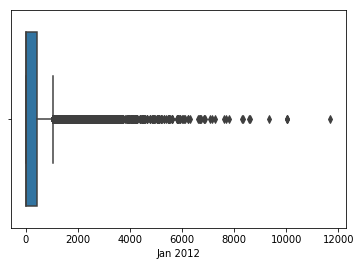

In [806]:
sns.boxplot(chicago_df['Jan 2012'])

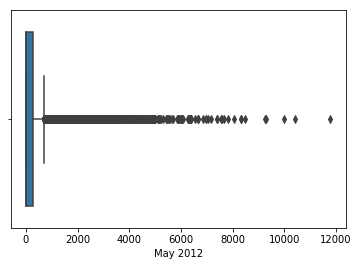

In [807]:
sns.boxplot(chicago_df['May 2012'])

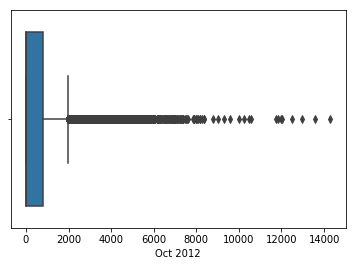

In [810]:
sns.boxplot(chicago_df['Oct 2012'])

As evident in the above and below graphs, there are a massive amount of outliers in the data. However the scale of the graph below is slightly different as it totals the yearly supplemental income for individuals, however the theme of some individuals make large amounts in overtime or supplemental income is very clear. In relation to the earlier idea of comparing which percentage of income is related to wage and which is realted to supplemental income, it could be said that some Chicago employees have low wages and are working very hard via overtime and other means to supplement their income, as evidenced by the reported high levels of overtime/supplemental income.

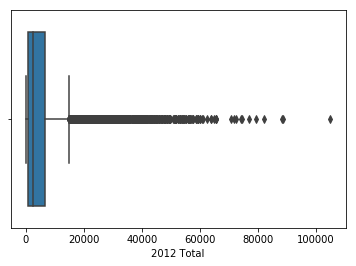

In [814]:
sns.boxplot(chicago_df['2012 Total'])

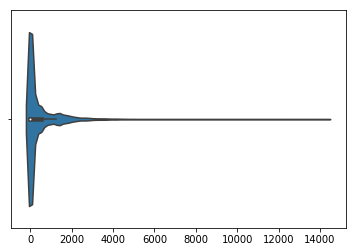

In [813]:
sns.violinplot(chicago_df[['May 2012', 'Oct 2012']])